In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
import sklearn
from sklearn.preprocessing import LabelEncoder


%matplotlib inline
%config InlineBackend.figure_format = 'png'

In [3]:
%%time
train_data = pd.read_csv("../input/train_ver2.csv")

<string>:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 1min 43s


# 데이터 탐색 ( EDA )

- 데이터의 타입이 무엇인가?
- 각 변수들이 의미하는 것이 무엇인가?
- 중복된 변수가 있는가?
- 결측치는 존재하는가? => 존재한다면 결측치를 그냥 제거할 것인가 0으로 처리할 것인가?
- 숫자처럼 보이지만 문자인 것들이 존재하는가?
- 데이터의 분포는 어떻게 되는가?
- 갑자기 데이터의 비율이 변하는 시기가 있는가?

- 다변량 변수가 있는가? => Feature 엔지니어링
- histogram, boxplot, violinplot

이 모든 것은 끊임없이 가지고 놀아야 한다..!!! 이 과정을 소홀히하지 말자

In [7]:
%%time
print(train_data.columns)
print(len(train_data.columns))
# 총 48개의 Columns이 존재

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')
48
Wall time: 1 ms


In [8]:
%%time
print(train_data.head(10))

   fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-01-28   1375586            N              ES    H   35  2015-01-12   
1  2015-01-28   1050611            N              ES    V   23  2012-08-10   
2  2015-01-28   1050612            N              ES    V   23  2012-08-10   
3  2015-01-28   1050613            N              ES    H   22  2012-08-10   
4  2015-01-28   1050614            N              ES    V   23  2012-08-10   
5  2015-01-28   1050615            N              ES    H   23  2012-08-10   
6  2015-01-28   1050616            N              ES    H   23  2012-08-10   
7  2015-01-28   1050617            N              ES    H   23  2012-08-10   
8  2015-01-28   1050619            N              ES    H   24  2012-08-10   
9  2015-01-28   1050620            N              ES    H   23  2012-08-10   

   ind_nuevo antiguedad  indrel       ...        ind_hip_fin_ult1  \
0        0.0          6     1.0       ...                       0   
1  

In [9]:
%%time
print(train_data.info())
# object / int64 : 정수 / float64 : 부동소수점

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

In [24]:
%%time
# check numerical data
num_cols = ['ncodpers','ind_nuevo','indrel','tipodom', \
            'cod_prov','ind_actividad_cliente','renta', \
            'age','antiguedad']
print(train_data[num_cols].describe())

           ncodpers     ind_nuevo        indrel     tipodom      cod_prov  \
count  1.364731e+07  1.361958e+07  1.361958e+07  13619574.0  1.355372e+07   
mean   8.349042e+05  5.956184e-02  1.178399e+00         1.0  2.657147e+01   
std    4.315650e+05  2.366733e-01  4.177469e+00         0.0  1.278402e+01   
min    1.588900e+04  0.000000e+00  1.000000e+00         1.0  1.000000e+00   
25%    4.528130e+05  0.000000e+00  1.000000e+00         1.0  1.500000e+01   
50%    9.318930e+05  0.000000e+00  1.000000e+00         1.0  2.800000e+01   
75%    1.199286e+06  0.000000e+00  1.000000e+00         1.0  3.500000e+01   
max    1.553689e+06  1.000000e+00  9.900000e+01         1.0  5.200000e+01   

       ind_actividad_cliente         renta  
count           1.361958e+07  1.085293e+07  
mean            4.578105e-01  1.342543e+05  
std             4.982169e-01  2.306202e+05  
min             0.000000e+00  1.202730e+03  
25%             0.000000e+00  6.871098e+04  
50%             0.000000e+00  1.0185

In [27]:
%%time
# check categorical columns
cat_cols = ['fecha_dato','ind_empleado','pais_residencia', \
            'sexo','fecha_alta','ult_fec_cli_1t','indrel_1mes', \
            'tiprel_1mes','indresi','indext','conyuemp', \
            'canal_entrada','indfall','nomprov','segmento']

# num_unique, unique set
for col in cat_cols:
    uniq =np.unique(train_data[col].astype(str)) 
    print ('-'*50)
    print ('# col {}\t n_uniq {}\t unique {}'.format(col, len(uniq), uniq))

# 4min 17s

--------------------------------------------------
# col fecha_dato	 n_uniq 17	 unique ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado	 n_uniq 6	 unique ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia	 n_uniq 119	 unique ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY' 'BZ'
 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ' 'DE' 'DJ'
 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB' 'GE' 'GH' 'GI'
 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE' 'IL' 'IN' 'IS' 'IT'
 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU' 'LV' 'LY' 'MA' 'MD' 'MK'
 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL' 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH'
 'PK' 'PL' 'PR' 'PT' '

In [6]:
#  indrel_1mes	 n_uniq 10	 unique ['1' '1.0' '2' '2.0' '3' '3.0' '4' '4.0' 'P' 'nan'] - 이거 문제네 1 / 1.0 다름
#   tiprel_1mes	 n_uniq 6	 unique ['A' 'I' 'N' 'P' 'R' 'nan'] - n 은 정의가 없음 nan인건가

col :  fecha_dato


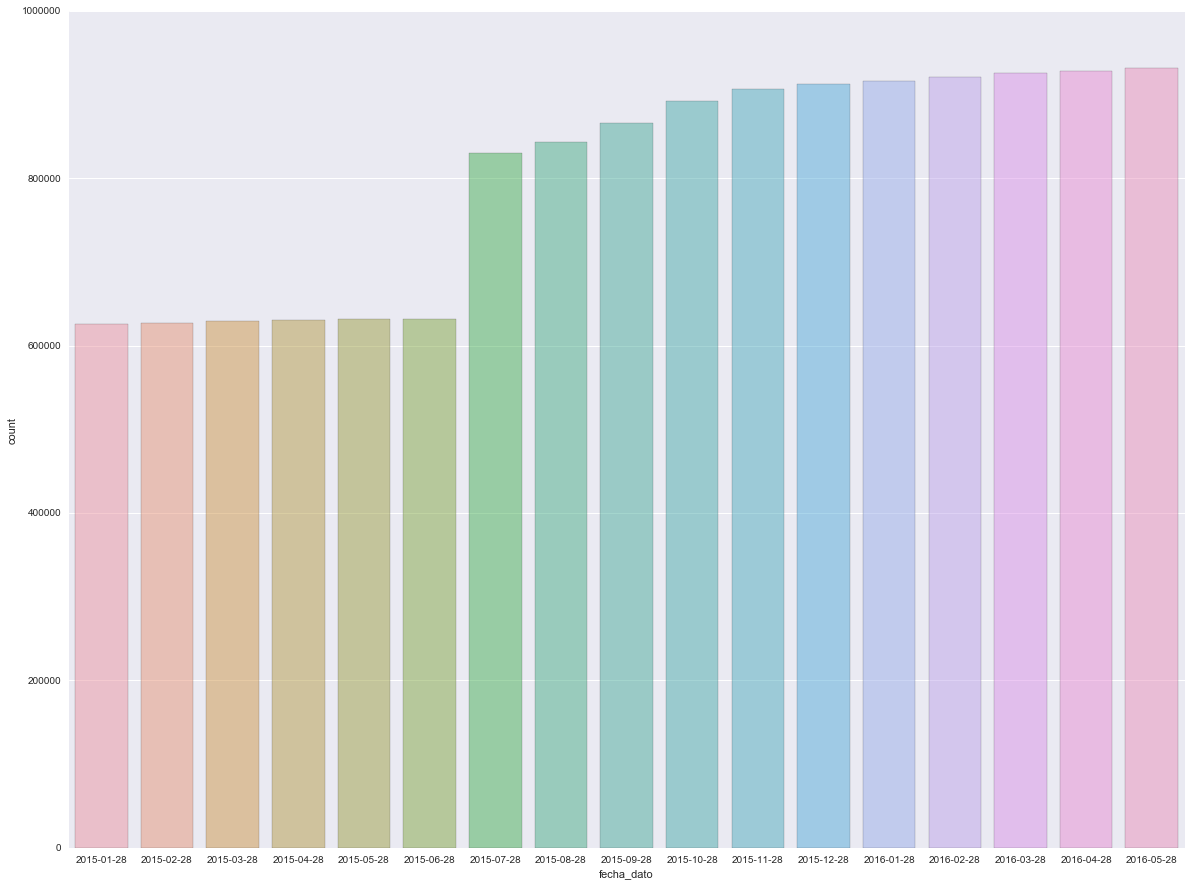

col :  ind_empleado


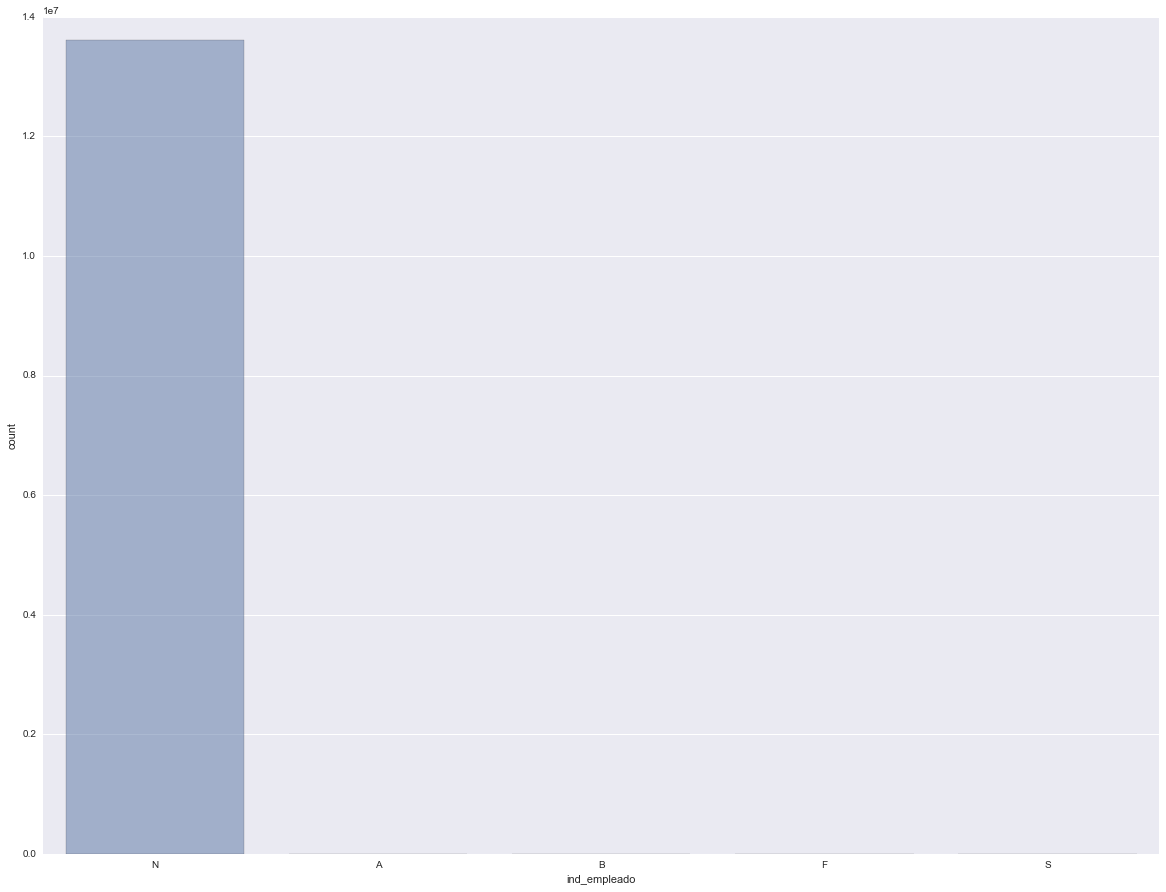

col :  pais_residencia


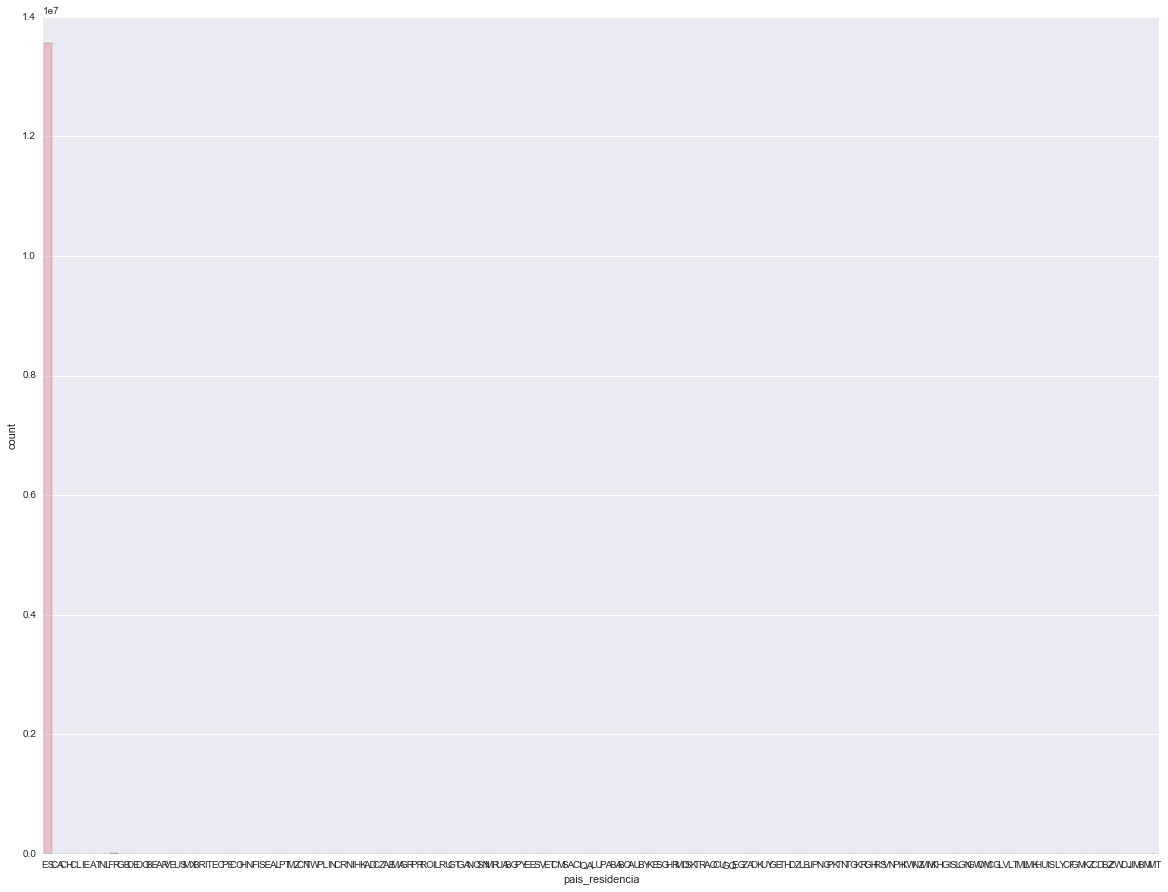

col :  sexo


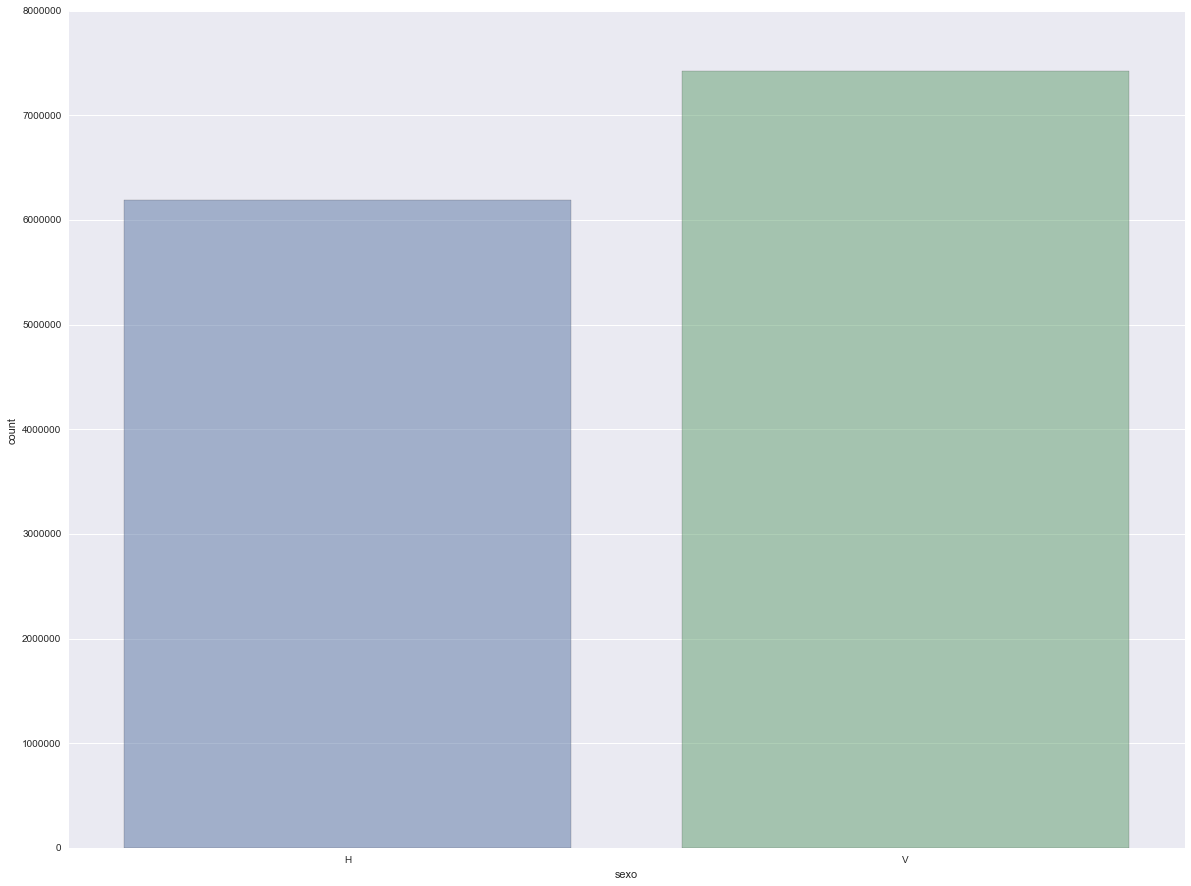

col :  age


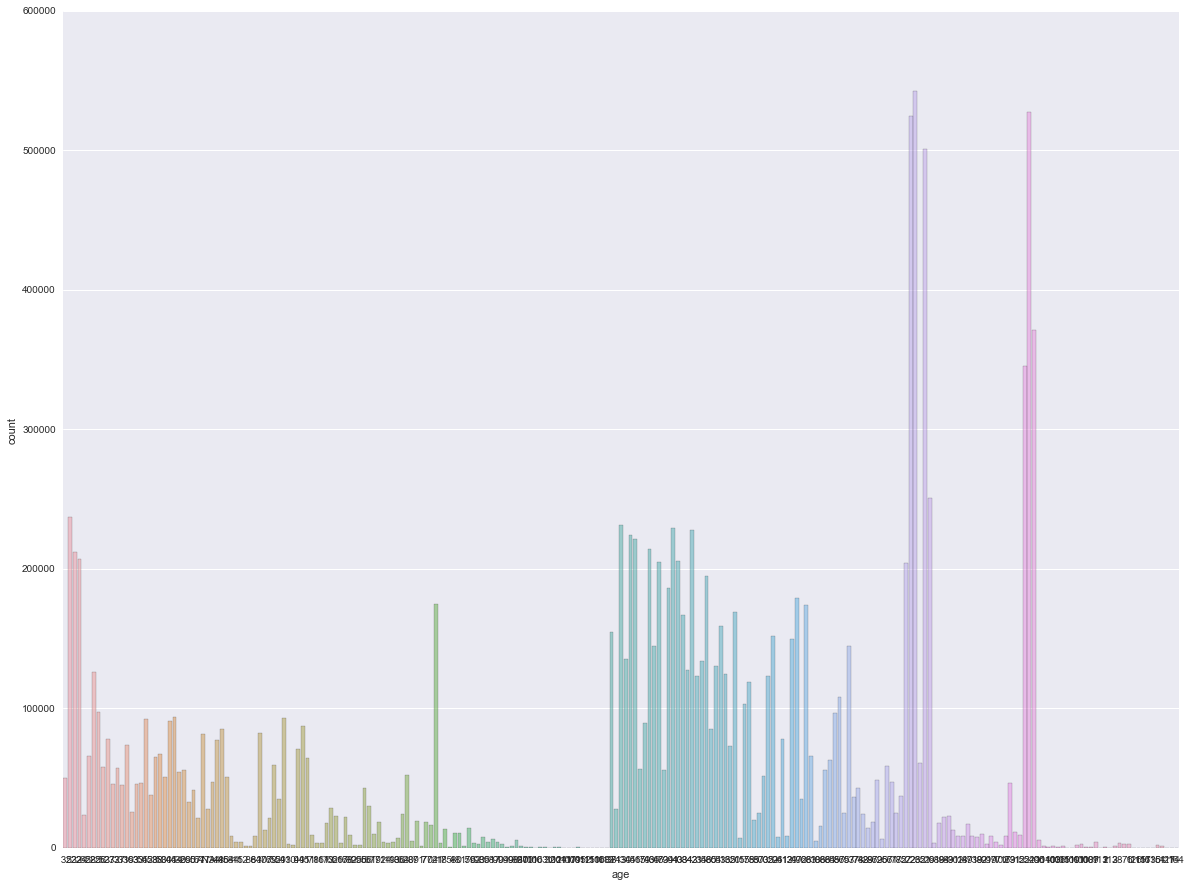

col :  fecha_alta


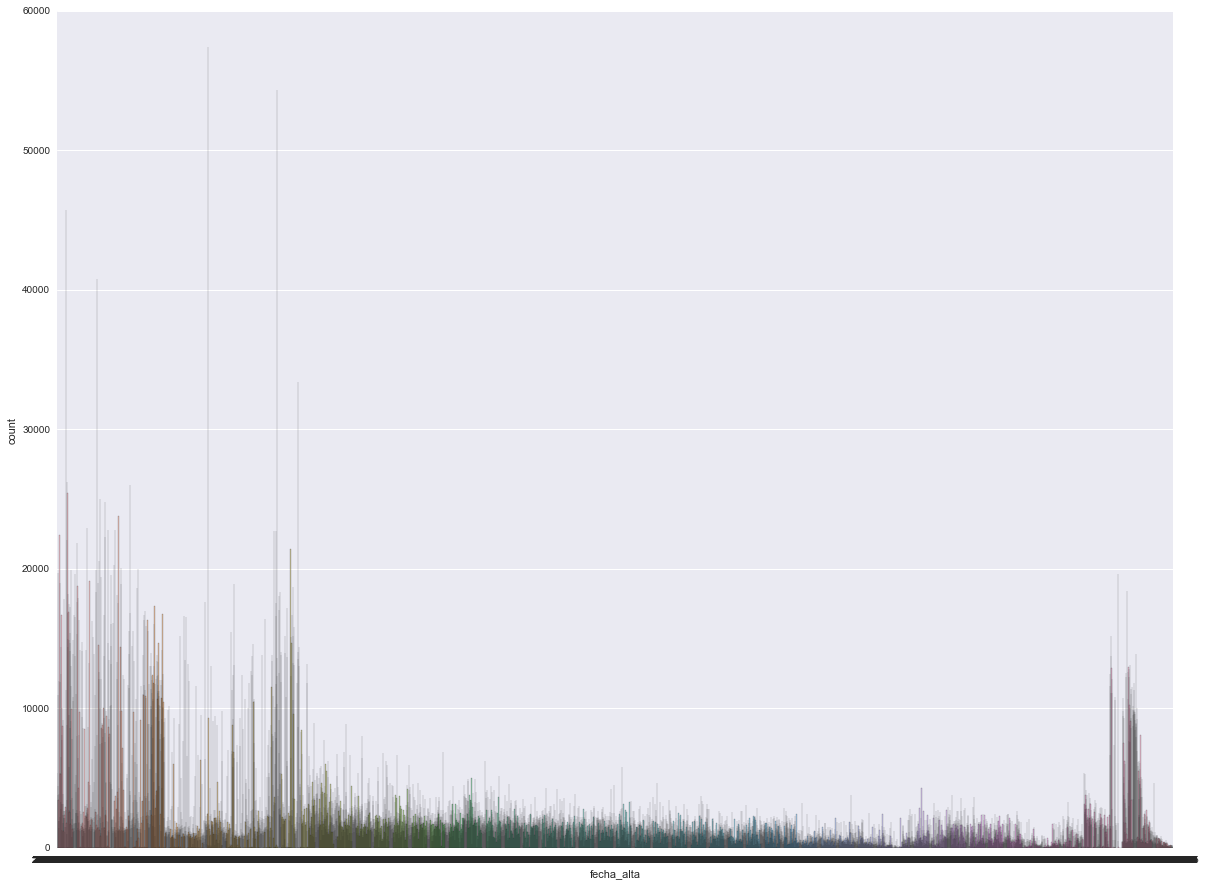

col :  ind_nuevo


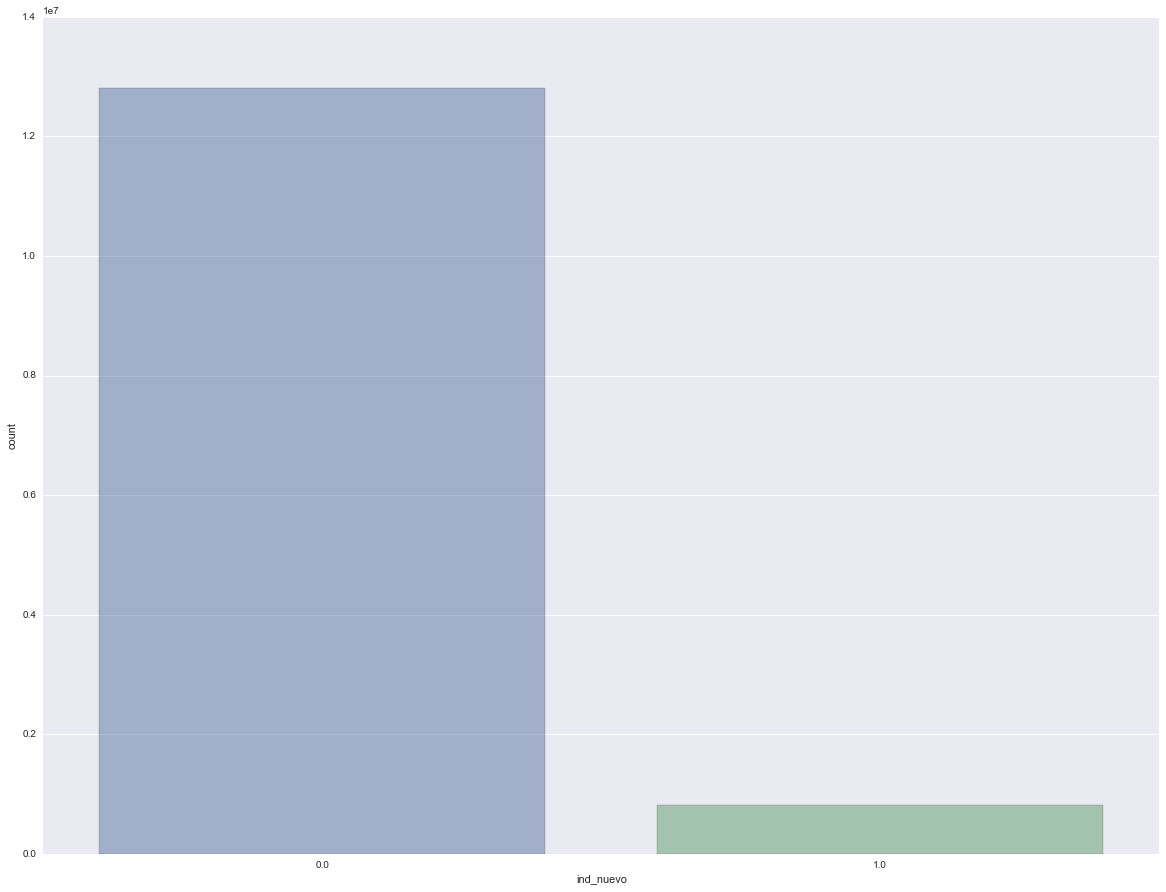

col :  antiguedad


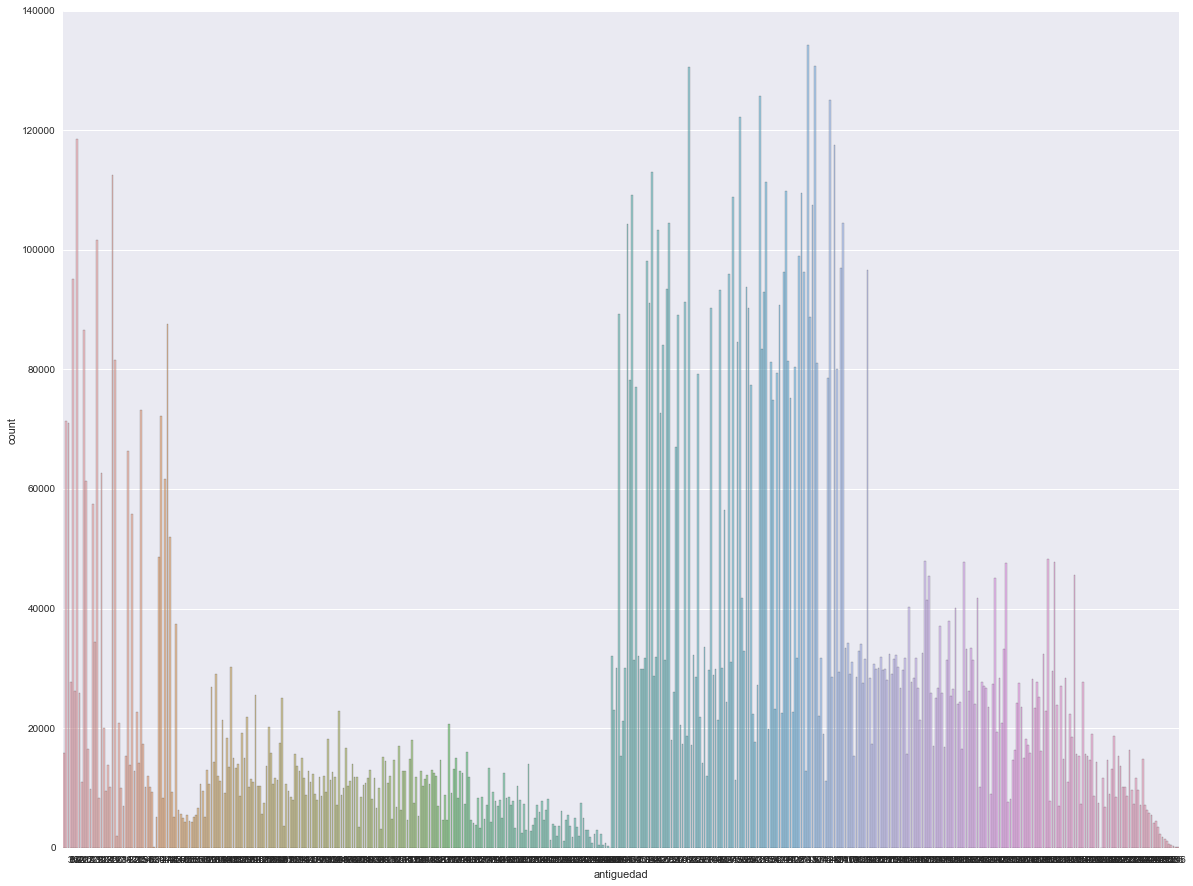

col :  indrel


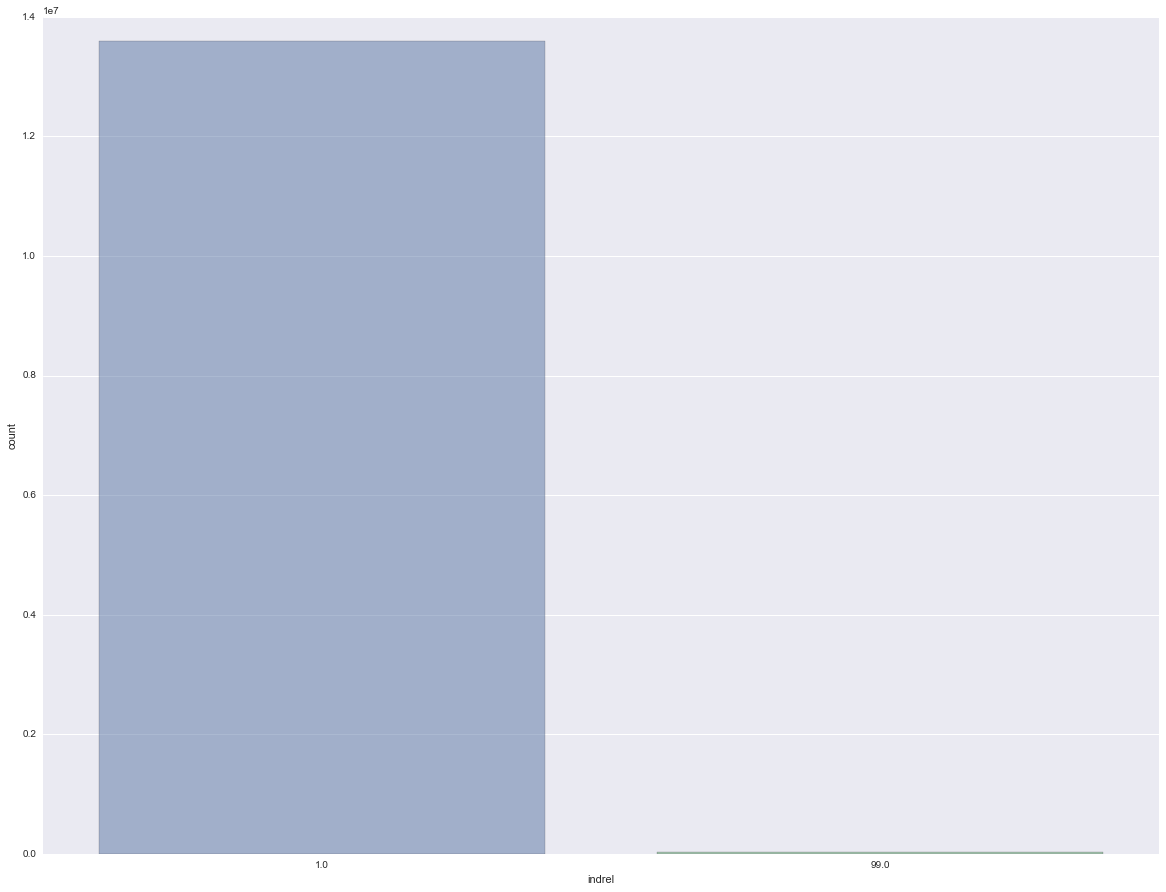

col :  ult_fec_cli_1t


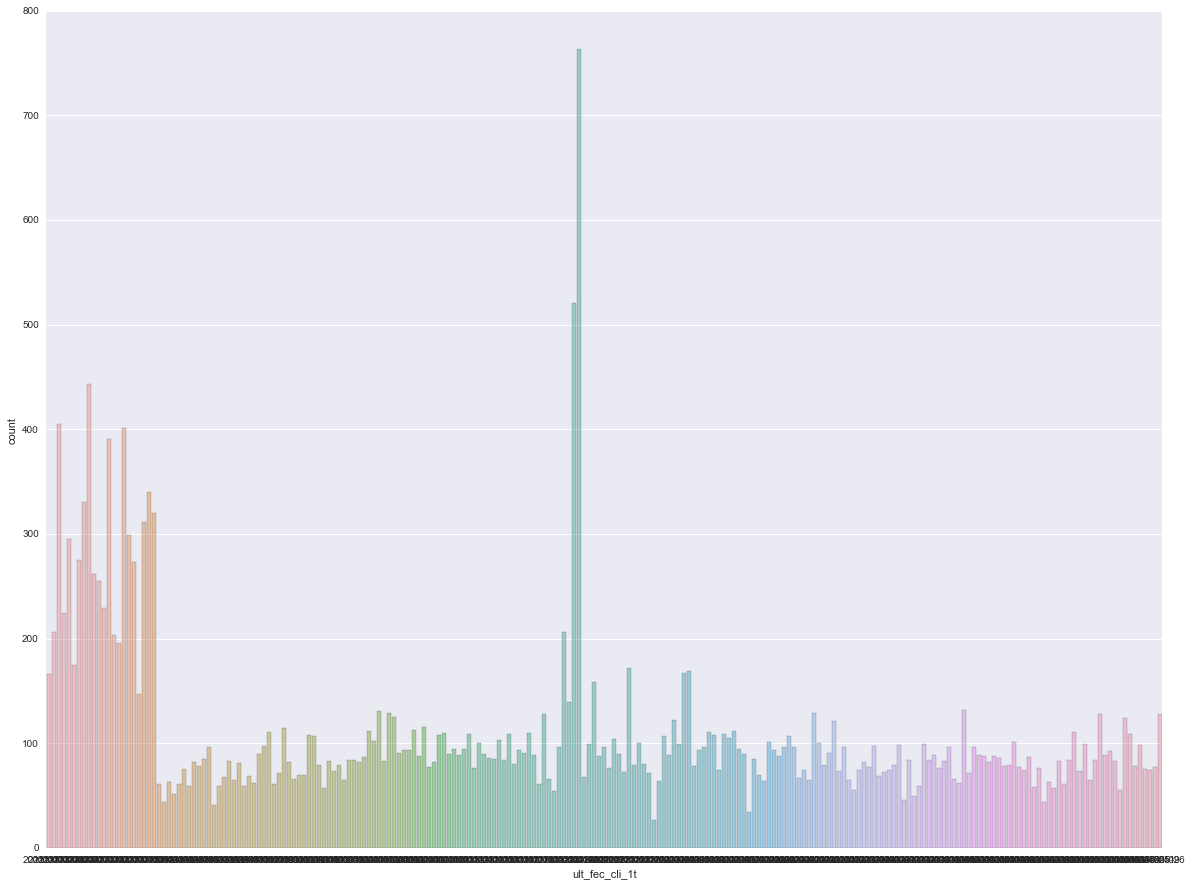

col :  indrel_1mes


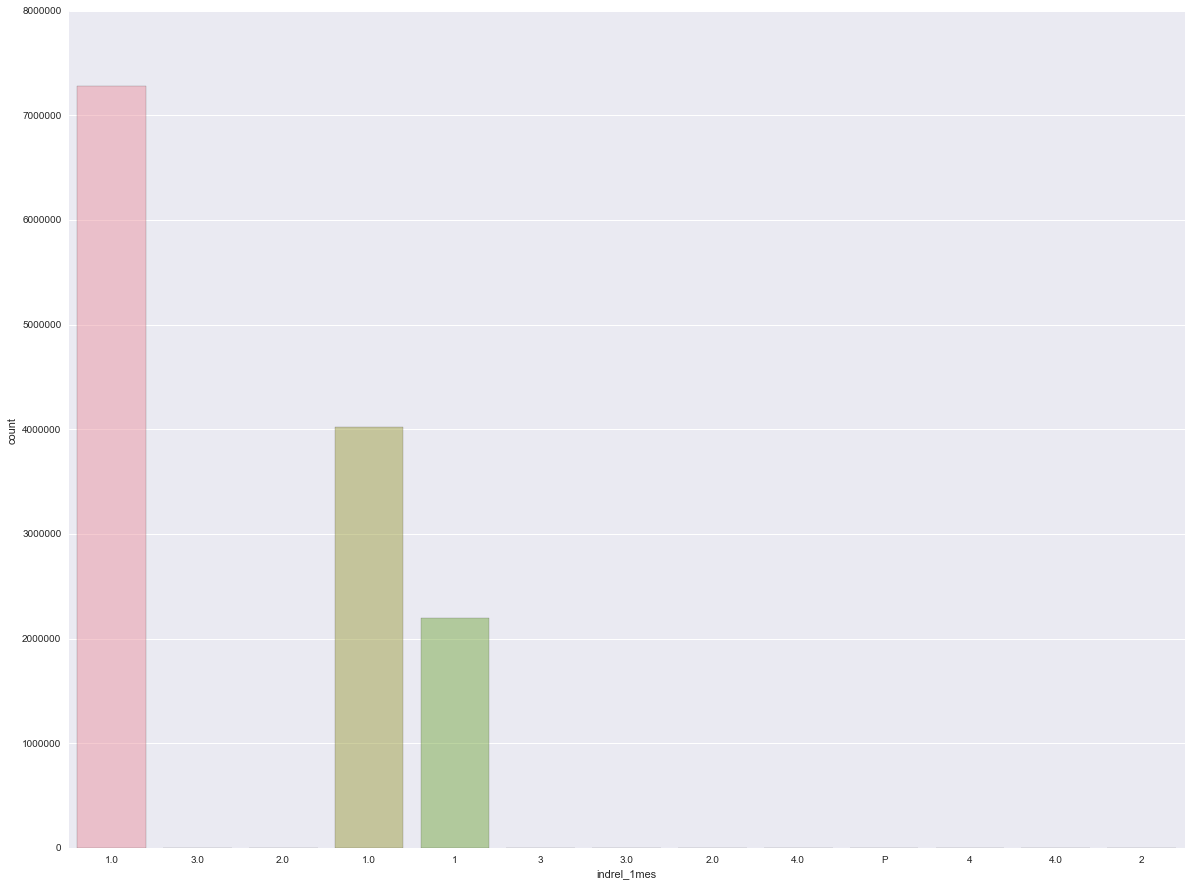

col :  tiprel_1mes


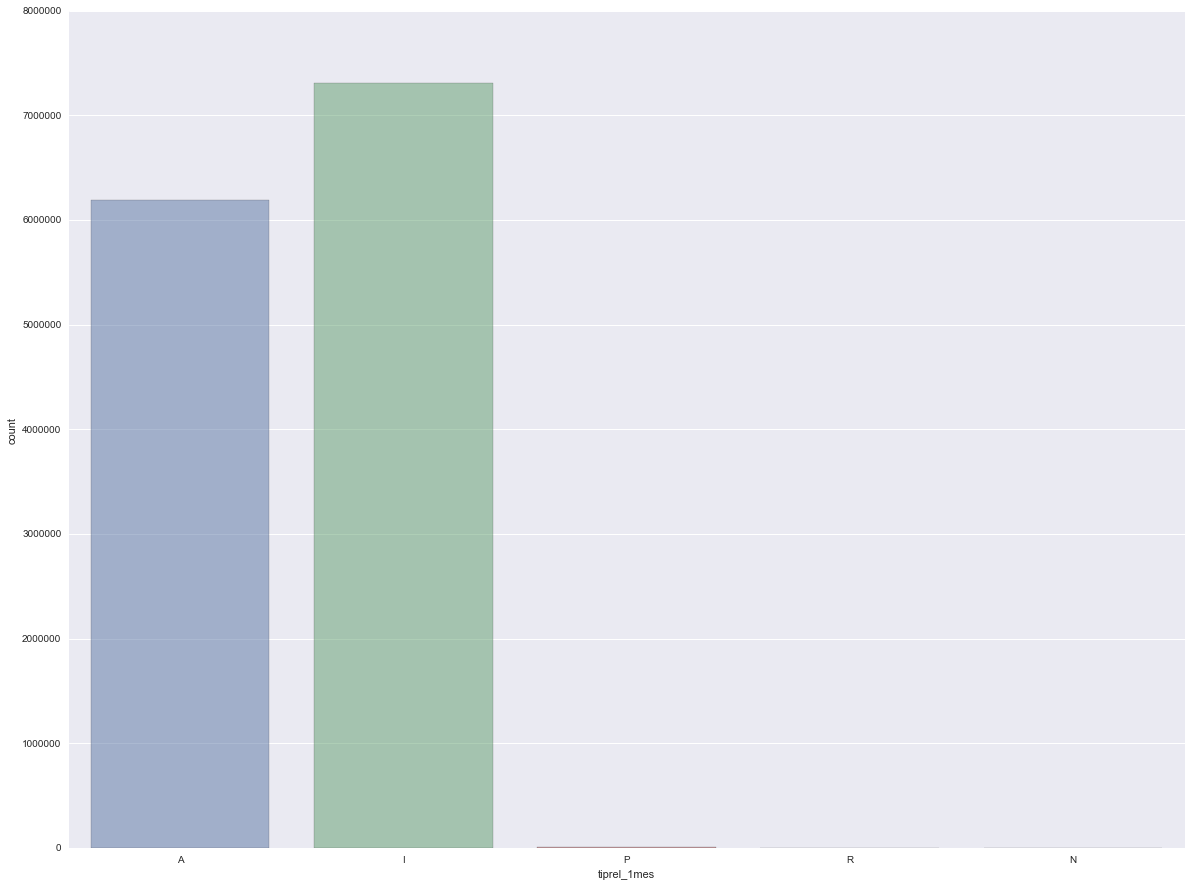

col :  indresi


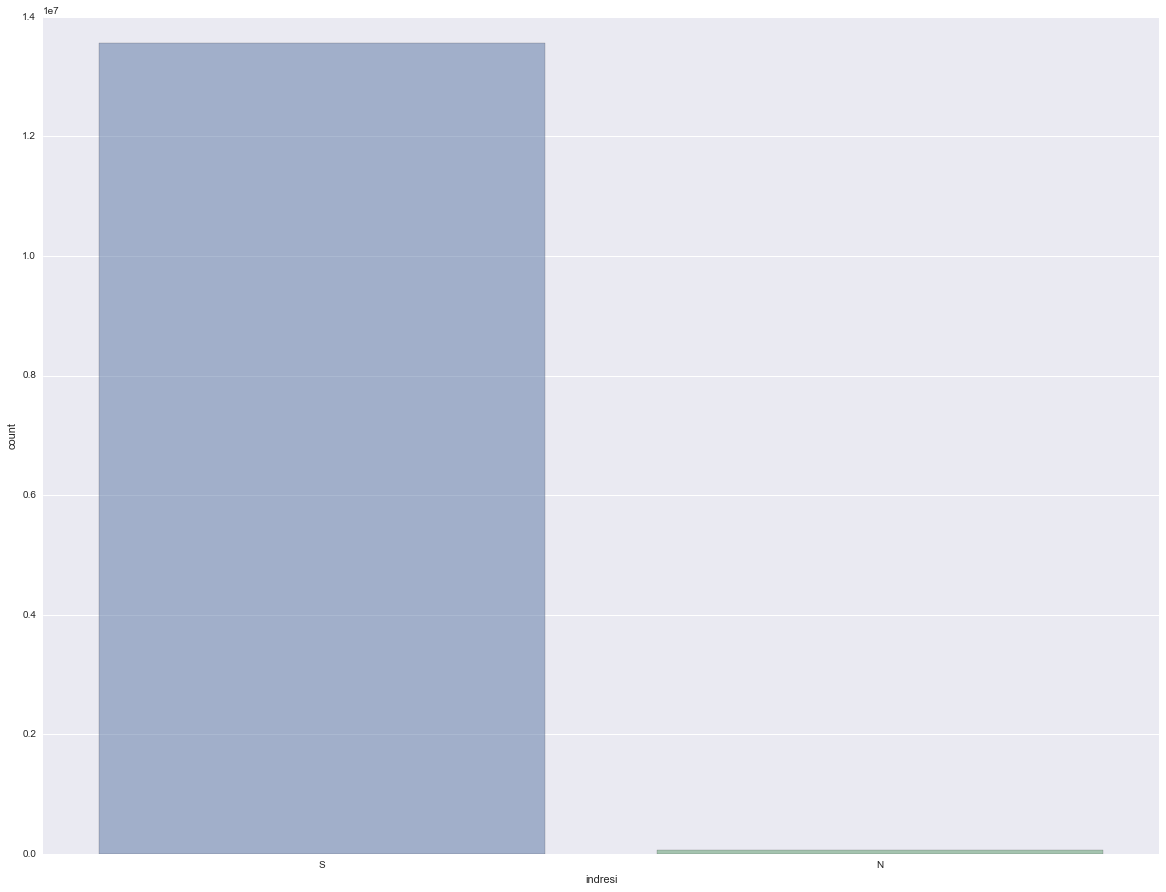

col :  indext


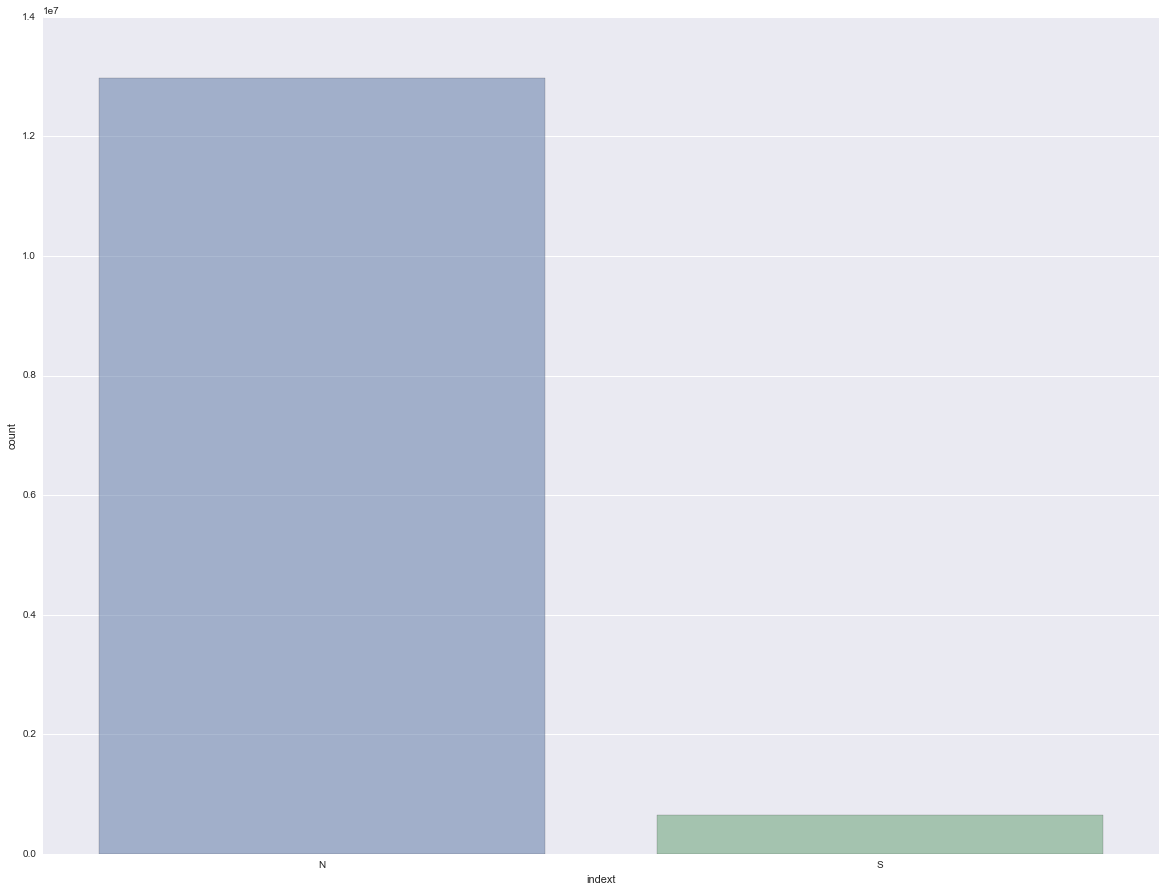

col :  conyuemp


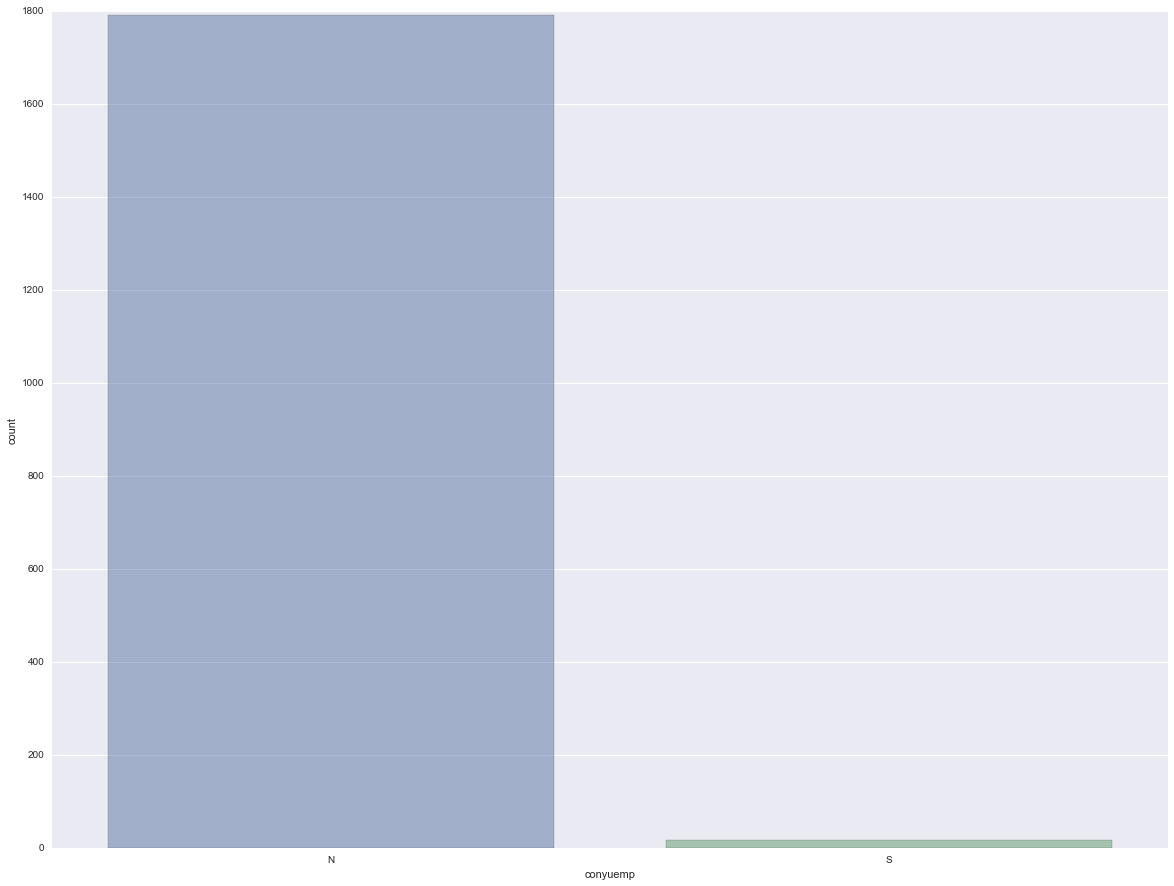

col :  canal_entrada


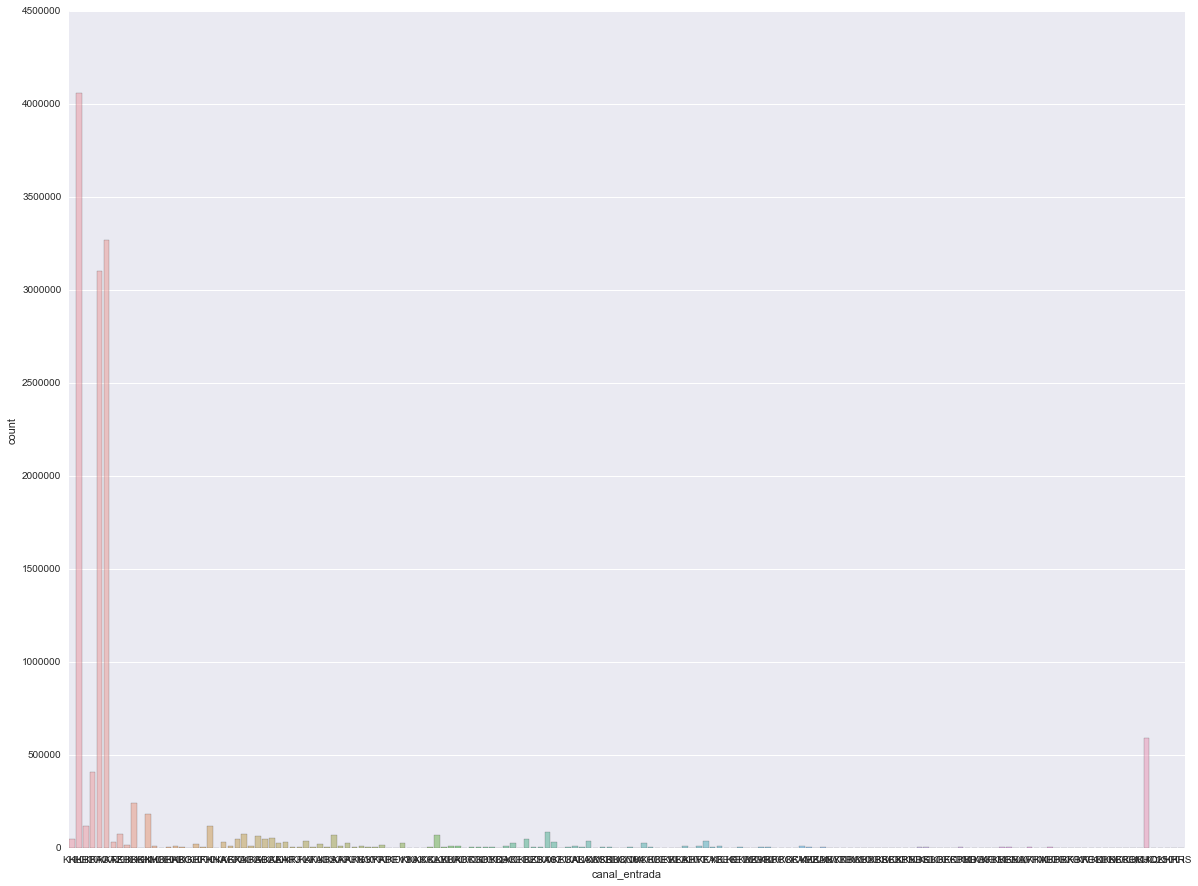

col :  indfall


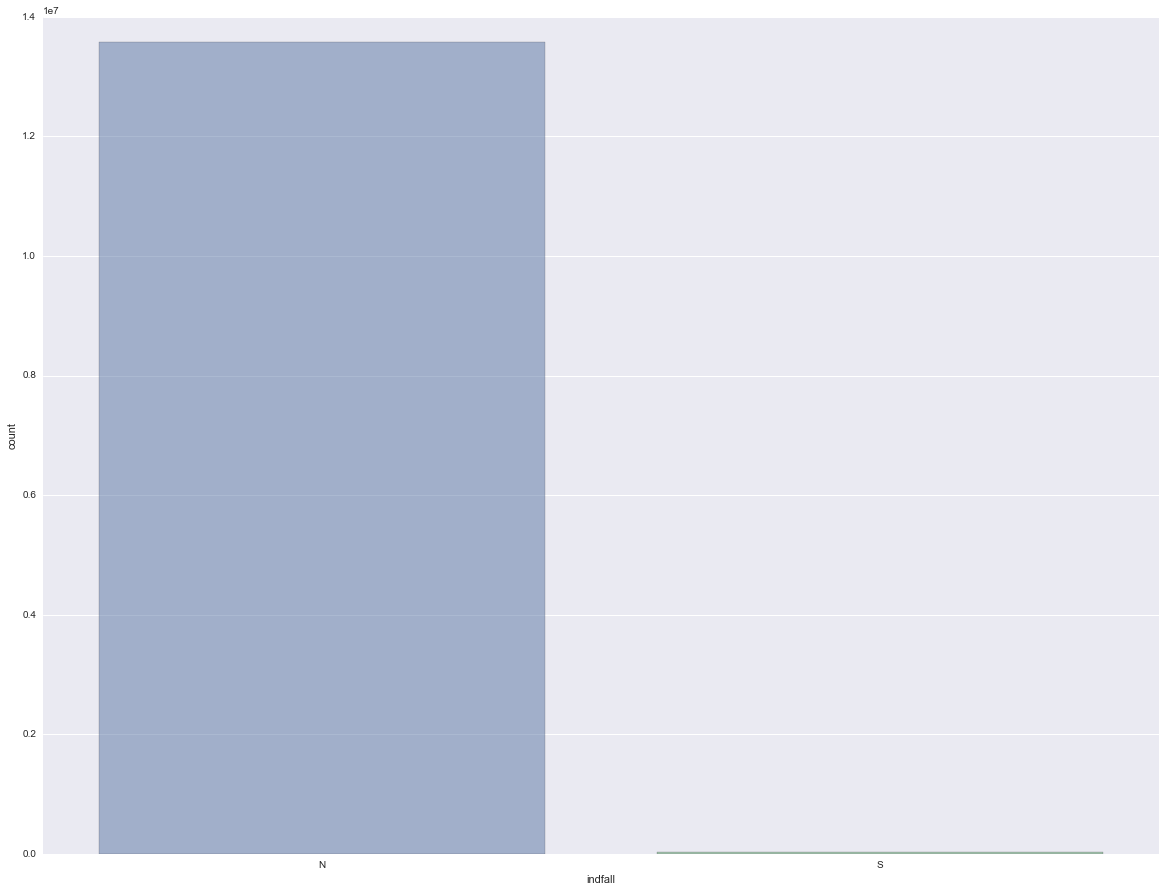

col :  tipodom


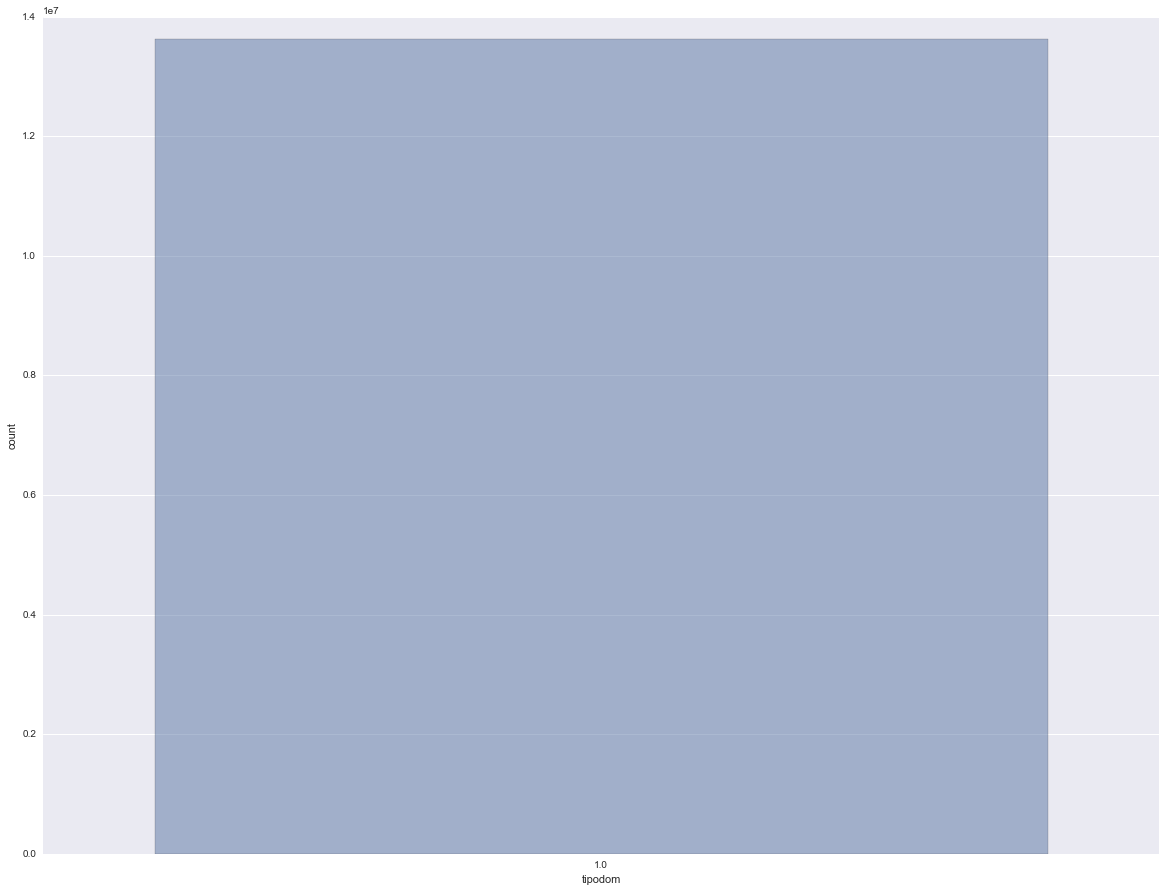

col :  cod_prov


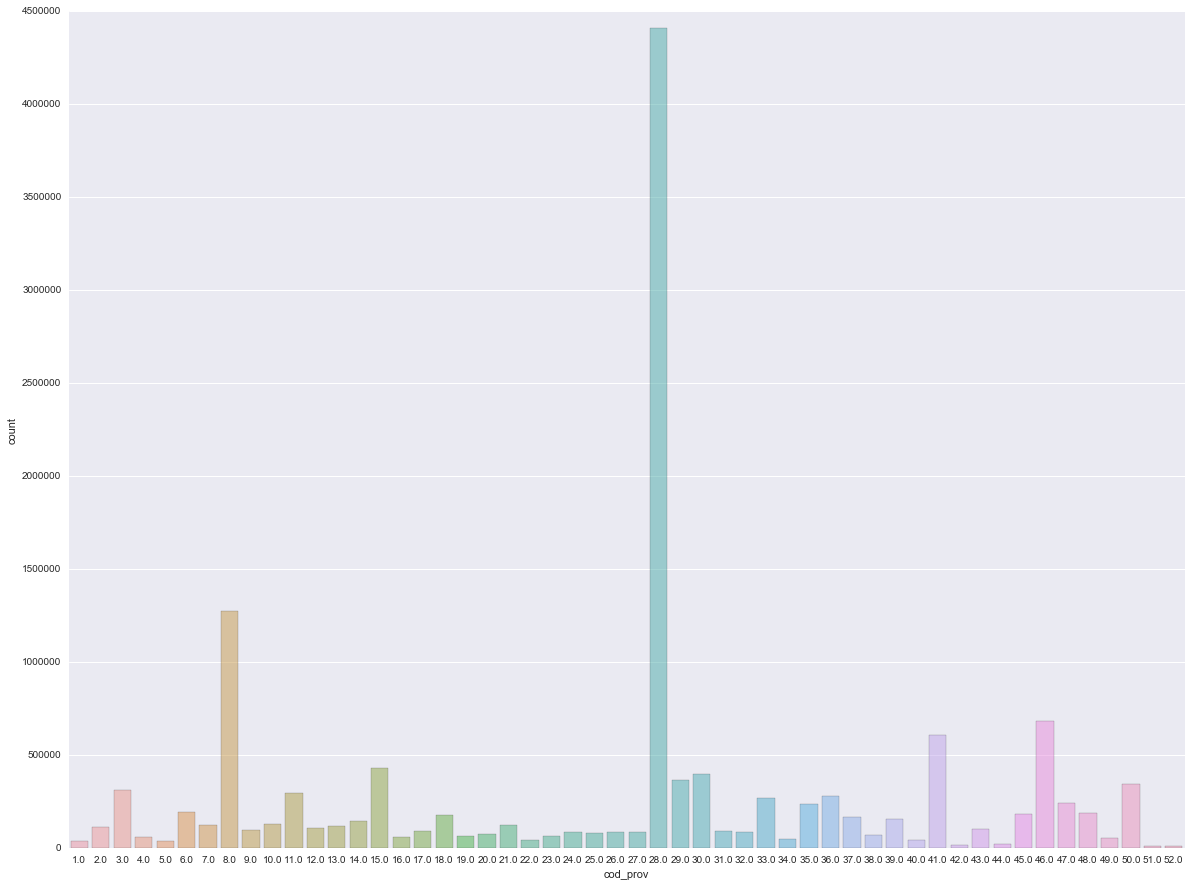

col :  nomprov


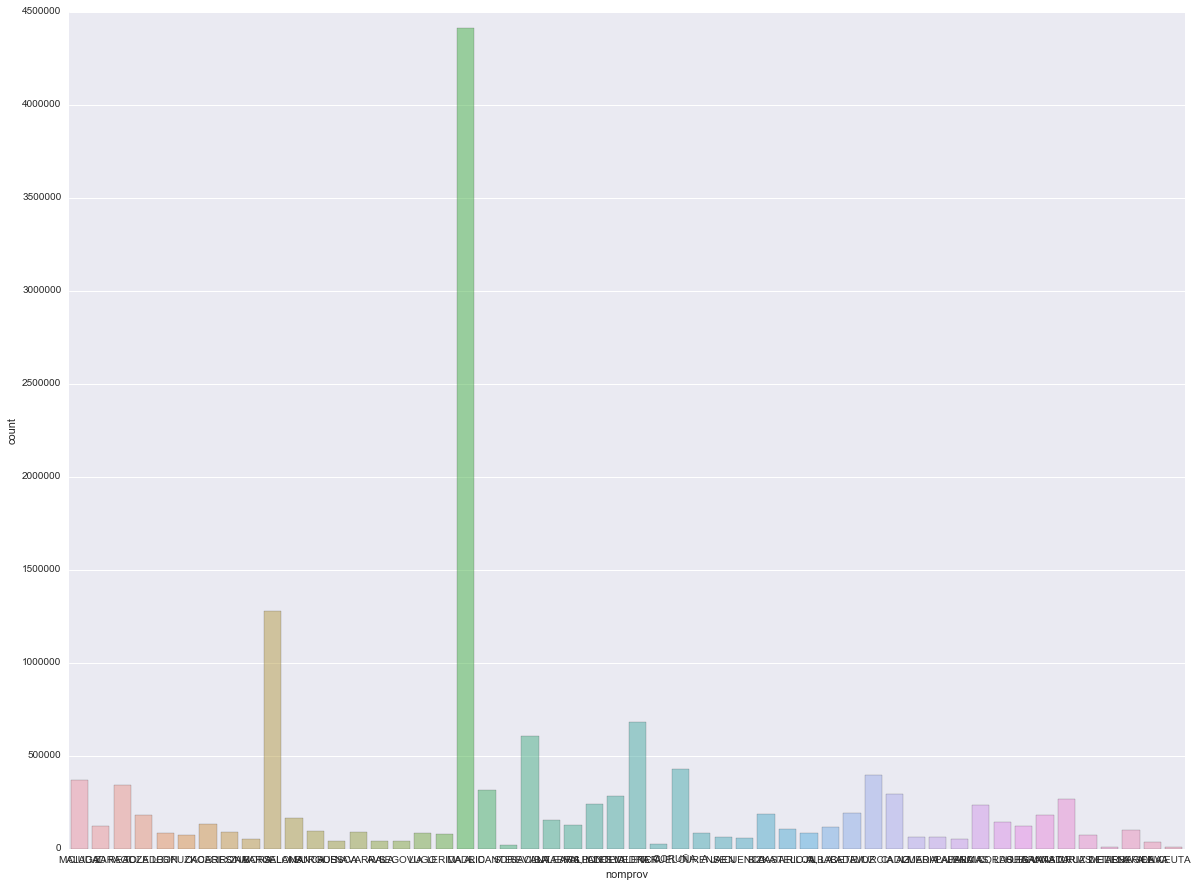

col :  ind_actividad_cliente


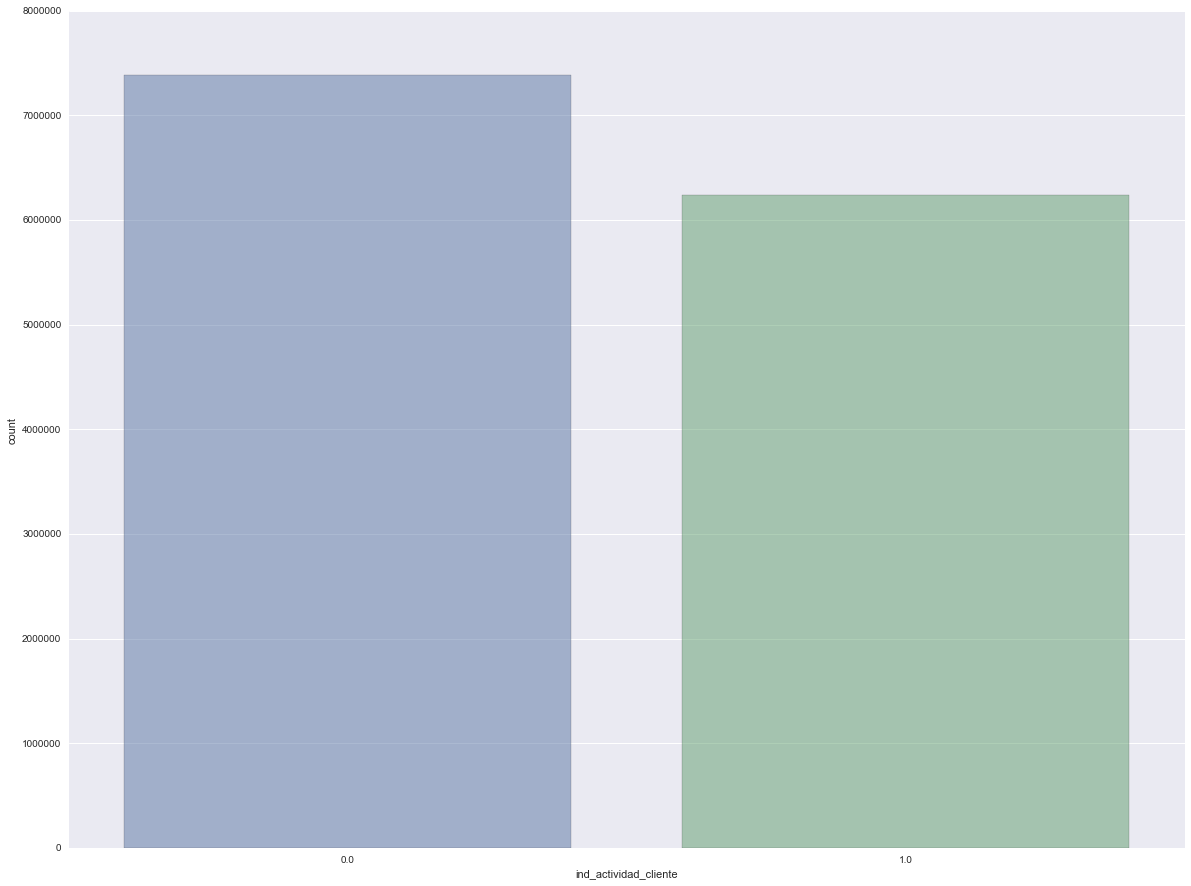

Wall time: 4min 33s


In [28]:
%%time
# histogram of features
skip_cols = ['ncodpers']
for col in train_data.columns:
    if col == 'renta':
        break
    if col in skip_cols:
        continue
    print('='*50)
    print('col : ', col)
    f, ax = plt.subplots(figsize=(20, 15))
    sns.countplot(x=col, data=train_data, alpha=0.5)
    plt.show()


In [31]:
%%time
# check column : age, antiguedad, renta
col = 'age'
print(np.unique(train_data[col].astype(str)))
print(train_data[col].value_counts())

# 앞에 공백이 있는 친구도 있고.... 126세도 계시네..? 흐음

['  2' '  3' '  4' '  5' '  6' '  7' '  8' '  9' ' 10' ' 11' ' 12' ' 13'
 ' 14' ' 15' ' 16' ' 17' ' 18' ' 19' ' 20' ' 21' ' 22' ' 23' ' 24' ' 25'
 ' 26' ' 27' ' 28' ' 29' ' 30' ' 31' ' 32' ' 33' ' 34' ' 35' ' 36' ' 37'
 ' 38' ' 39' ' 40' ' 41' ' 42' ' 43' ' 44' ' 45' ' 46' ' 47' ' 48' ' 49'
 ' 50' ' 51' ' 52' ' 53' ' 54' ' 55' ' 56' ' 57' ' 58' ' 59' ' 60' ' 61'
 ' 62' ' 63' ' 64' ' 65' ' 66' ' 67' ' 68' ' 69' ' 70' ' 71' ' 72' ' 73'
 ' 74' ' 75' ' 76' ' 77' ' 78' ' 79' ' 80' ' 81' ' 82' ' 83' ' 84' ' 85'
 ' 86' ' 87' ' 88' ' 89' ' 90' ' 91' ' 92' ' 93' ' 94' ' 95' ' 96' ' 97'
 ' 98' ' 99' ' NA' '10' '100' '101' '102' '103' '104' '105' '106' '107'
 '108' '109' '11' '110' '111' '112' '113' '114' '115' '116' '117' '12'
 '126' '127' '13' '14' '15' '16' '163' '164' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '27' '28' '29' '3' '30' '31' '32' '33' '34' '35'
 '36' '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49'
 '5' '50' '51' '52' '53' '54' '55' '56' '57' '58'

In [33]:
%%time
col = 'antiguedad'
print(np.unique(train_data[col].astype(str)))
print(train_data[col].value_counts())

# 마찬가지로 공백과 NA 문제가 있음

['      0' '      1' '      2' '      3' '      4' '      5' '      6'
 '      7' '      8' '      9' '     10' '     11' '     12' '     13'
 '     14' '     15' '     16' '     17' '     18' '     19' '     20'
 '     21' '     22' '     23' '     24' '     25' '     26' '     27'
 '     28' '     29' '     30' '     31' '     32' '     33' '     34'
 '     35' '     36' '     37' '     38' '     39' '     40' '     41'
 '     42' '     43' '     44' '     45' '     46' '     47' '     48'
 '     49' '     50' '     51' '     52' '     53' '     54' '     55'
 '     56' '     57' '     58' '     59' '     60' '     61' '     62'
 '     63' '     64' '     65' '     66' '     67' '     68' '     69'
 '     70' '     71' '     72' '     73' '     74' '     75' '     76'
 '     77' '     78' '     79' '     80' '     81' '     82' '     83'
 '     84' '     85' '     86' '     87' '     88' '     89' '     90'
 '     91' '     92' '     93' '     94' '     95' '     96' '     97'
 '    

In [35]:
col = 'renta'
print(np.unique(train_data[col].astype(str)))
print(train_data[col].value_counts())

# nan 값!

['100000.02' '100000.35' '100000.41' ..., '99999.21' '99999.78' 'nan']
451931.22    5582
463625.16    1743
181042.20    1493
128318.52    1404
105260.88    1354
488798.49    1332
127141.50    1183
283325.67    1148
132335.73    1047
236690.34    1009
104563.80     954
227267.49     896
273387.54     886
111933.69     844
174407.10     823
227397.72     813
155930.43     804
218030.01     794
163432.47     712
208961.79     680
555605.55     677
168733.62     669
135522.15     657
148736.19     653
152601.99     649
248233.11     627
288997.44     625
326853.09     624
47550.39      607
91673.25      586
             ... 
192297.42       1
79782.66        1
46808.19        1
50323.47        1
82349.55        1
210493.68       1
179561.43       1
73367.82        1
35238.12        1
162628.14       1
51838.86        1
45038.73        1
106957.32       1
50939.22        1
153535.08       1
133142.67       1
108875.73       1
30711.21        1
195859.59       1
31253.64        1
150955.83  

In [40]:
aaaaa = "   2   "

In [41]:
int(aaaaa) 
# 공백의 경우  int로 처리하면 사라짐

2

In [42]:
# age 부분 전처리
col = 'age'
train_data[col].replace(' NA',0,inplace=True)
train_data[col] = train_data[col].astype(int)

In [43]:
# 연차 전처리
col = 'antiguedad'
train_data[col].replace('     NA',-2,inplace=True)
train_data[col] = train_data[col].astype(int)
train_data[col].replace(-999999,-1,inplace=True)

# 총수입 전처리
col = 'renta'
train_data[col].fillna(0, inplace=True)
train_data[col] = (train_data[col]/1000).astype(np.int64)


col :  age


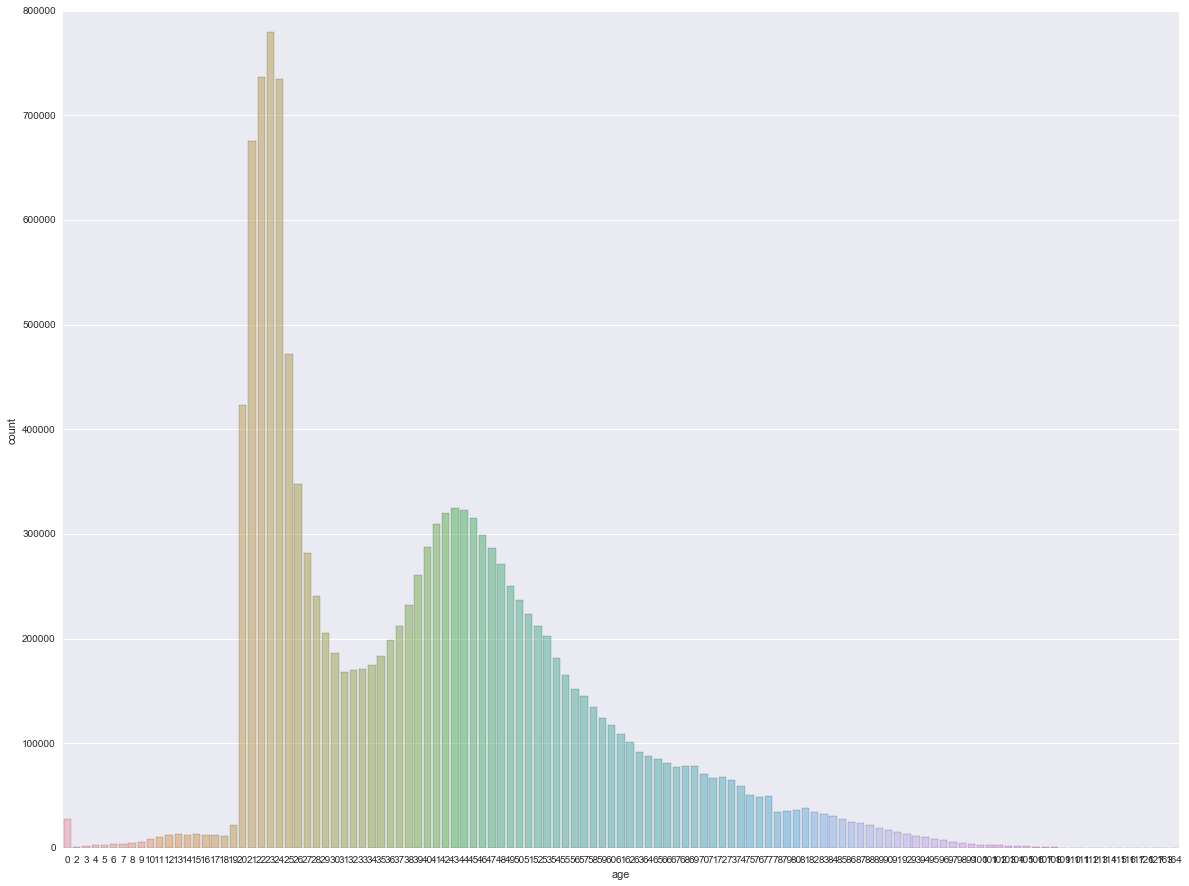

col :  antiguedad


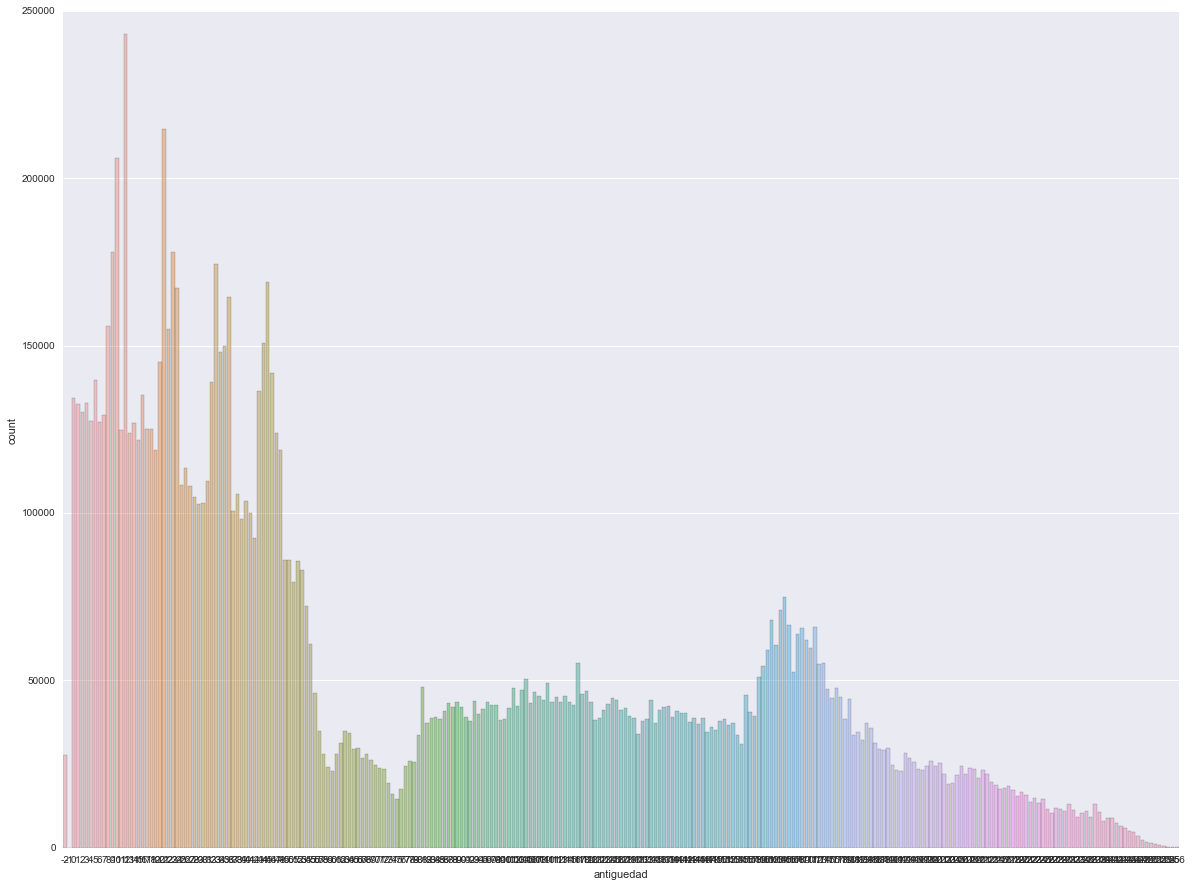

col :  renta


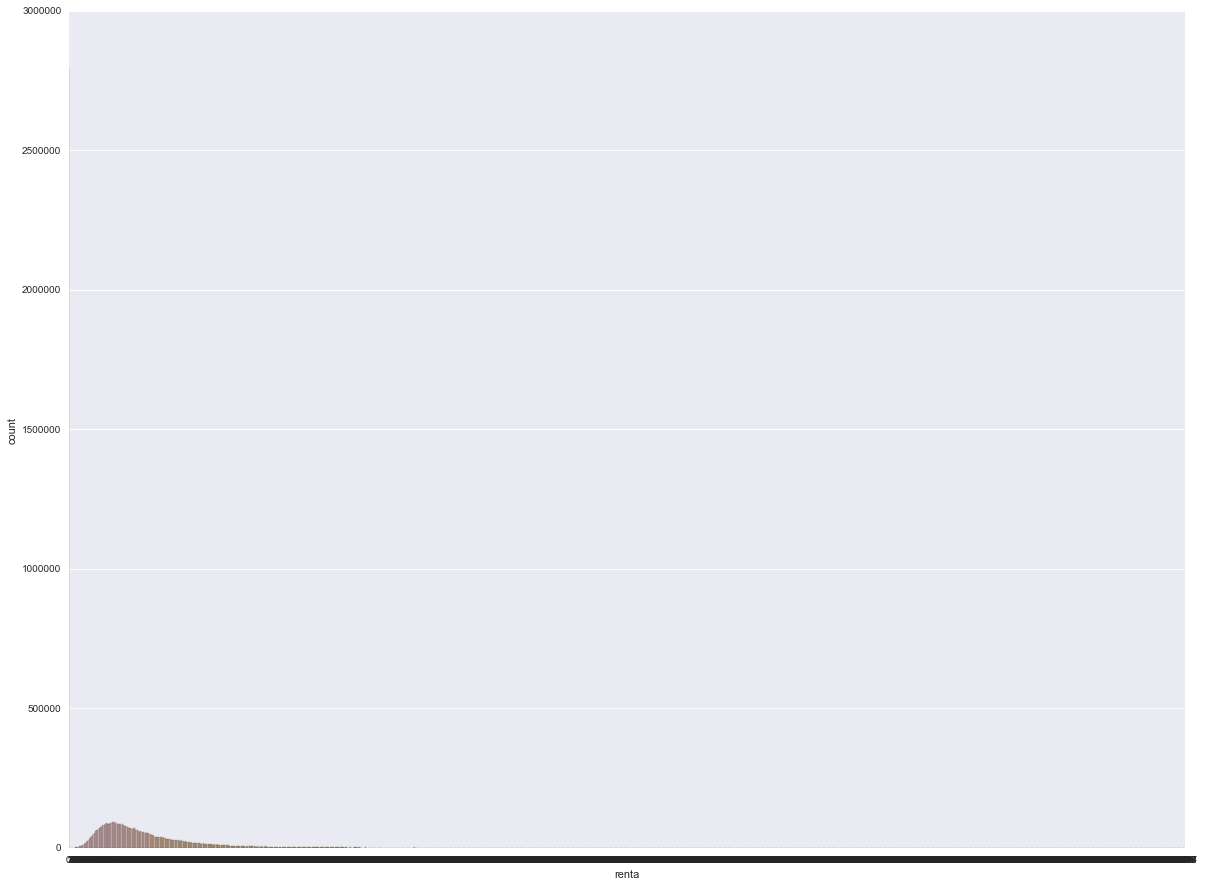

Wall time: 23.2 s


In [44]:
%%time
cols = ['age','antiguedad','renta']
for col in cols:
    print('='*50)
    print('col : ', col)
    f, ax = plt.subplots(figsize=(20, 15))
    sns.countplot(x=col, data=train_data, alpha=0.5)
    plt.show()

col :  segmento


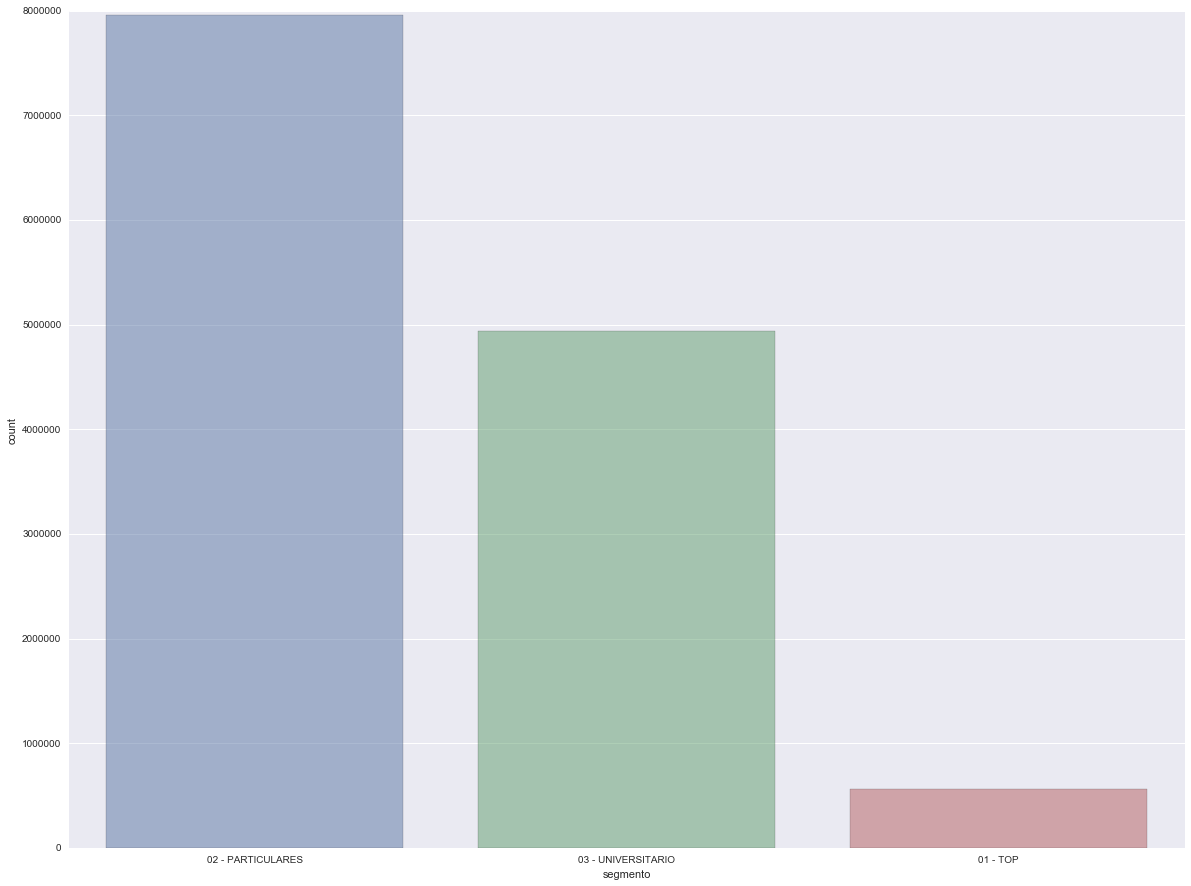

col :  ind_ahor_fin_ult1


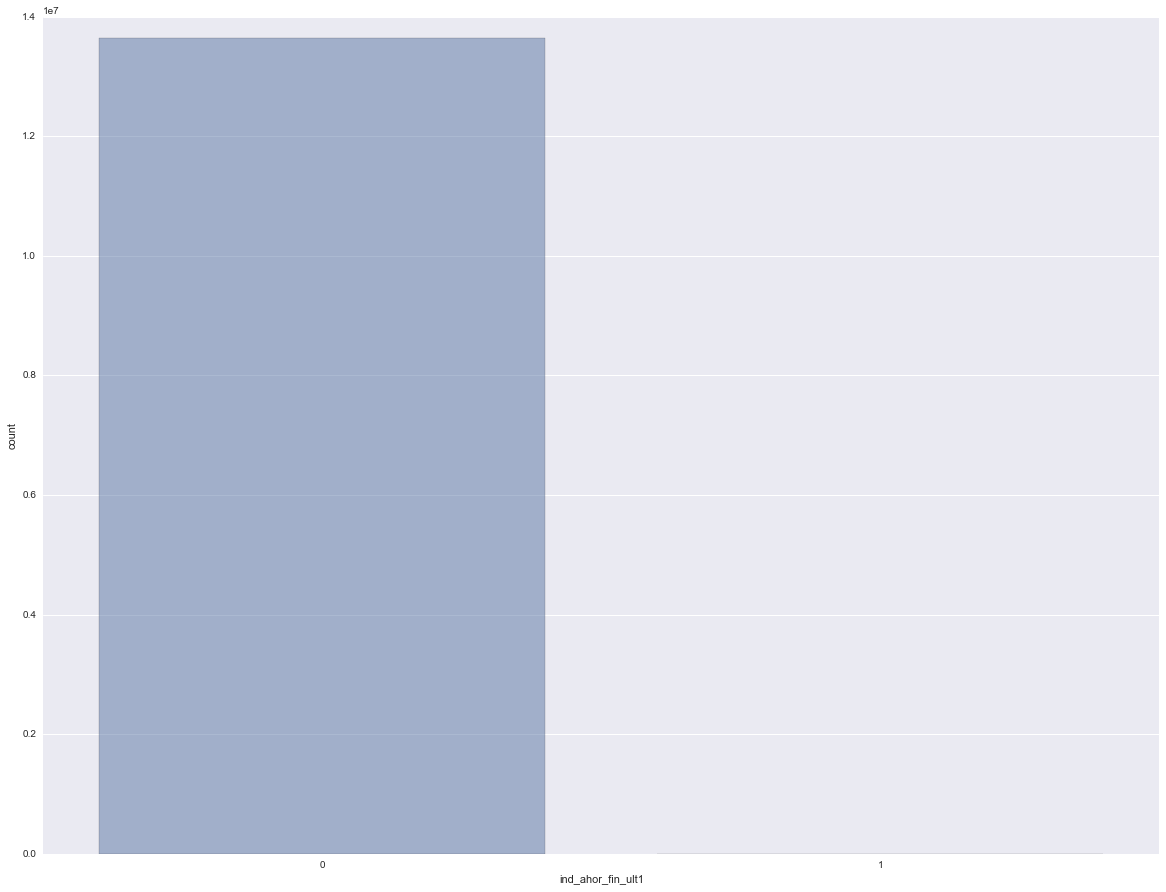

col :  ind_aval_fin_ult1


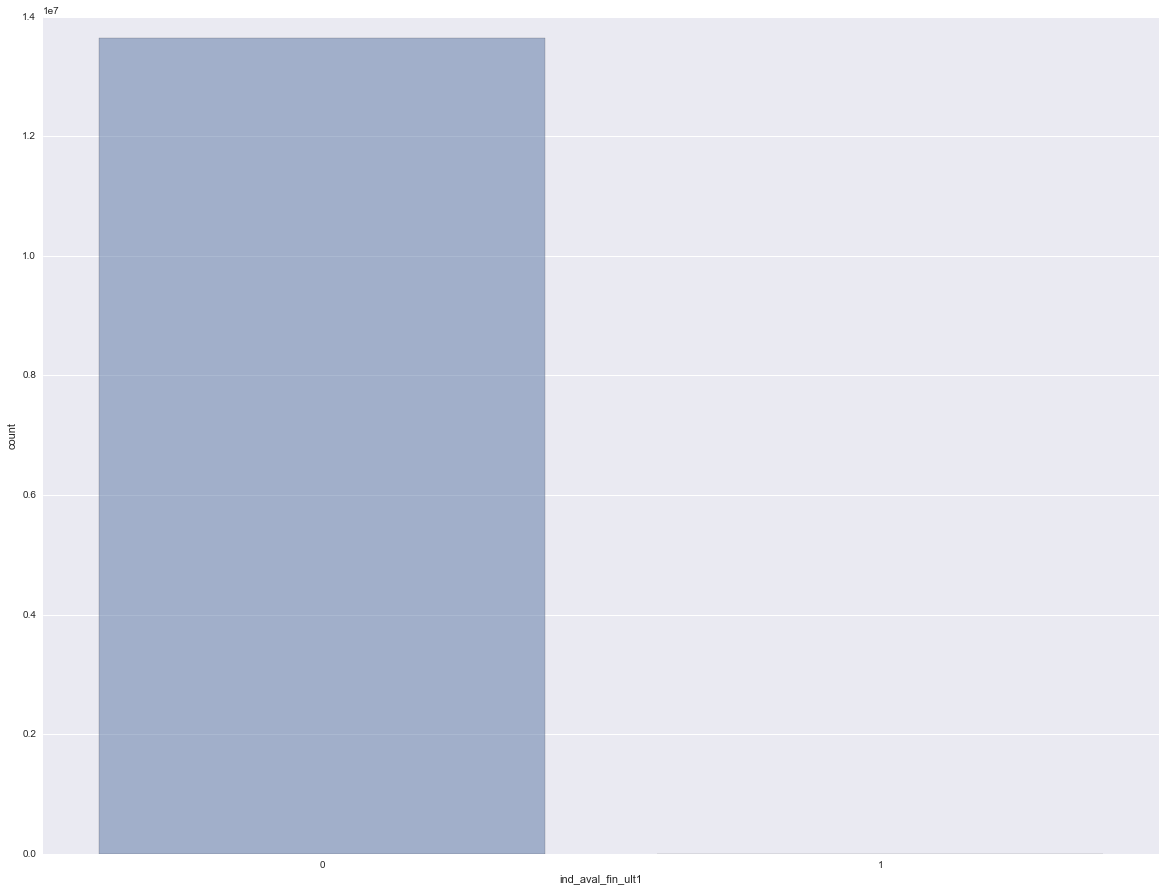

col :  ind_cco_fin_ult1


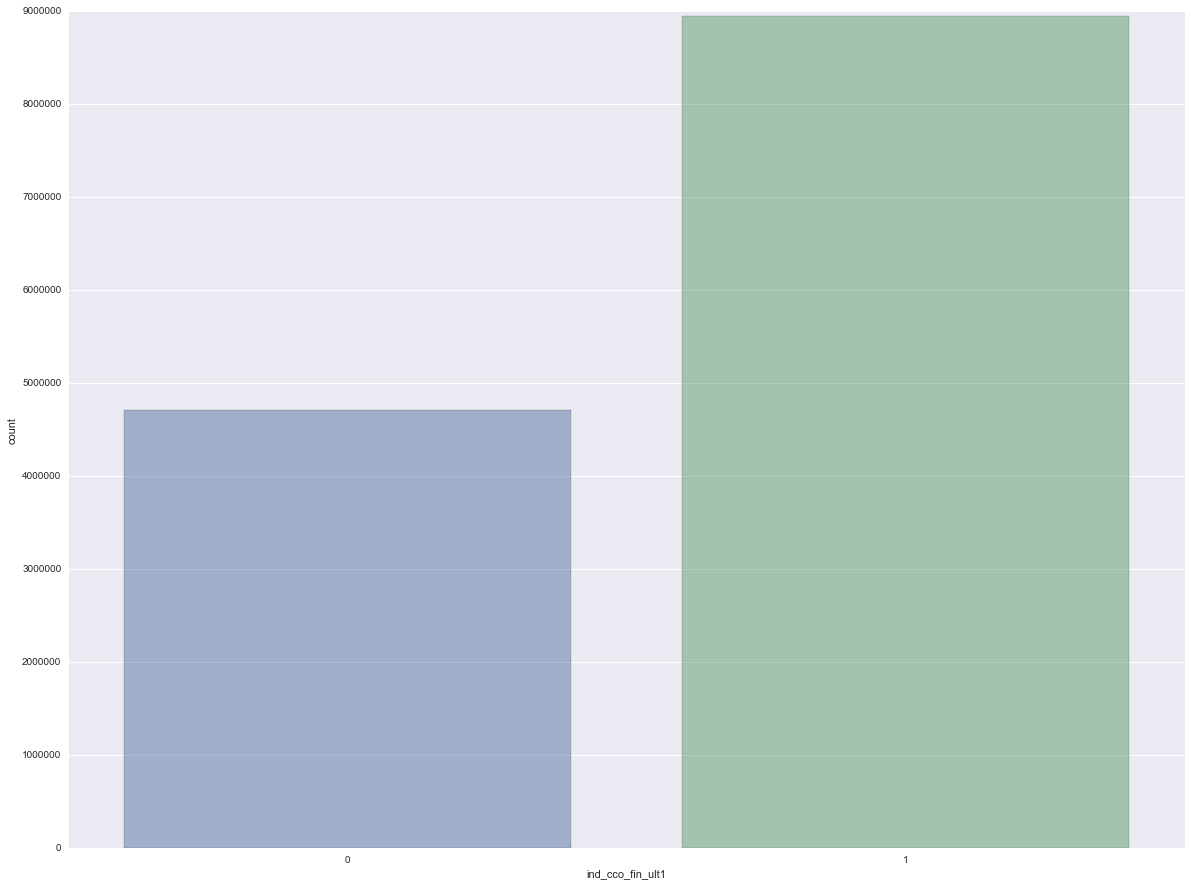

col :  ind_cder_fin_ult1


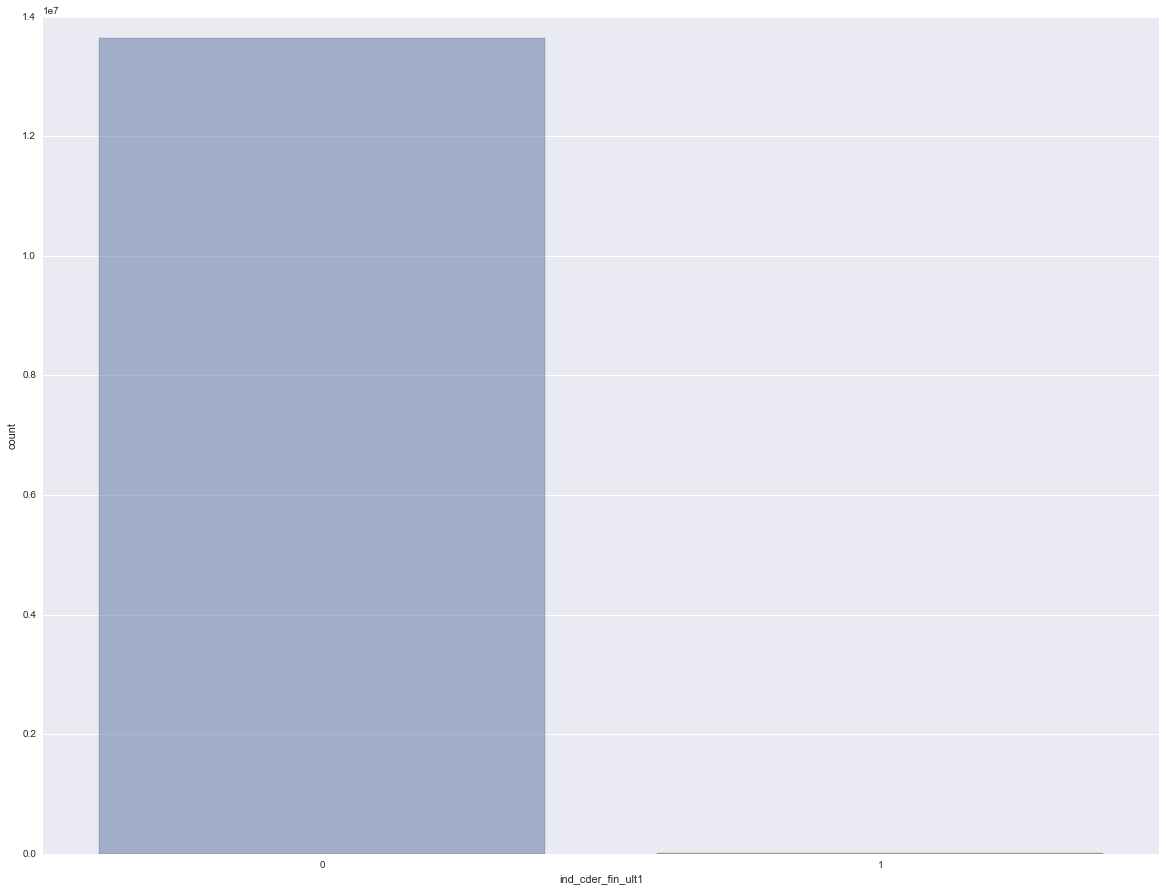

col :  ind_cno_fin_ult1


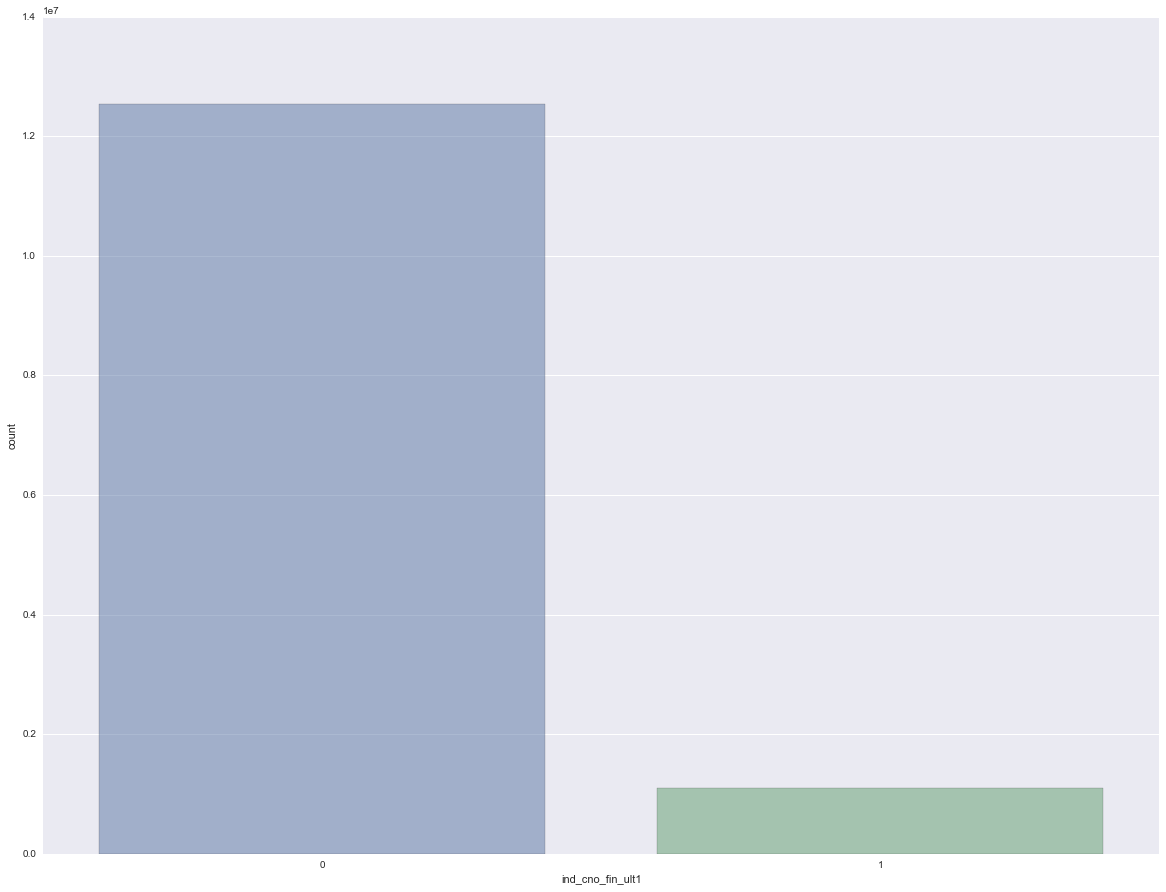

col :  ind_ctju_fin_ult1


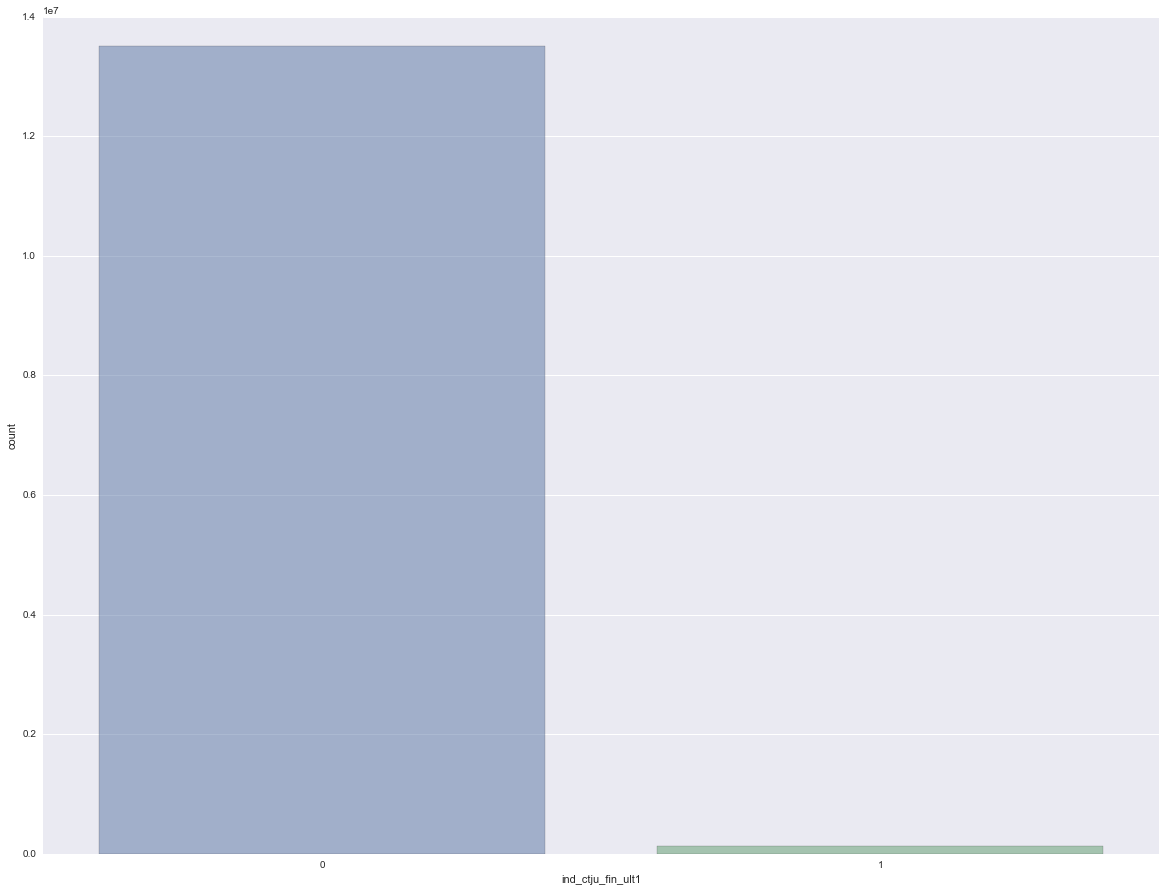

col :  ind_ctma_fin_ult1


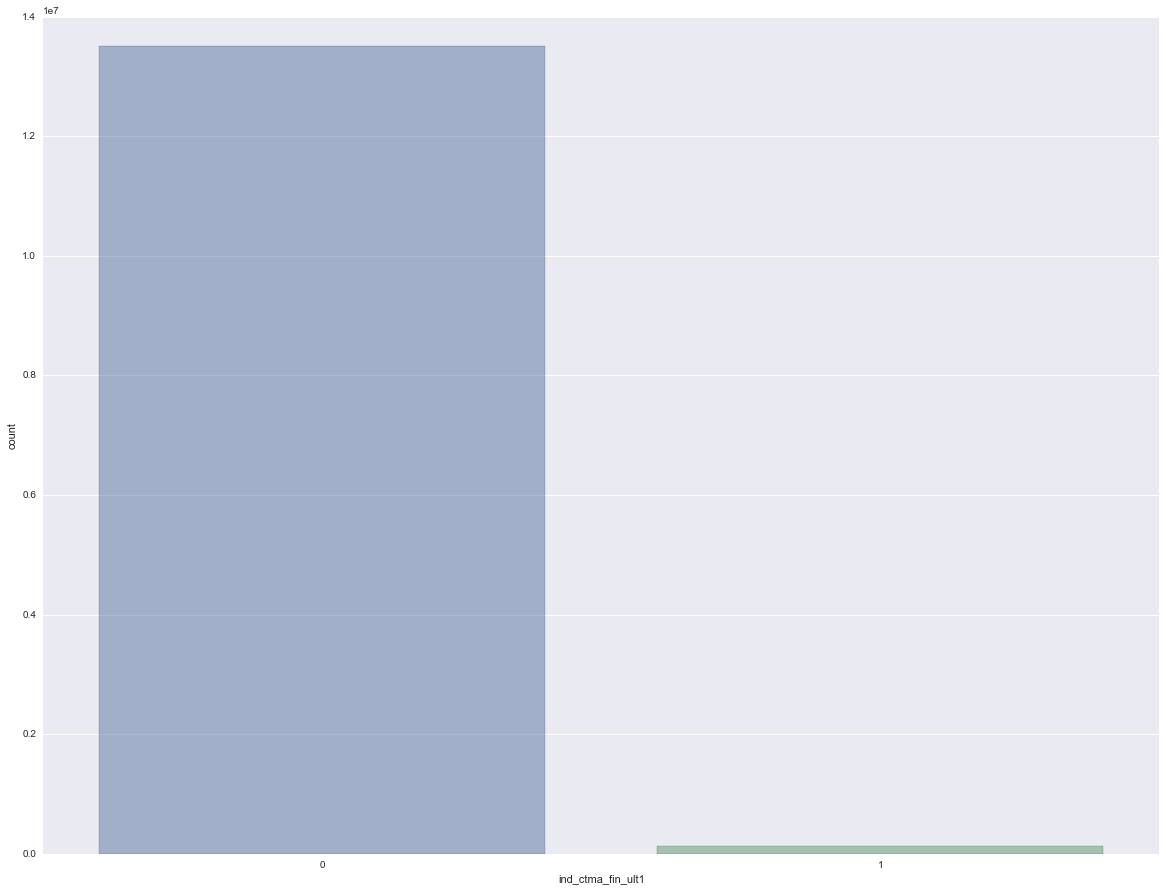

col :  ind_ctop_fin_ult1


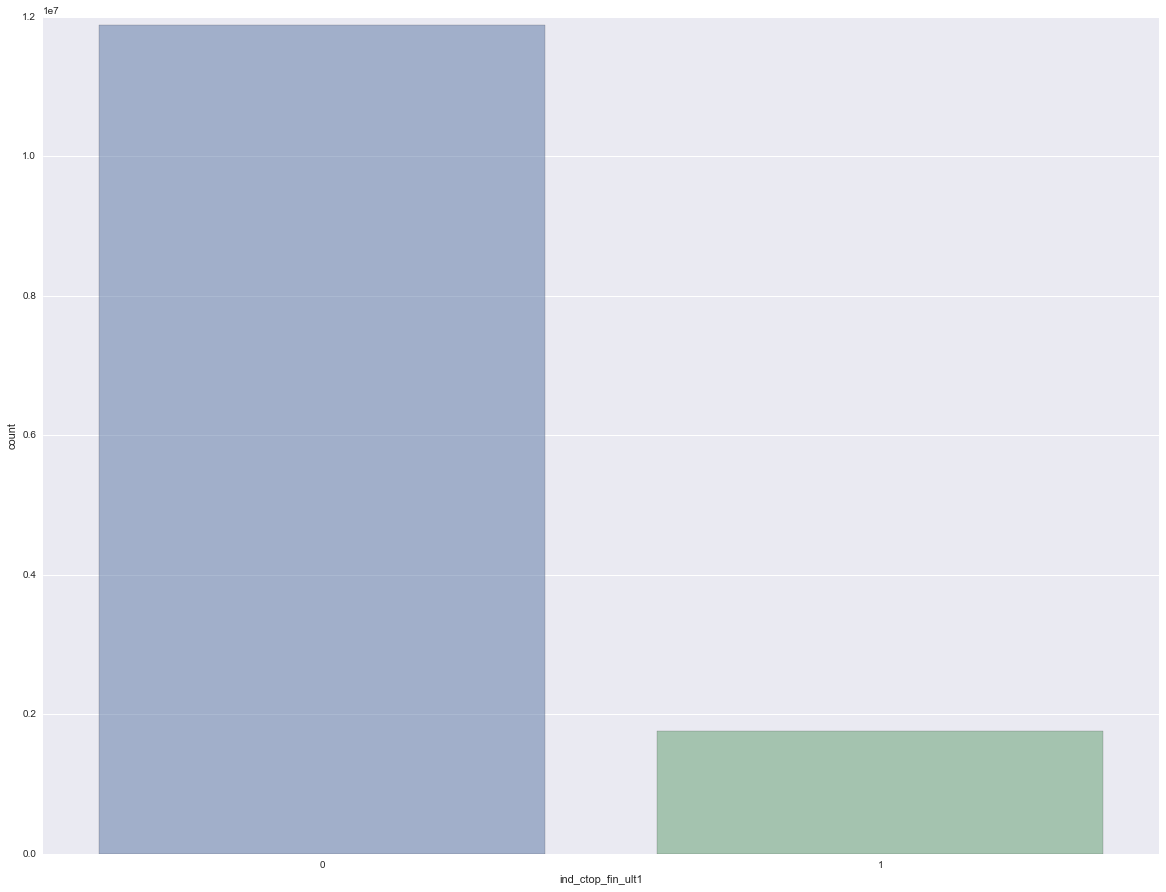

col :  ind_ctpp_fin_ult1


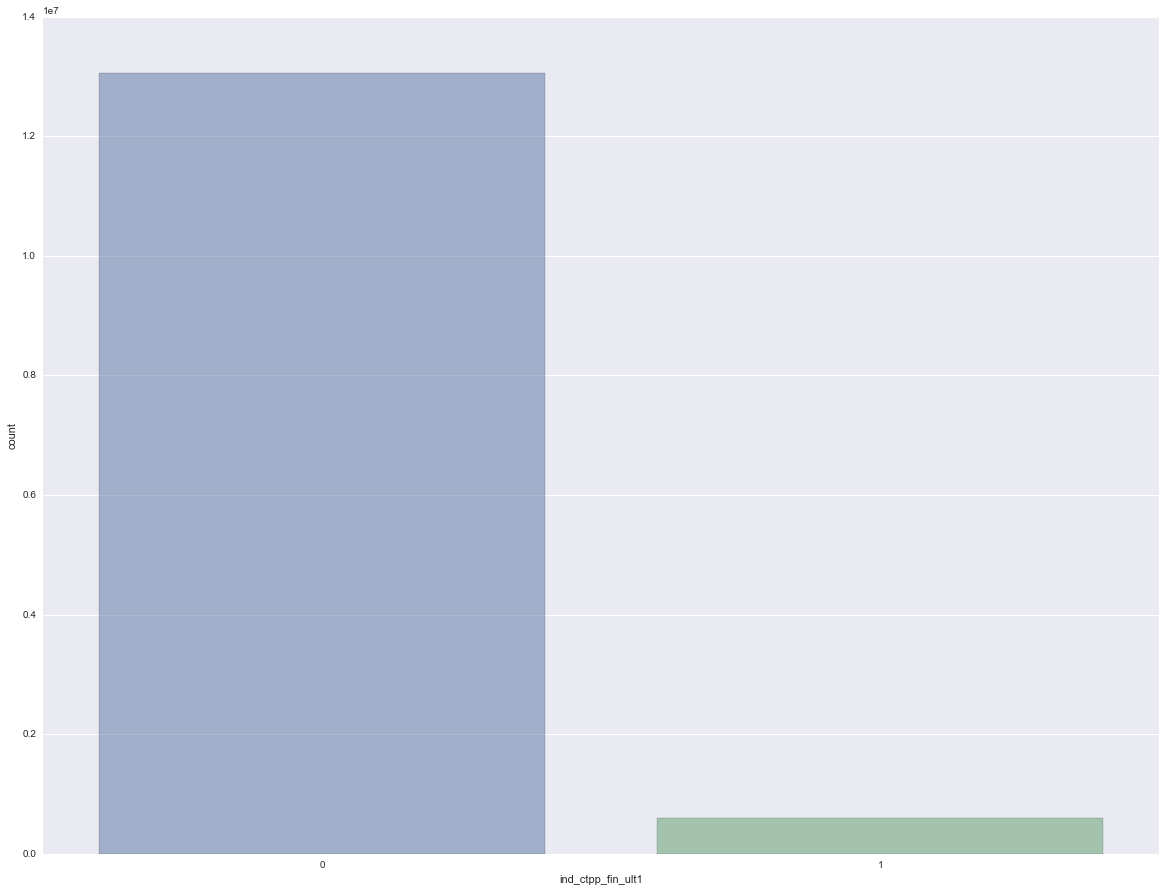

col :  ind_deco_fin_ult1


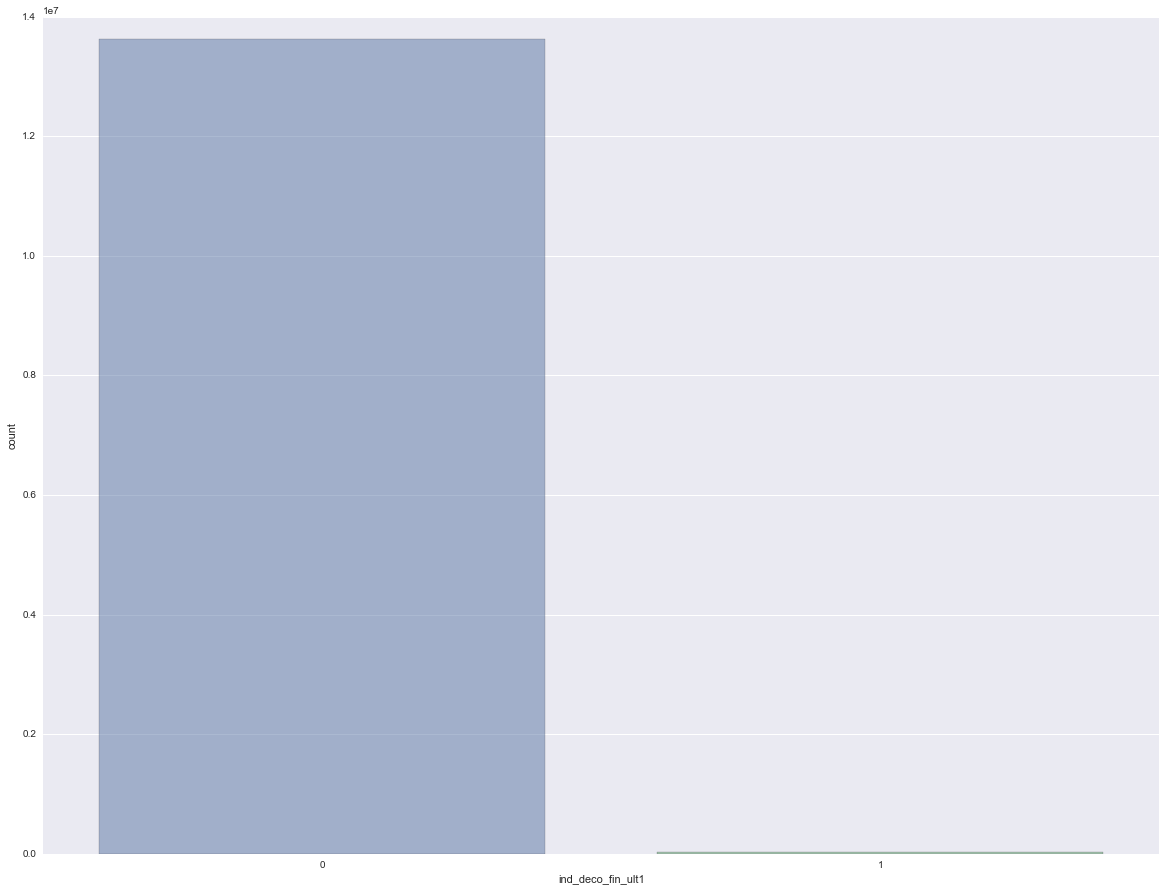

col :  ind_deme_fin_ult1


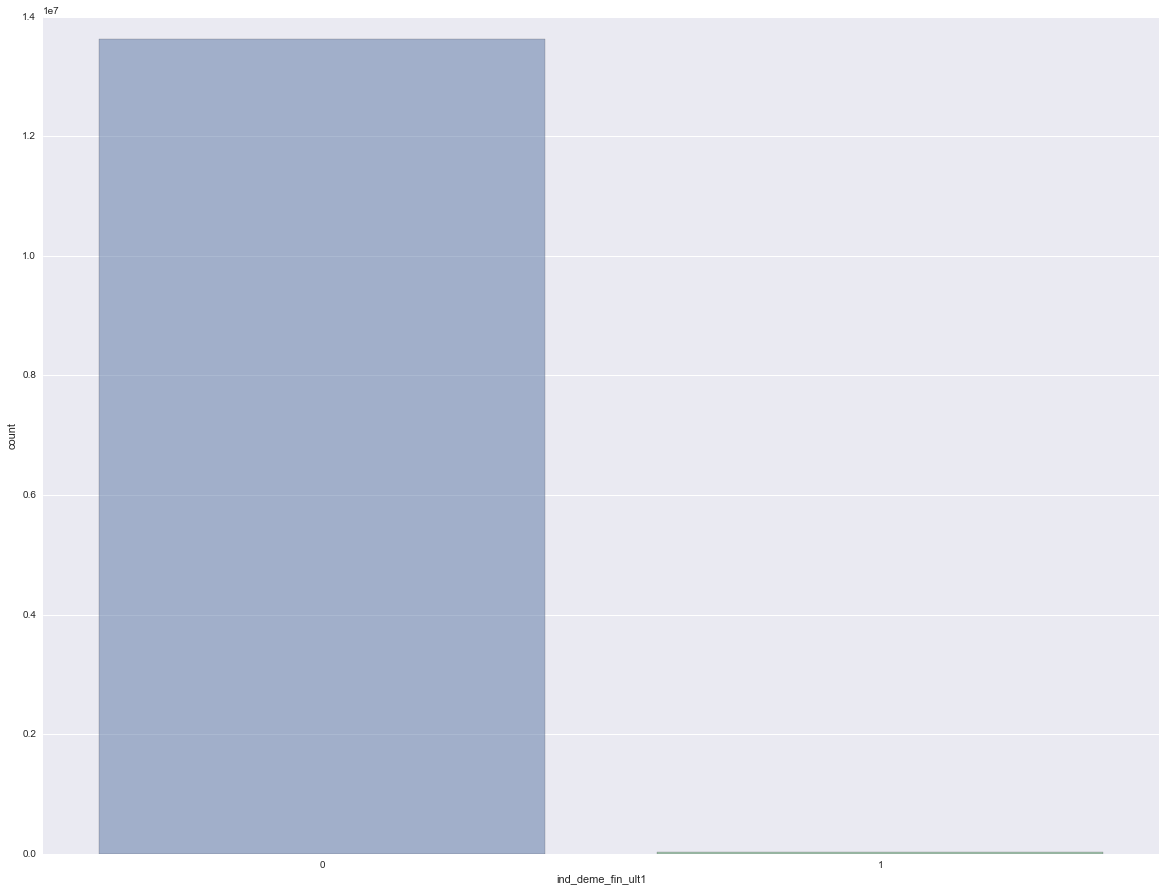

col :  ind_dela_fin_ult1


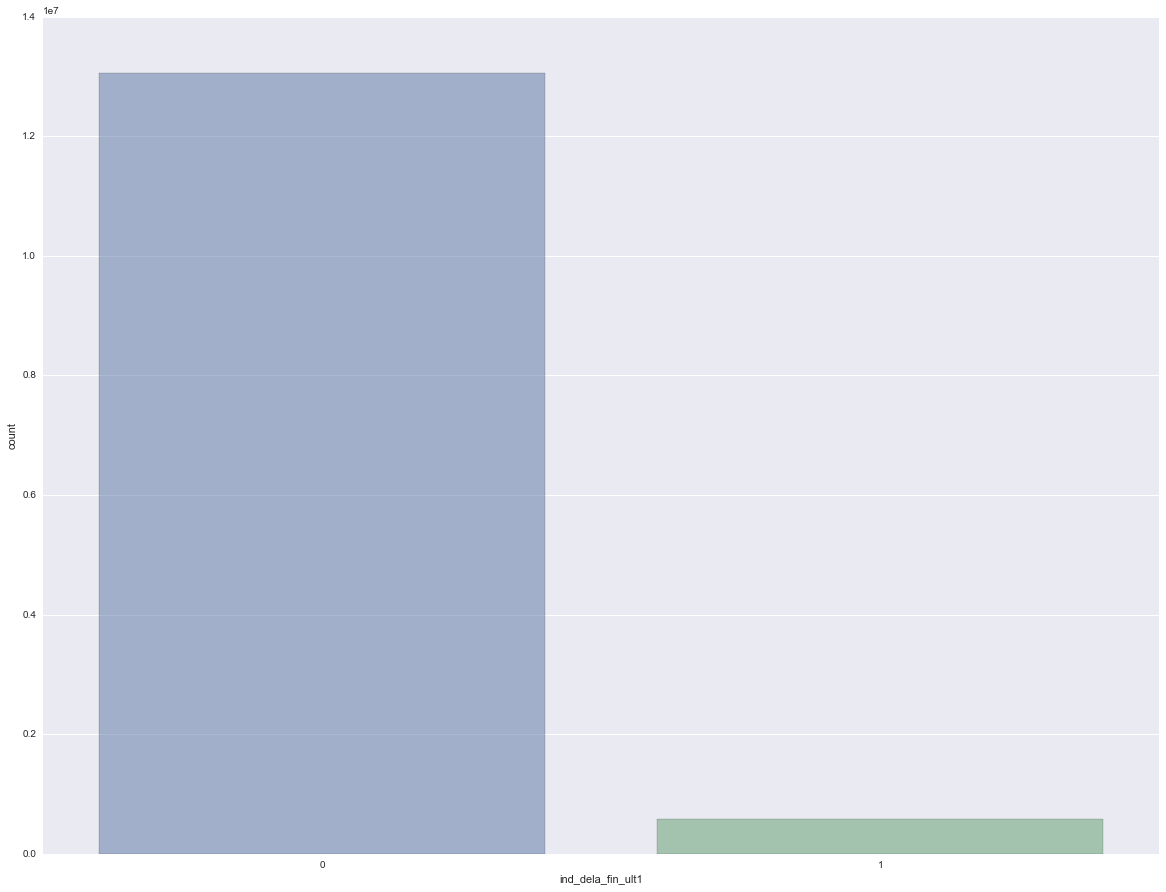

col :  ind_ecue_fin_ult1


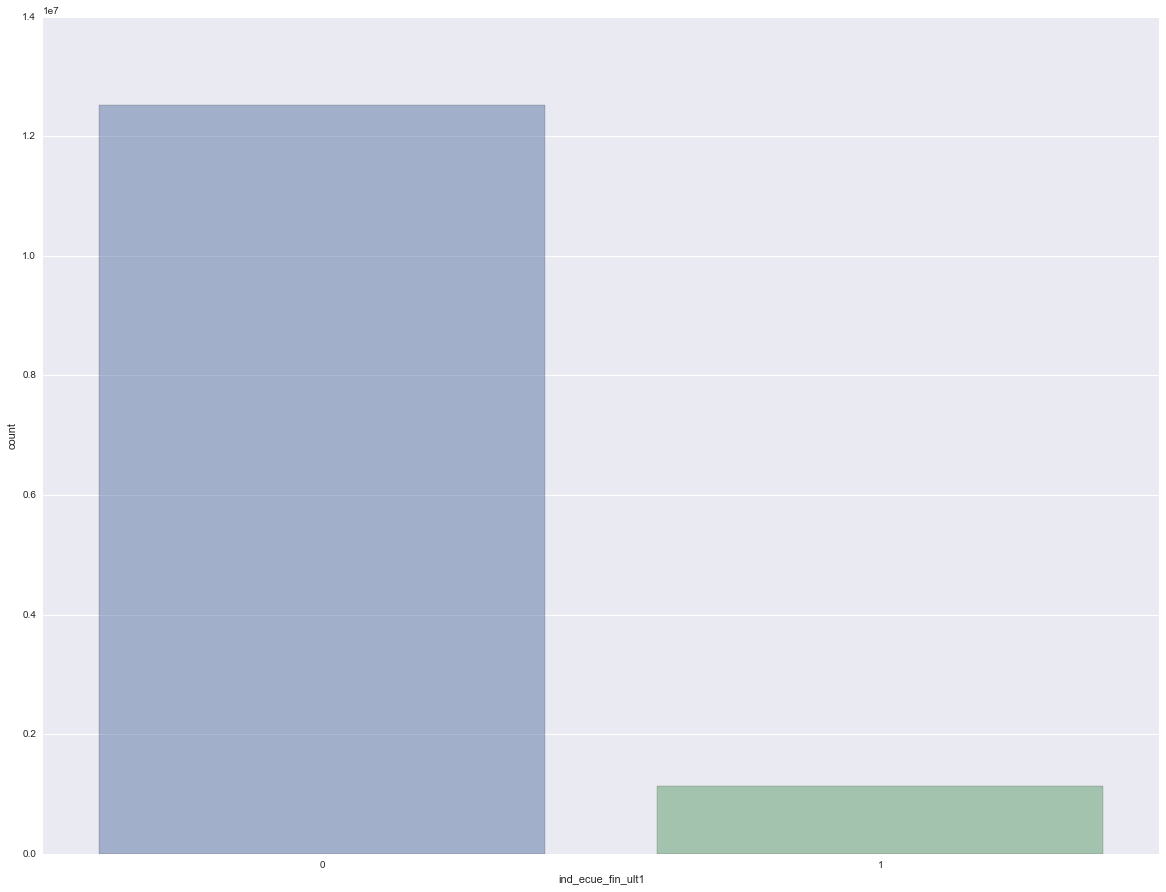

col :  ind_fond_fin_ult1


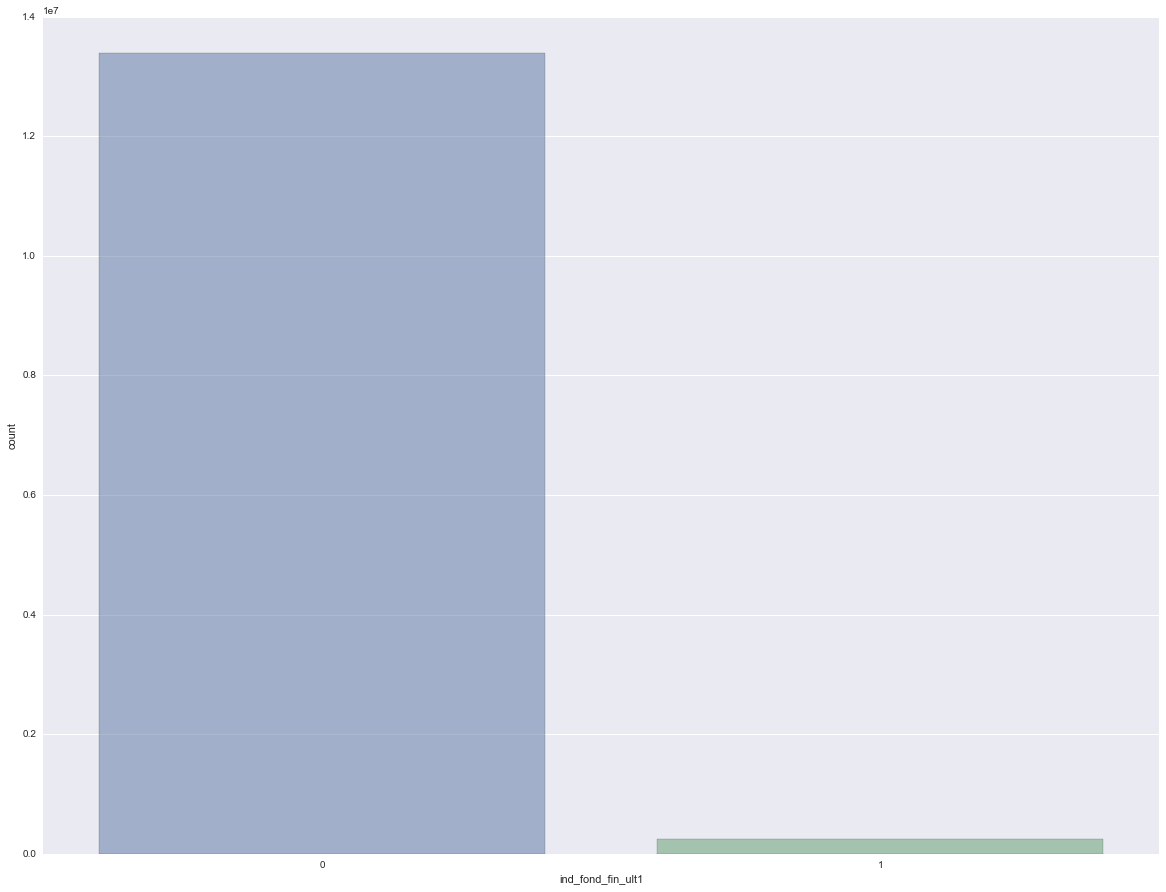

col :  ind_hip_fin_ult1


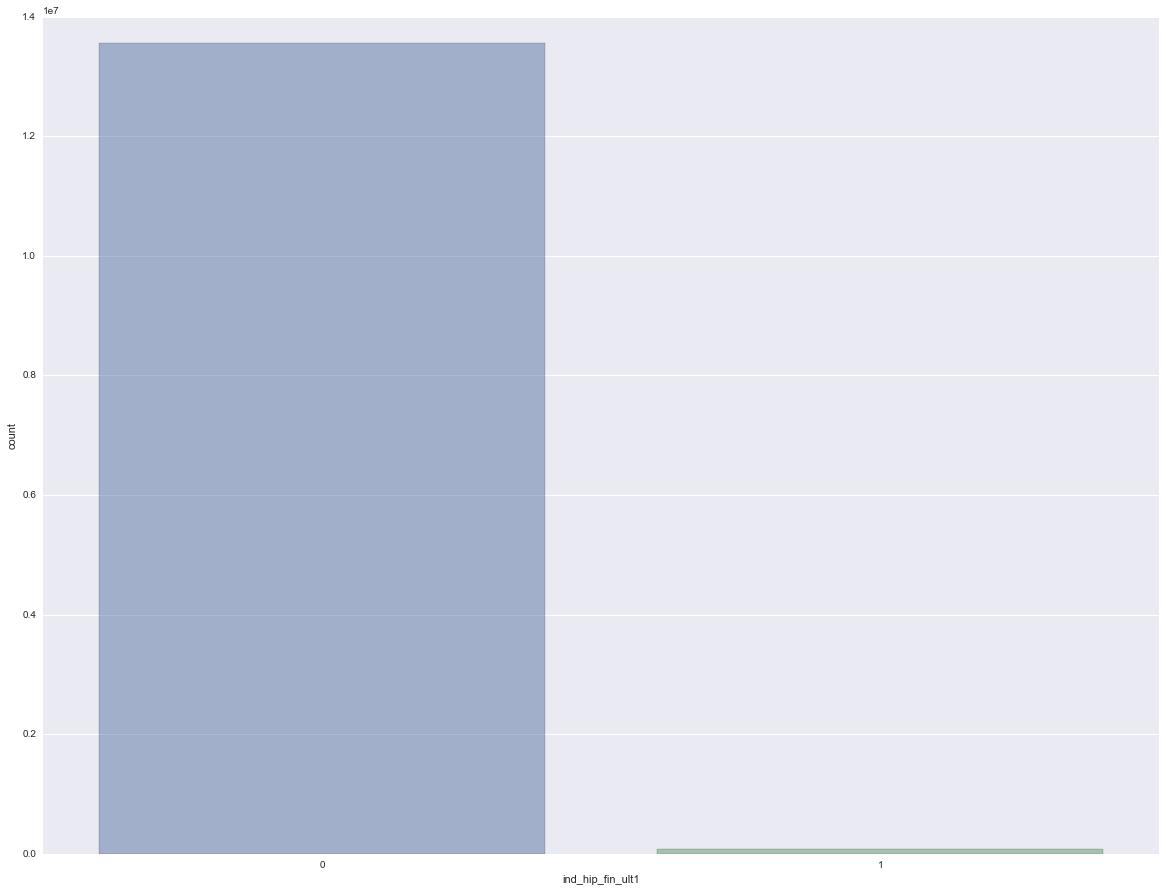

col :  ind_plan_fin_ult1


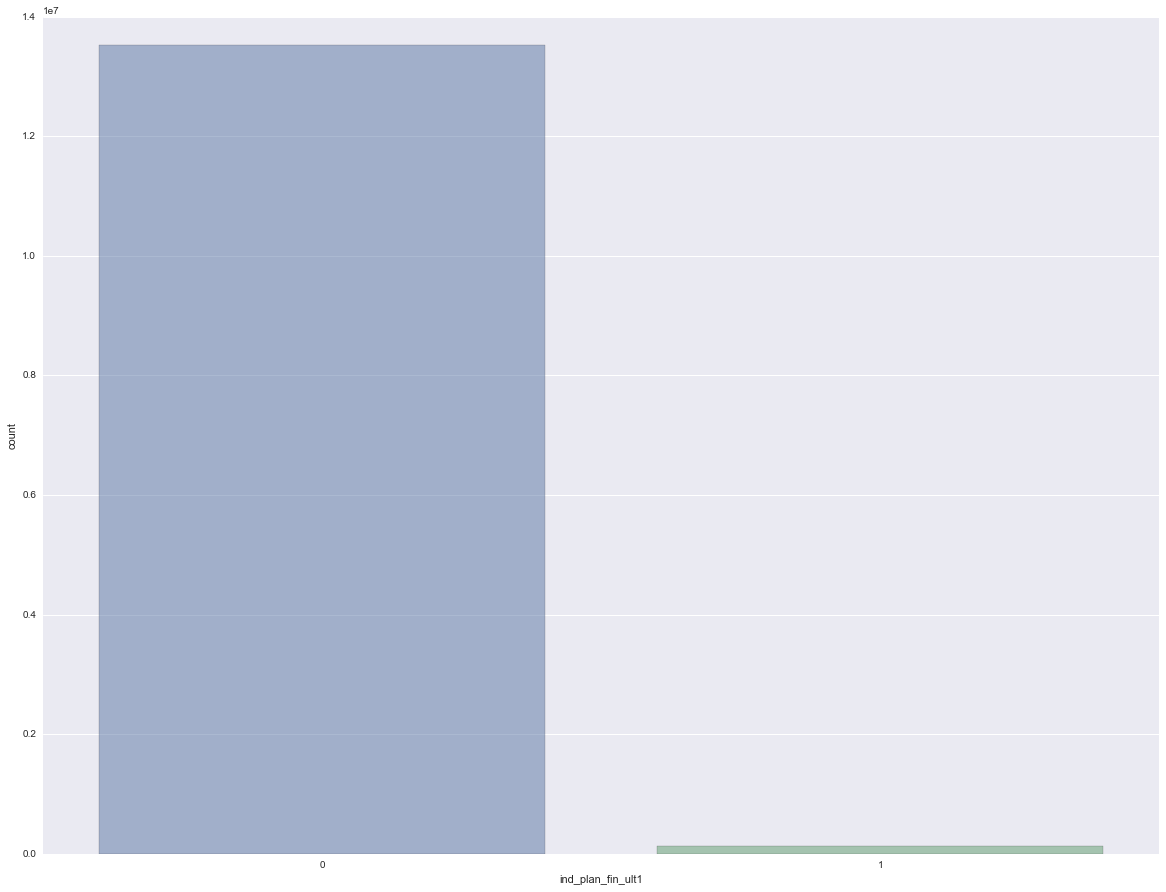

col :  ind_pres_fin_ult1


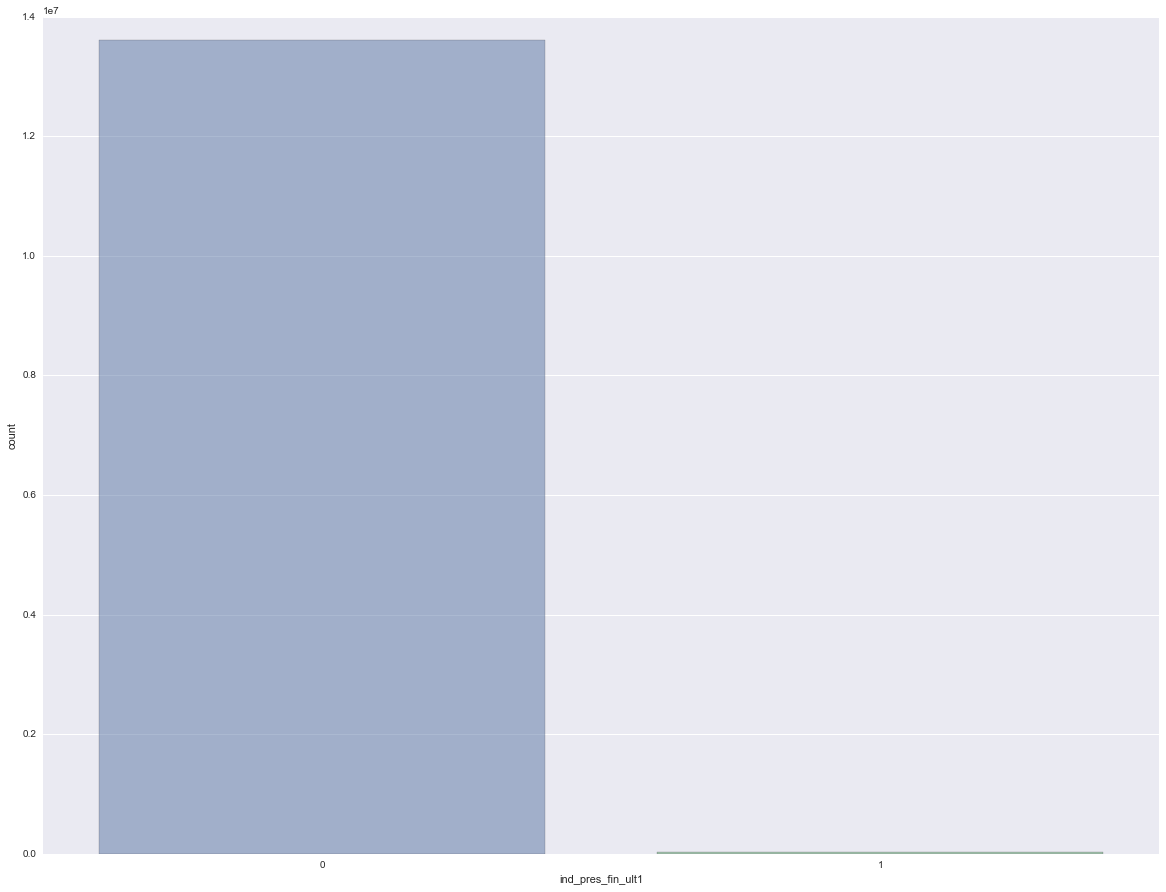

col :  ind_reca_fin_ult1


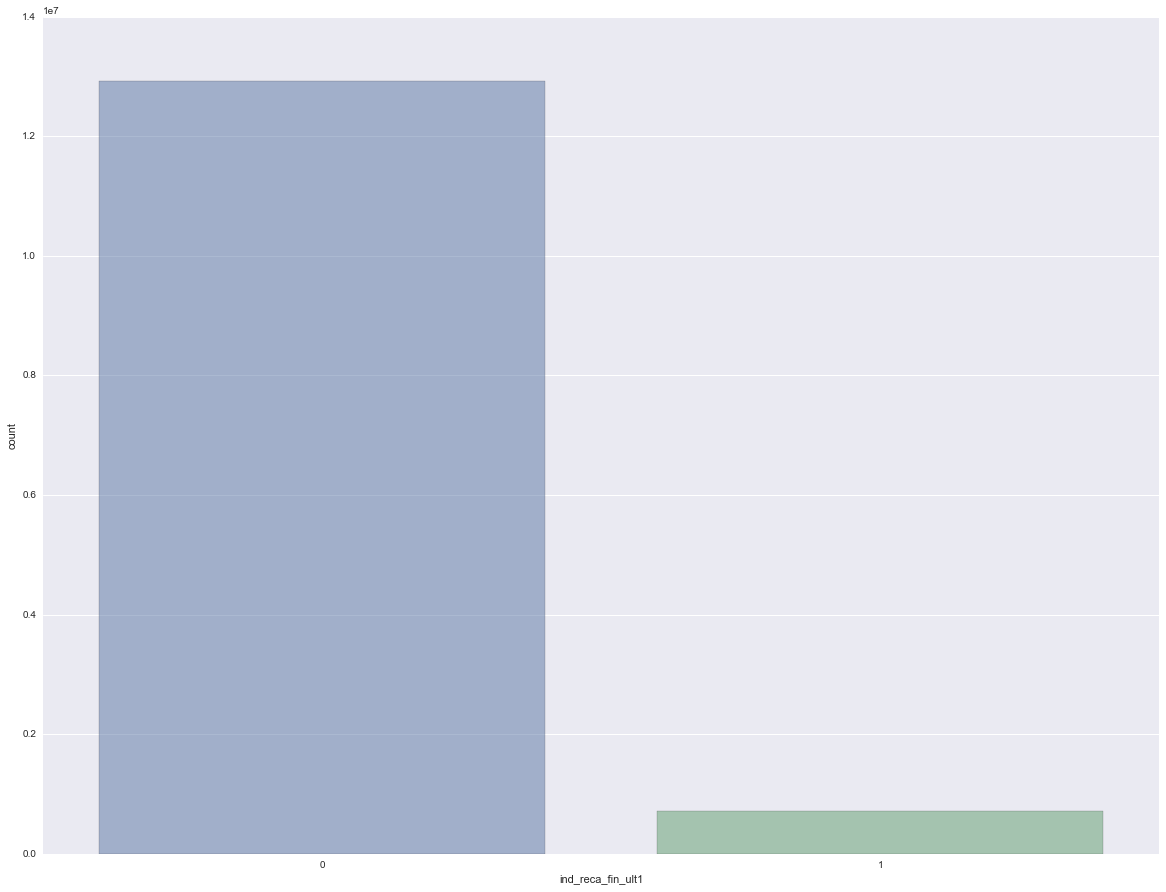

col :  ind_tjcr_fin_ult1


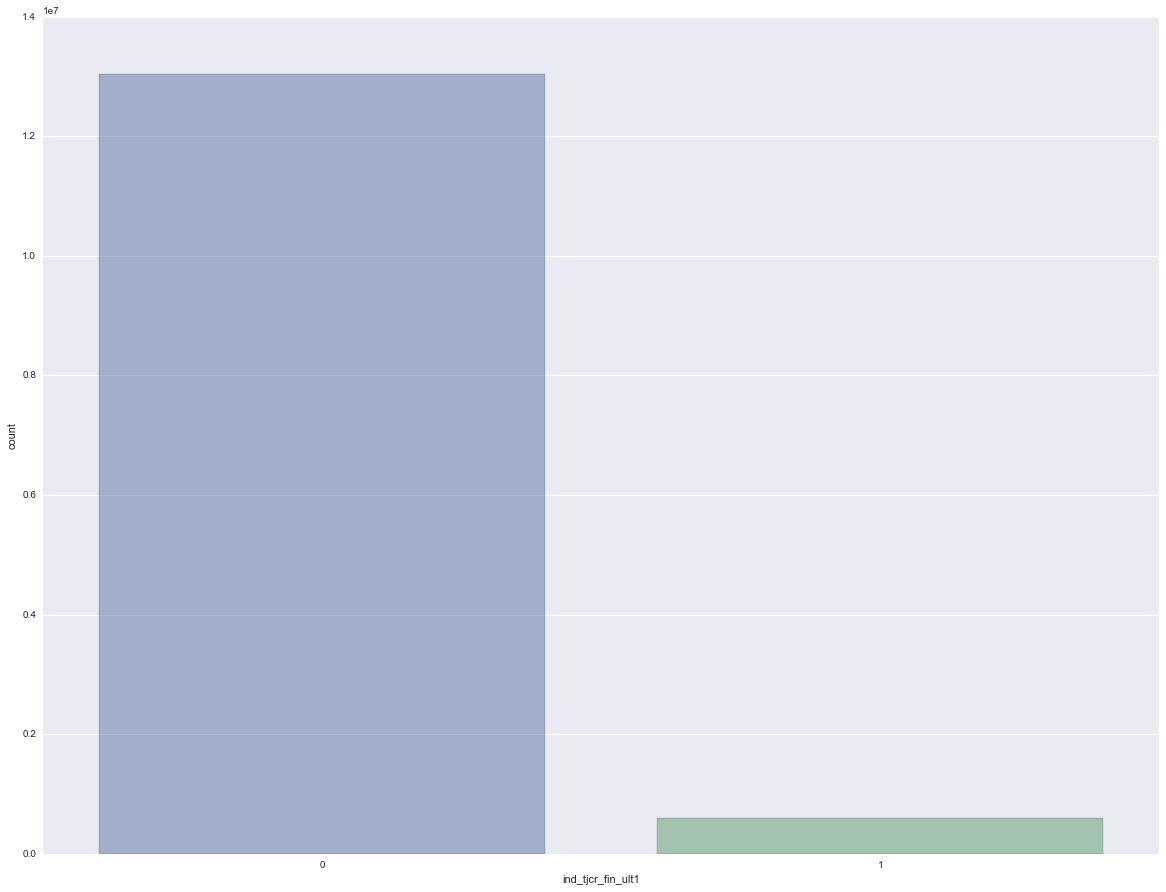

col :  ind_valo_fin_ult1


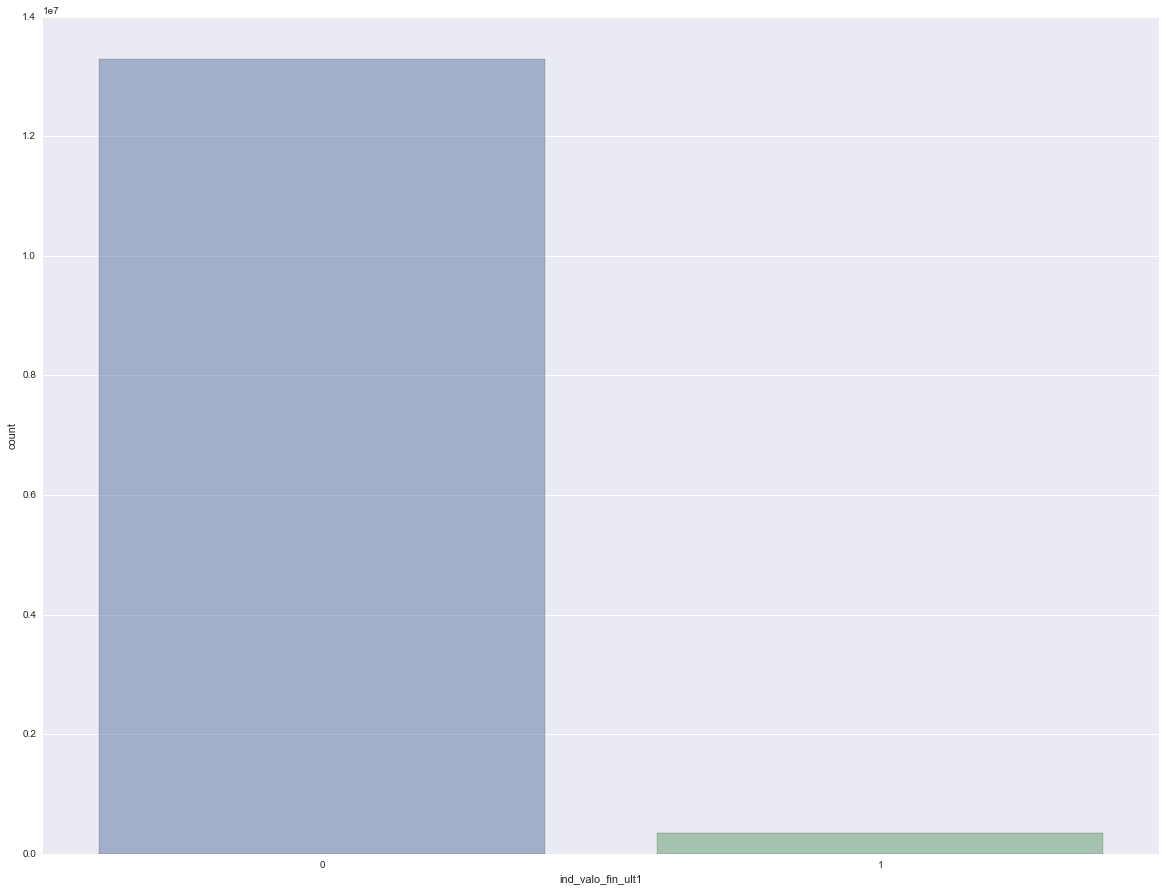

col :  ind_viv_fin_ult1


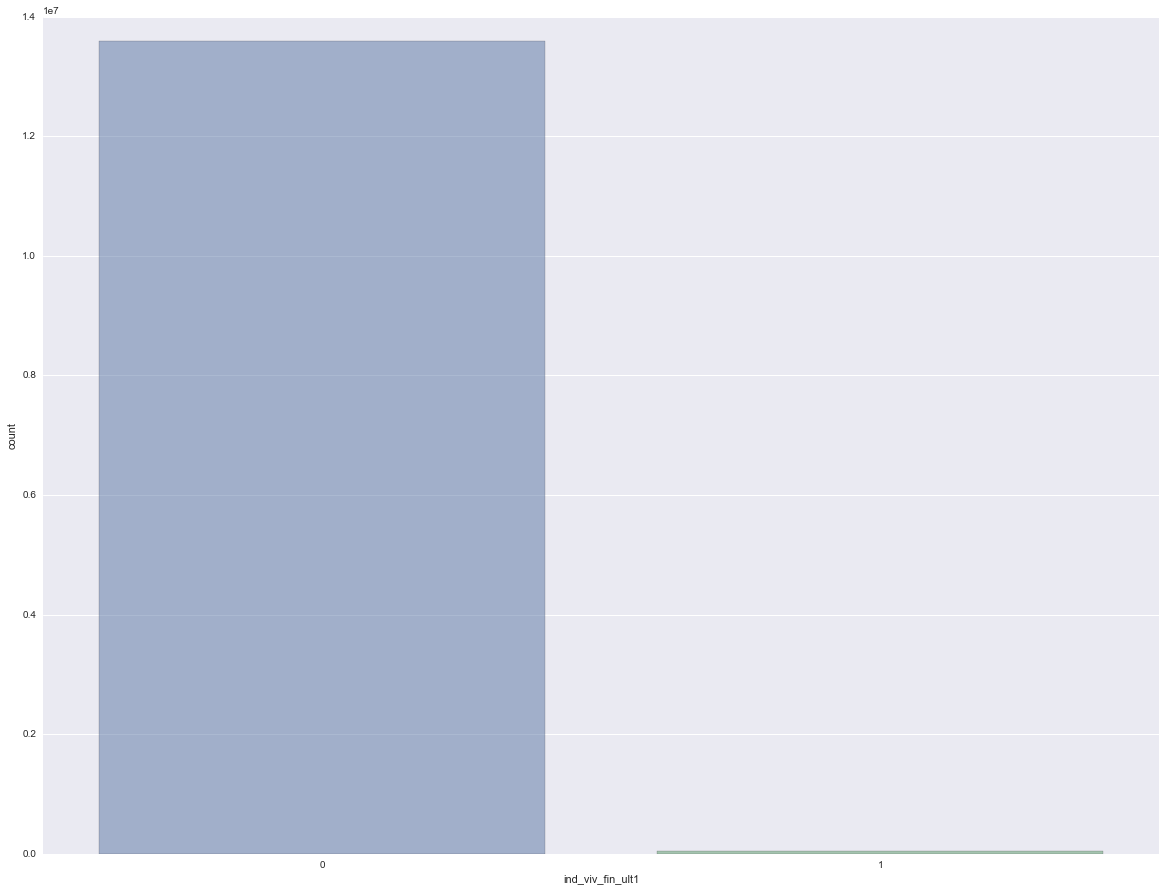

col :  ind_nomina_ult1


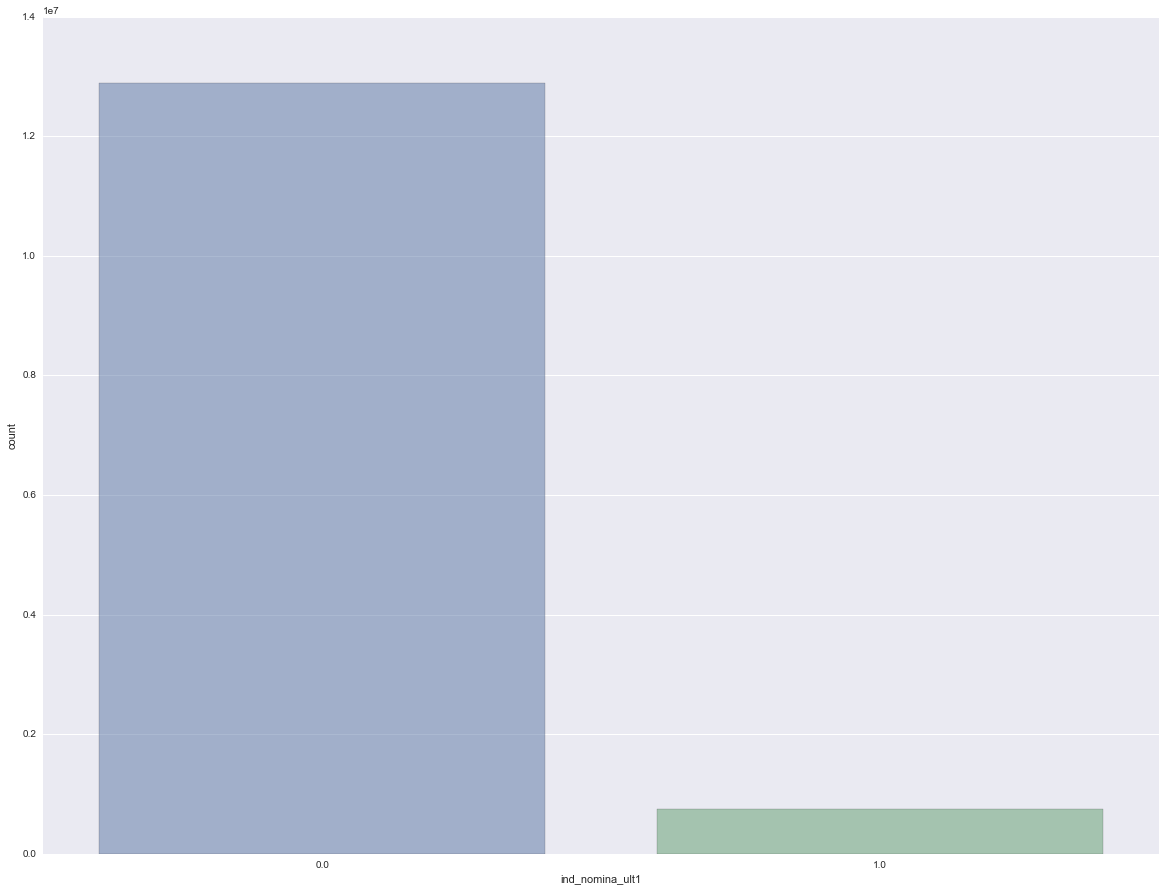

col :  ind_nom_pens_ult1


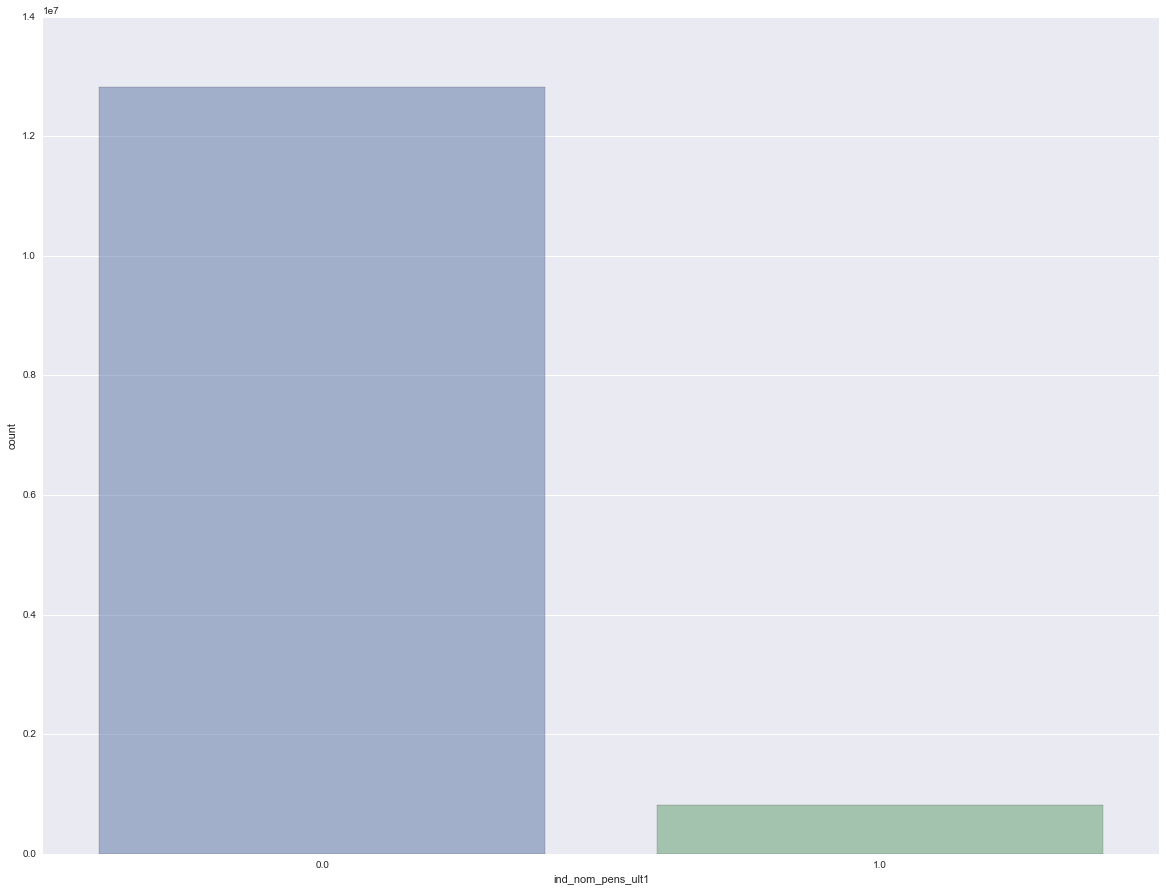

col :  ind_recibo_ult1


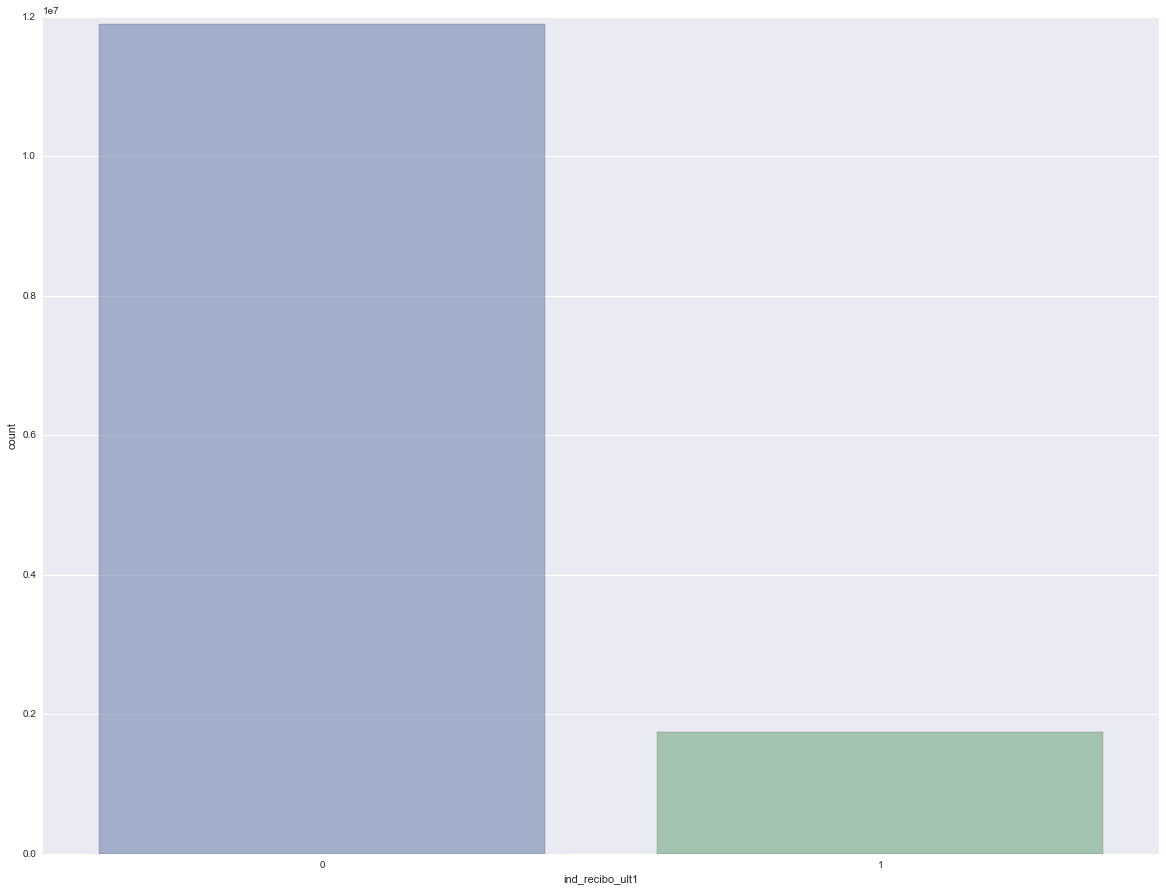

Wall time: 1min 3s


In [45]:
%%time
flag = False
# histogram of features
for col in train_data.columns:
    if col == 'segmento':
        flag = True
    if flag:
        print('='*50)
        print('col : ', col)
        f, ax = plt.subplots(figsize=(20, 15))
        sns.countplot(x=col, data=train_data, alpha=0.5)
        plt.show()


In [46]:
# 월
np.unique(train_data['fecha_dato']).tolist()

['2015-01-28',
 '2015-02-28',
 '2015-03-28',
 '2015-04-28',
 '2015-05-28',
 '2015-06-28',
 '2015-07-28',
 '2015-08-28',
 '2015-09-28',
 '2015-10-28',
 '2015-11-28',
 '2015-12-28',
 '2016-01-28',
 '2016-02-28',
 '2016-03-28',
 '2016-04-28',
 '2016-05-28']

In [48]:
# 라벨값
train_data.columns[24:] 

Index(['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [50]:
months = np.unique(train_data['fecha_dato']).tolist()
label_cols = train_data.columns[24:] .tolist()

In [55]:
train_data.groupby(['fecha_dato'])[label_cols[i]].agg('sum')

fecha_dato
2015-01-28     95601
2015-02-28     94543
2015-03-28     97211
2015-04-28     98312
2015-05-28     96487
2015-06-28     98655
2015-07-28     99981
2015-08-28     96045
2015-09-28    100726
2015-10-28    104427
2015-11-28    104990
2015-12-28    107320
2016-01-28    107033
2016-02-28    108668
2016-03-28    110915
2016-04-28    111748
2016-05-28    113050
Name: ind_recibo_ult1, dtype: int64

In [51]:
label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(train_data.groupby(['fecha_dato'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

In [52]:
label_over_time

[[88, 89, 89, 87, 85, 83, 82, 82, 81, 81, 81, 79, 78, 78, 78, 77, 78],
 [19, 20, 21, 21, 21, 21, 19, 19, 19, 18, 18, 18, 18, 16, 16, 16, 16],
 [487855,
  488658,
  489074,
  489069,
  489737,
  494027,
  503903,
  514827,
  529608,
  545516,
  551801,
  557050,
  559581,
  560014,
  561446,
  561807,
  561615],
 [301,
  301,
  315,
  313,
  313,
  316,
  320,
  323,
  319,
  317,
  319,
  319,
  323,
  328,
  319,
  314,
  316],
 [58763,
  60028,
  60929,
  62221,
  63391,
  59845,
  61607,
  62997,
  63759,
  65449,
  67382,
  66243,
  67411,
  68636,
  70141,
  71757,
  73061],
 [7757,
  7690,
  7674,
  7653,
  7647,
  7596,
  7582,
  7556,
  7521,
  7524,
  7506,
  7581,
  7595,
  7612,
  7617,
  7605,
  7581],
 [8418,
  8228,
  7875,
  7482,
  7096,
  6920,
  6939,
  6993,
  7180,
  7451,
  7839,
  8191,
  8255,
  8411,
  8715,
  8652,
  8097],
 [106471,
  106043,
  105688,
  105167,
  104947,
  104602,
  104288,
  104053,
  103680,
  103299,
  102900,
  102580,
  102163,
  101729,

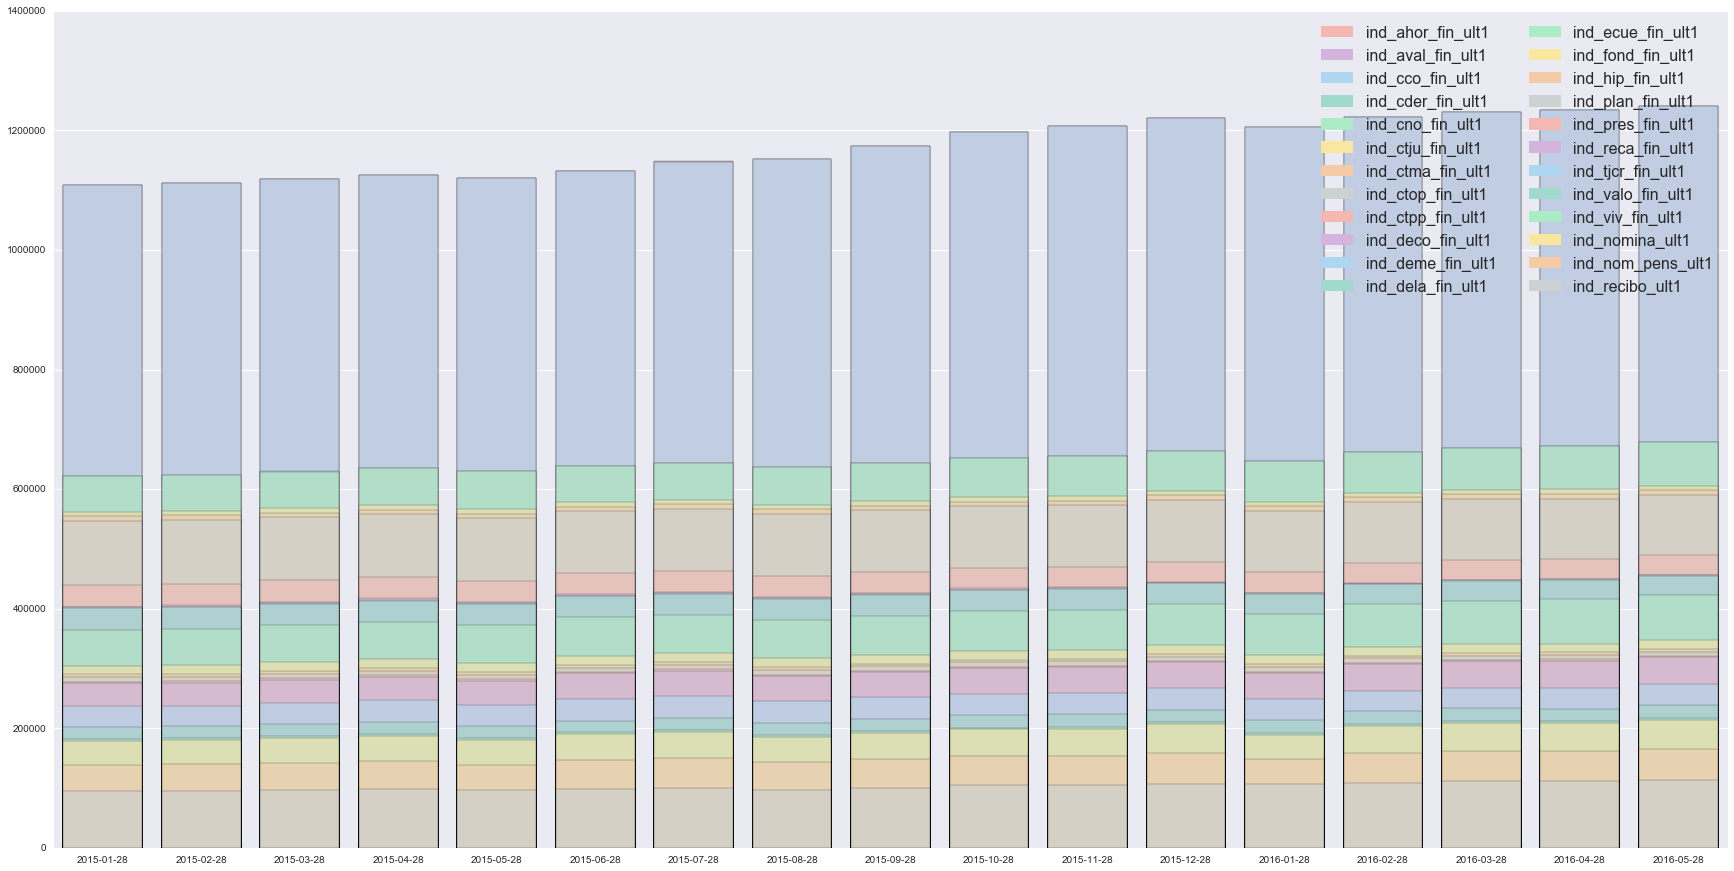

In [56]:
# 월별 고객들이 어떤 상품을 보유하고 있는가-
f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc=1, ncol = 2, prop={'size':16})

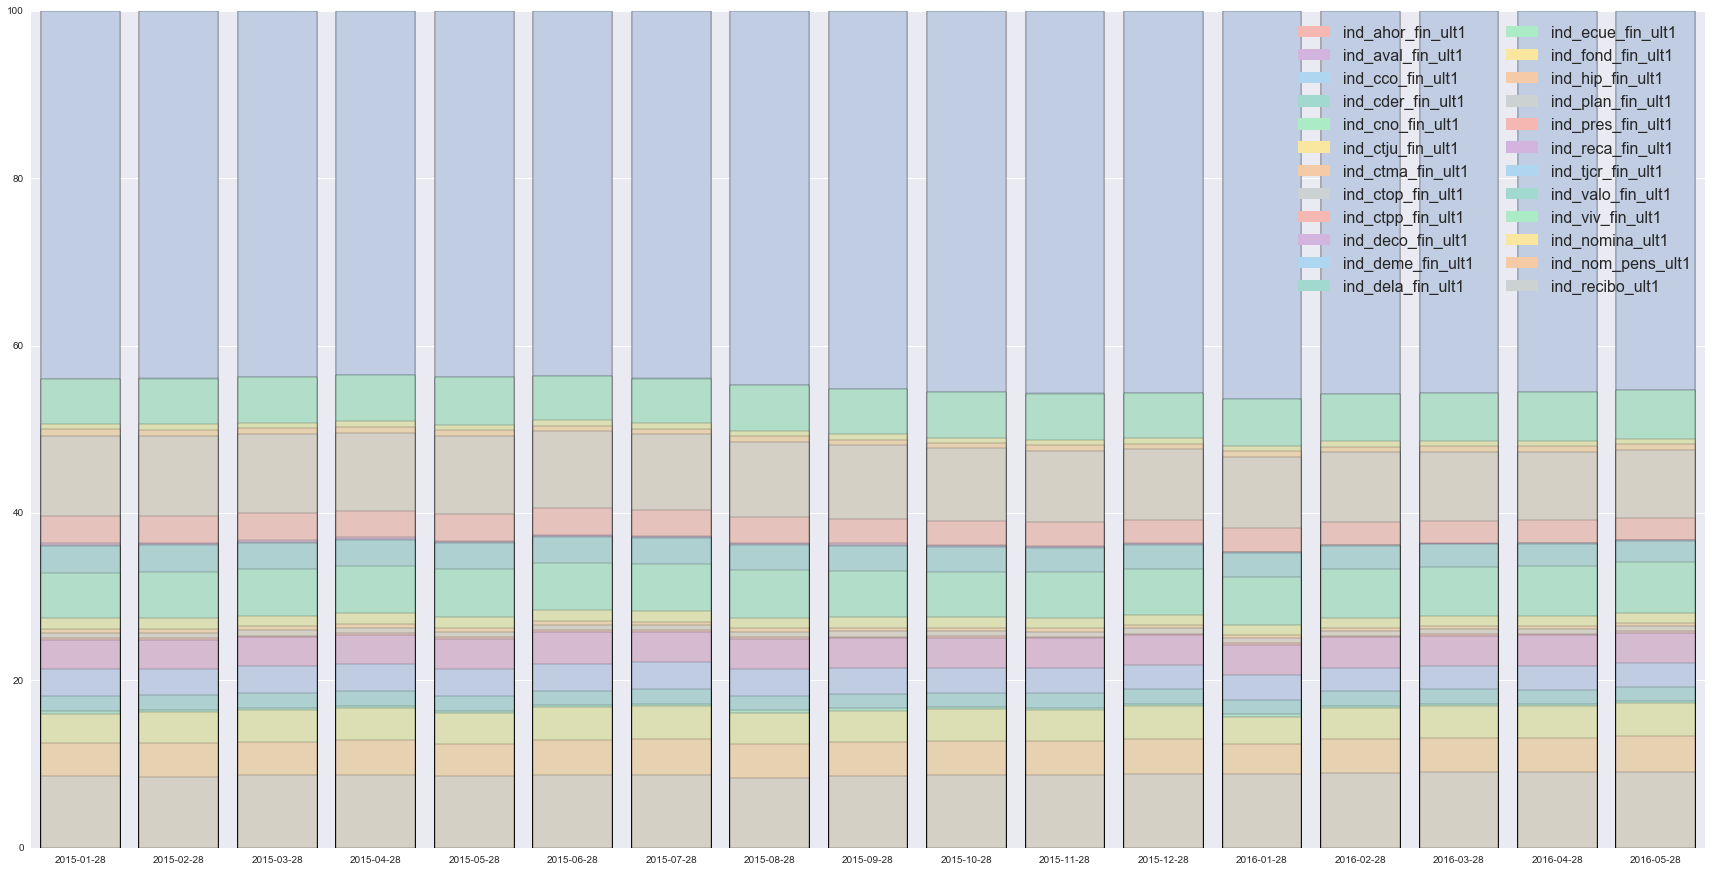

In [57]:
# plot stacked barplot of month vs labels in percentage
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc=1, ncol = 2, prop={'size':16})

In [58]:
labels = pd.read_csv('../input/labels.csv').astype(int)
fecha_dato = pd.read_csv('../input/train_ver2.csv', usecols=['fecha_dato'])

labels['date'] = fecha_dato.fecha_dato
months = np.unique(fecha_dato.fecha_dato).tolist()
label_cols = labels.columns.tolist()[:24]

# prepare for visualization

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    
color_list = ['#F5B7B1','#D2B4DE','#AED6F1','#A2D9CE','#ABEBC6','#F9E79F','#F5CBA7','#CCD1D1']

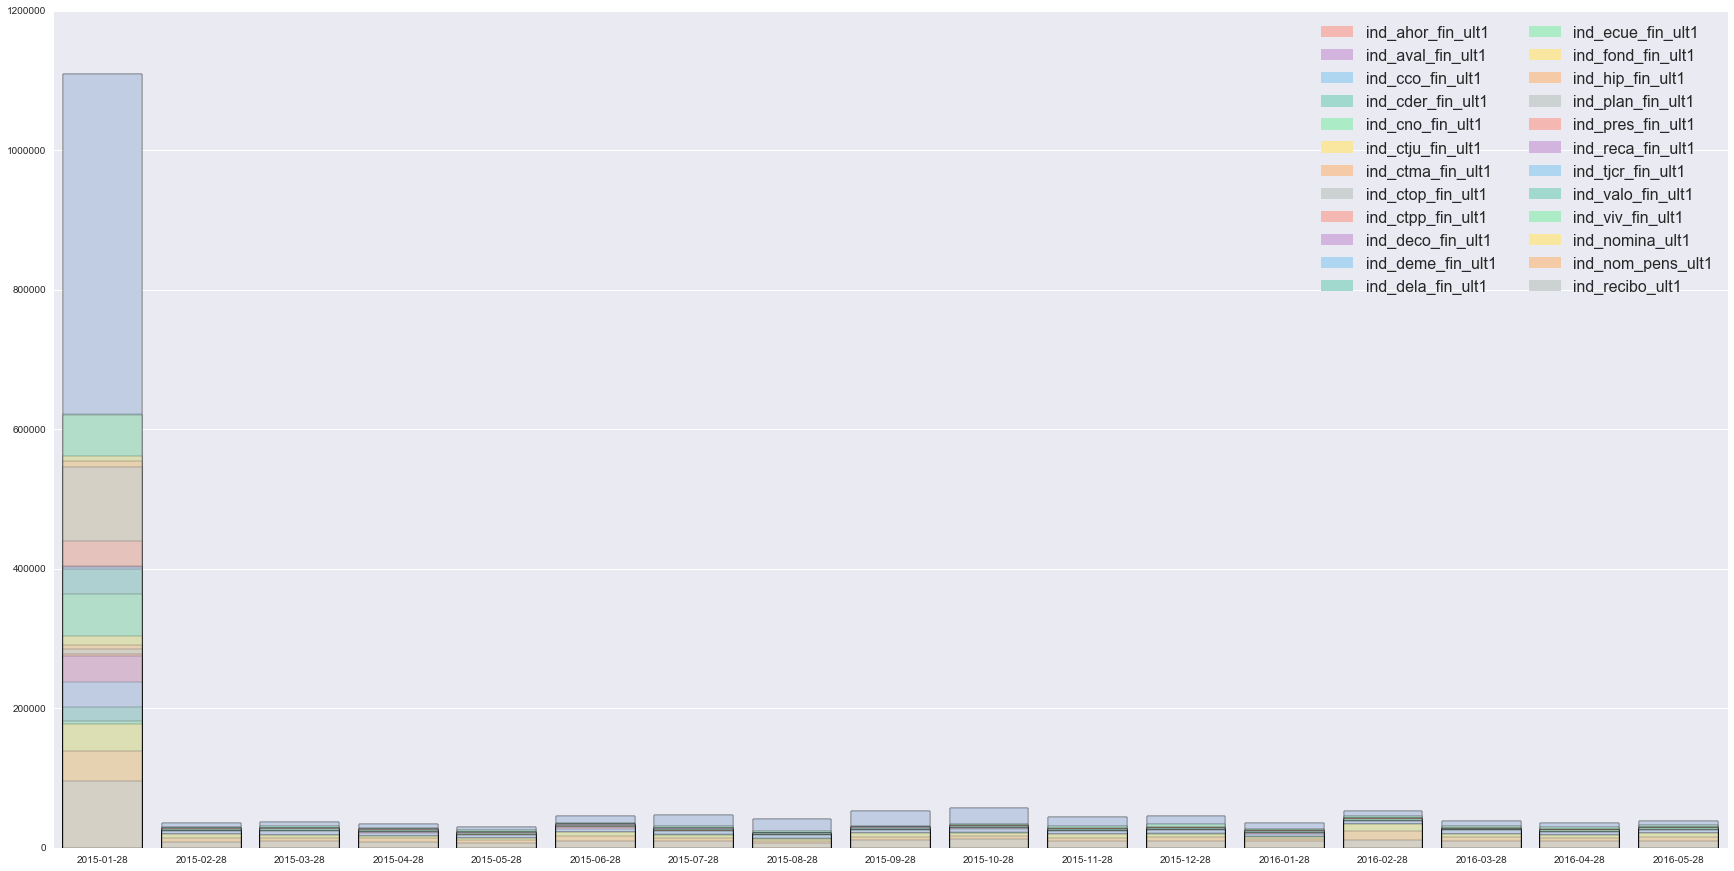

In [59]:
# plot stacked barplot of month vs labels
f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc=1, ncol = 2, prop={'size':16})

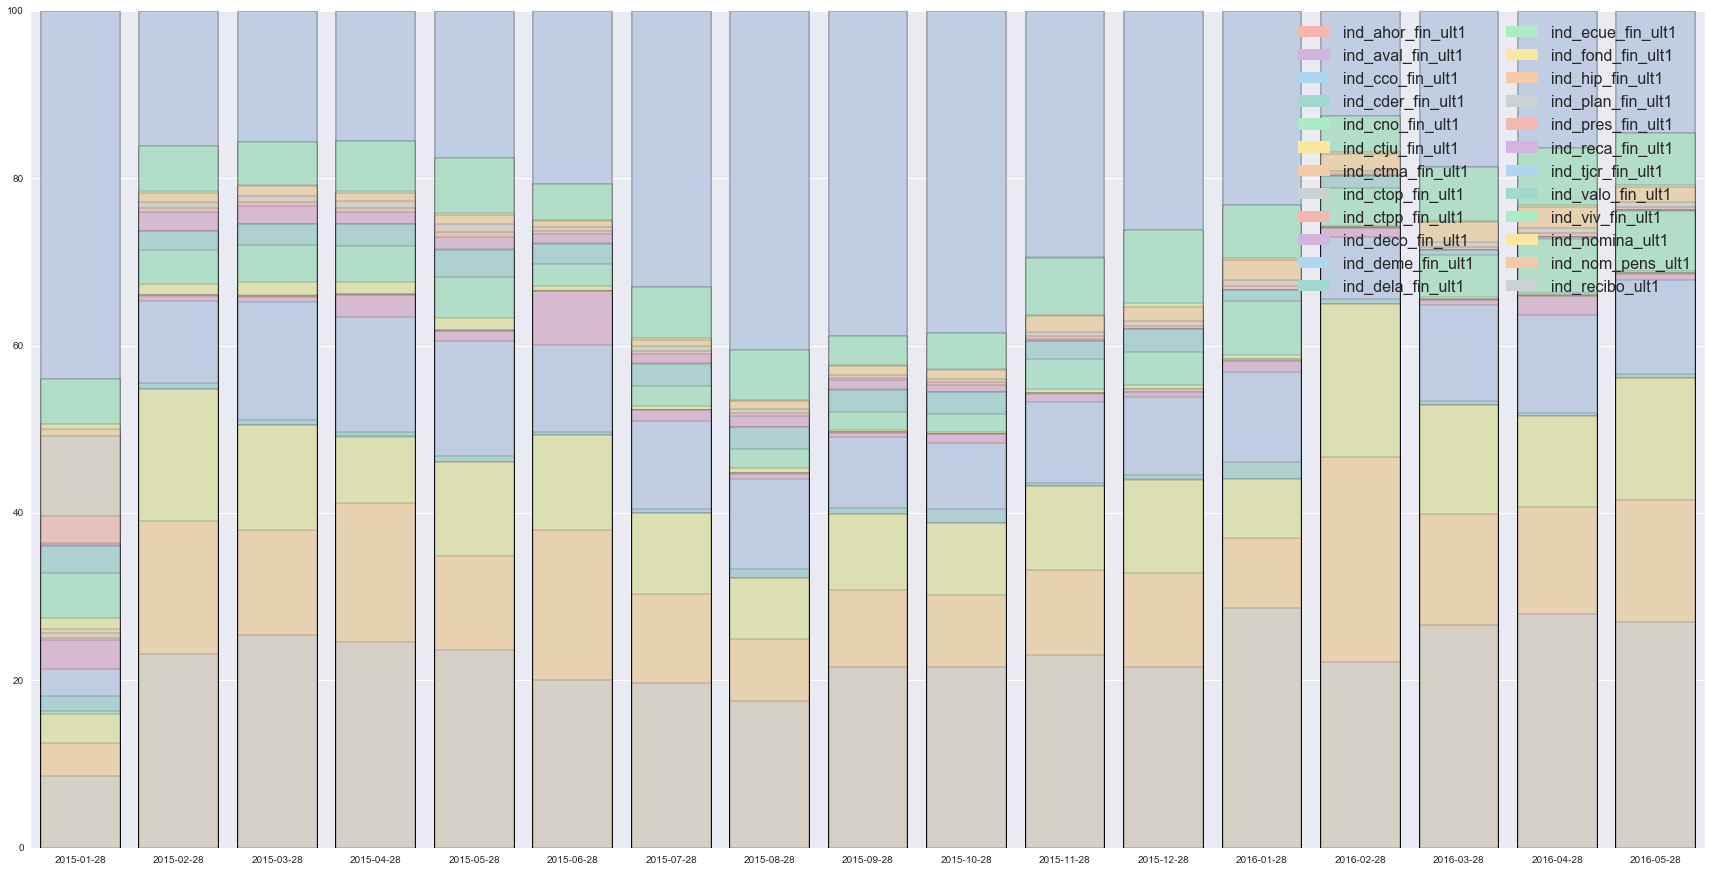

In [60]:
# plot stacked barplot of month vs labels in percentage
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0))) * 100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color = color_list[i%8], alpha=0.7)
    
plt.legend([plt.Rectangle((0,0),1,1,fc=color_list[i%8], edgecolor = 'none') for i in range(len(label_cols))], \
           label_cols, loc=1, ncol = 2, prop={'size':16})

# Trim data

##### Use Jun 2015 Data only
    - less data       == less information
    - less noise data == better information
    
    To Do:
        - clean NAs and strings
        - convert into single target column
        - save as train.csv

In [61]:
# use only June 2015 data
june_only = labels[labels.date == '2015-06-28'].iloc[:,:24]
june_only['add'] = june_only.sum(axis=1)
print(sum(june_only['add'] > 0)) # this must be 36k

36673


In [62]:
target_cols = ['ind_ahor_fin_ult1', 'ind_aval_fin_ult1',
       'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1',
       'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
       'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1',
       'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
       'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1',
       'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
       'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1',
       'ind_recibo_ult1']

In [63]:
%%time
# load data
labels = pd.read_csv('../input/labels.csv').astype(int)
trn = pd.read_csv('../input/train_ver2.csv')
fecha_dato = trn['fecha_dato']

# get index
train_index = (labels[fecha_dato == '2015-06-28'].sum(axis=1) > 0)
train_index = train_index[train_index == True]

# trim train data and save
train = trn.ix[train_index.index]
train.iloc[:,24:] = labels.ix[train_index.index]

# melt data into single target dataframe
data = []
for ind, (run, row) in enumerate(train.iterrows()):
    for i in range(24):
        if row[24+i] == 1:
            temp = row[:24].values.tolist()
            temp.append(i)
            data.append(temp)
            
cols = trn.columns[:24].tolist()
cols.append('target')
train = pd.DataFrame(data, columns = cols)
train.to_csv('../input/train.csv',index=False)


<string>:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 2min 57s


In [64]:
%%time
# EDA ON Clean data
# load data
trn = pd.read_csv('../input/train.csv')

# check column names
print('='*50)
print('trn.columns:\n',trn.columns)

# check head
print('='*50)
print('trn.head():\n', trn.head())

# check overall stat
print('='*50)
print('trn.info():\n',trn.info())


trn.columns:
 Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento', 'target'],
      dtype='object')
trn.head():
    fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  fecha_alta  \
0  2015-06-28   1063111            N              ES    V   28  2012-09-19   
1  2015-06-28   1063111            N              ES    V   28  2012-09-19   
2  2015-06-28   1063273            N              ES    V   37  2012-09-19   
3  2015-06-28   1063273            N              ES    V   37  2012-09-19   
4  2015-06-28   1063250            N              ES    H   40  2012-09-19   

   ind_nuevo antiguedad  indrel   ...   conyuemp  canal_entrada indfall  \
0        0.0         34     1.0   ...        

<string>:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.


In [65]:
# clean data

for col in trn.columns:
    print(col, np.unique(trn[col].astype(str)))

fecha_dato ['2015-06-28']
ncodpers ['1000045' '1000058' '1000065' ..., '999907' '999910' '99997']
ind_empleado ['A' 'B' 'F' 'N' 'nan']
pais_residencia ['AD' 'AR' 'AT' 'AU' 'BE' 'BR' 'CH' 'CL' 'CO' 'DE' 'DO' 'ES' 'FI' 'FR' 'GA'
 'GB' 'GQ' 'GR' 'IT' 'MA' 'MX' 'NG' 'NL' 'OM' 'PA' 'PE' 'PL' 'PT' 'SG' 'US'
 'VE' 'nan']
sexo ['H' 'V' 'nan']
age ['  2' '  3' '  4' '  5' '  6' '  8' '  9' ' 10' ' 11' ' 12' ' 13' ' 14'
 ' 15' ' 16' ' 17' ' 18' ' 19' ' 20' ' 21' ' 22' ' 23' ' 24' ' 25' ' 26'
 ' 27' ' 28' ' 29' ' 30' ' 31' ' 32' ' 33' ' 34' ' 35' ' 36' ' 37' ' 38'
 ' 39' ' 40' ' 41' ' 42' ' 43' ' 44' ' 45' ' 46' ' 47' ' 48' ' 49' ' 50'
 ' 51' ' 52' ' 53' ' 54' ' 55' ' 56' ' 57' ' 58' ' 59' ' 60' ' 61' ' 62'
 ' 63' ' 64' ' 65' ' 66' ' 67' ' 68' ' 69' ' 70' ' 71' ' 72' ' 73' ' 74'
 ' 75' ' 76' ' 77' ' 78' ' 79' ' 80' ' 81' ' 82' ' 83' ' 84' ' 85' ' 86'
 ' 87' ' 88' ' 89' ' 90' ' 91' ' 92' ' 93' ' 94' ' 95' ' 96' ' 97' ' 98'
 ' NA' '100' '101' '110' '113' '116']
fecha_alta ['1995-01-16' '1995-02-06'

In [66]:
%%time
# load data
trn = pd.read_csv('../input/train.csv').drop(['target', 'tipodom'], axis=1)
tst = pd.read_csv('../input/test_ver2.csv').drop(['tipodom'], axis=1)

# clean NAs
col = 'ind_empleado'
trn[col].fillna('NN',inplace=True)

col = 'pais_residencia'
trn[col].fillna('NN',inplace=True)

col = 'sexo'
trn[col].fillna('NN',inplace=True)
tst[col].fillna('NN',inplace=True)

col = 'age'
trn[col].replace(' NA', 0, inplace=True)
trn[col] = trn[col].astype(np.int64)

col = 'fecha_alta'
trn[col].fillna('2015-06-30',inplace=True)

col = 'ind_nuevo'
trn[col].fillna(-1,inplace=True)
trn[col] = trn[col].astype(int)

col = 'antiguedad'
trn[col].replace('     NA', 0, inplace=True)
trn[col] = trn[col].astype(np.int64)
tst[col].replace(-999999, 0, inplace=True)

col = 'indrel'
trn[col].fillna(0, inplace=True)
trn[col].replace(99,2, inplace=True)
trn[col] = trn[col].astype(int)
tst[col].replace(99,2, inplace=True)

col = 'ult_fec_cli_1t'
trn[col].fillna('2015-06-30', inplace=True)
tst[col].fillna('2016-05-30', inplace=True)

col = 'indrel_1mes'
trn[col].fillna(2, inplace=True)
tst[col].fillna(2, inplace=True)
trn[col] = trn[col].astype(int)
tst[col] = tst[col].astype(int)

col = 'tiprel_1mes'
trn[col].fillna('NN', inplace=True)
tst[col].fillna('NN', inplace=True)

col = 'indresi'
trn[col].fillna('NN', inplace=True)

col = 'indext'
trn[col].fillna('NN', inplace=True)

col = 'conyuemp'
trn[col].fillna('NN', inplace=True)
tst[col].fillna('NN', inplace=True)

col = 'canal_entrada'
trn[col].fillna('NN', inplace=True)
tst[col].fillna('NN', inplace=True)

col = 'indfall'
trn[col].fillna('NN', inplace=True)

col = 'tipodom'
# drop tipodom, tst has only one unique value

col = 'cod_prov'
trn[col].fillna(0, inplace=True)
tst[col].fillna(0, inplace=True)
trn[col] = trn[col].astype(int)
tst[col] = tst[col].astype(int)

col = 'nomprov'
trn[col].fillna('NN', inplace=True)
tst[col].fillna('NN', inplace=True)
trn[col].replace('CORU\xc3\x91A, A','CORU',inplace=True)
tst[col].replace('CORU\xc3\x91A, A','CORU',inplace=True)

col = 'ind_actividad_cliente'
trn[col].fillna(-1, inplace=True)
trn[col] = trn[col].astype(int)

col = 'renta'
trn[col].fillna(0, inplace=True)
tst[col].replace('         NA', 0, inplace=True)
tst[col] = tst[col].astype(np.float64)

col = 'segmento'
trn[col].fillna('NN', inplace=True)
tst[col].fillna('NN', inplace=True)

# save
trn.to_csv('../input/train_clean.csv',index=False)
tst.to_csv('../input/test_clean.csv', index=False)


<string>:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.


Wall time: 19.7 s


col :  fecha_dato


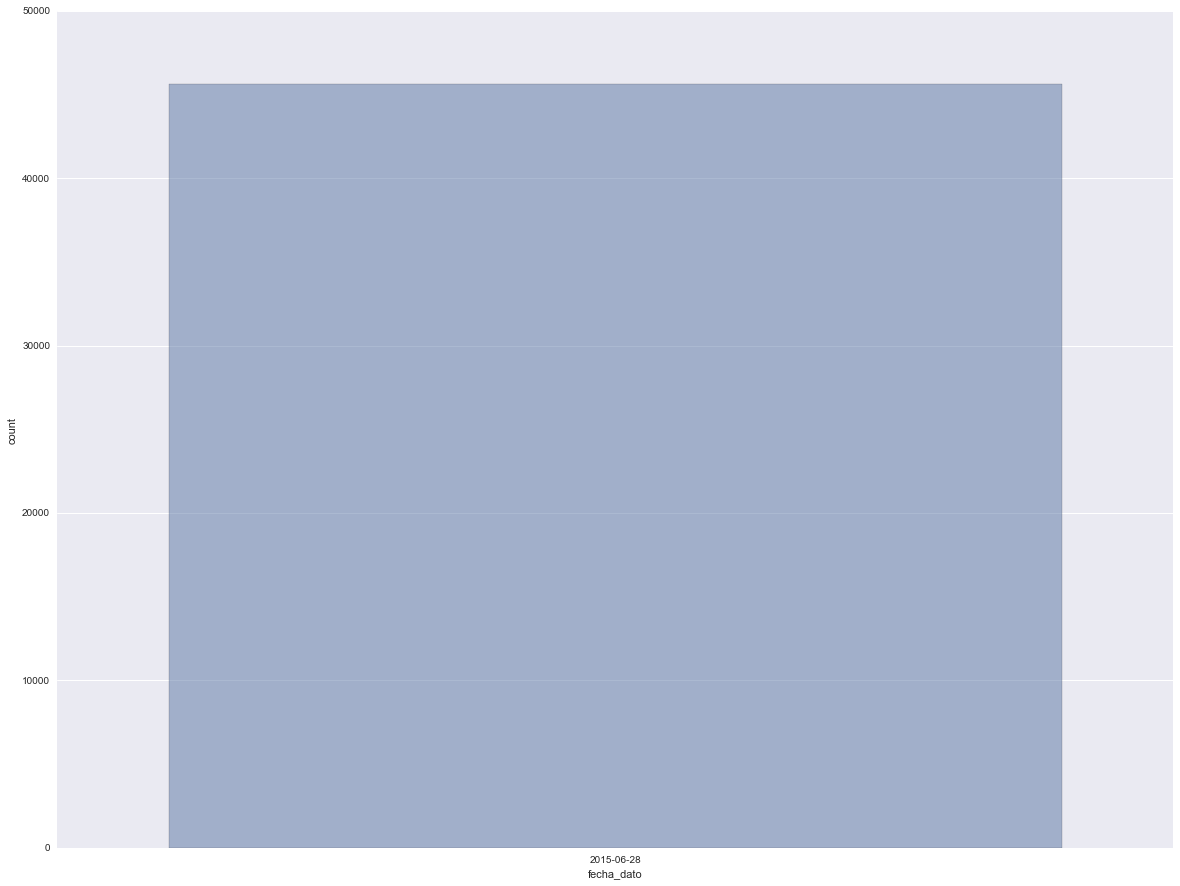

col :  ind_empleado


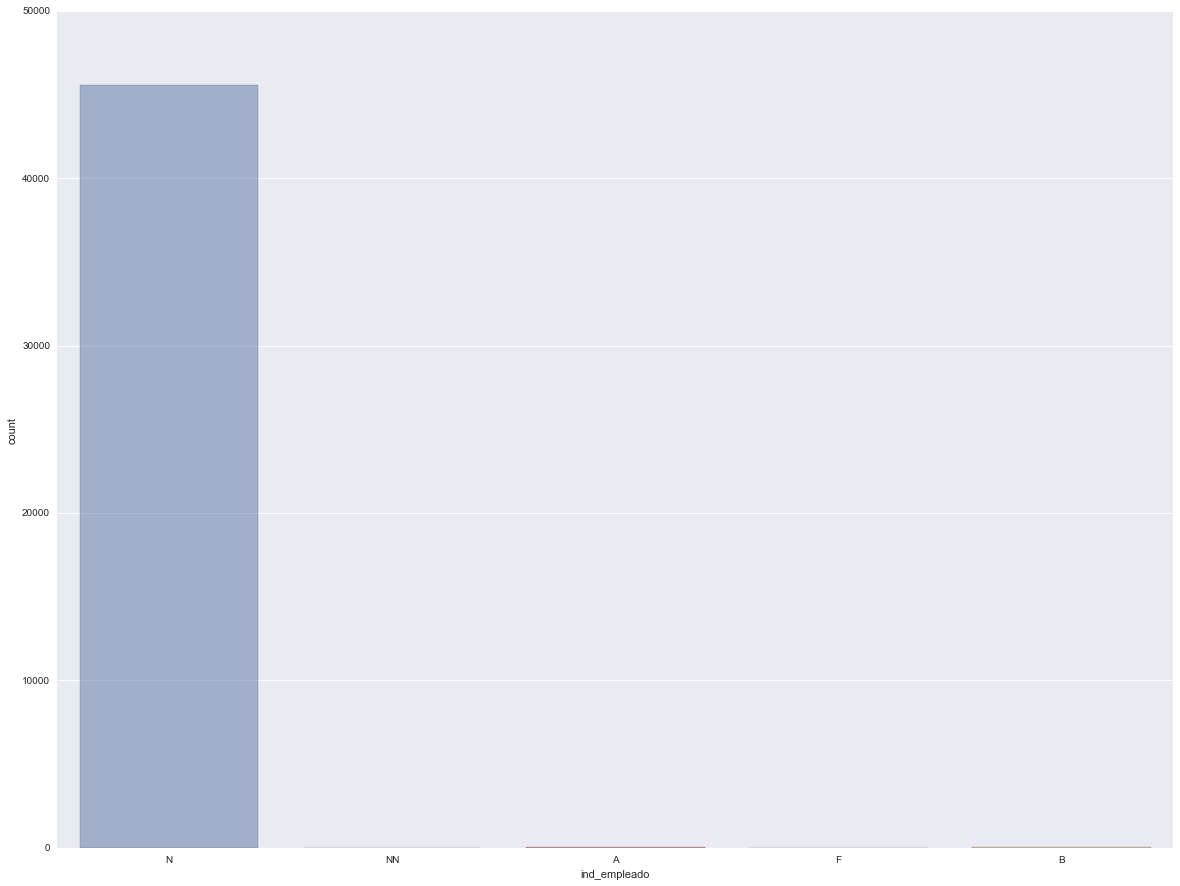

col :  pais_residencia


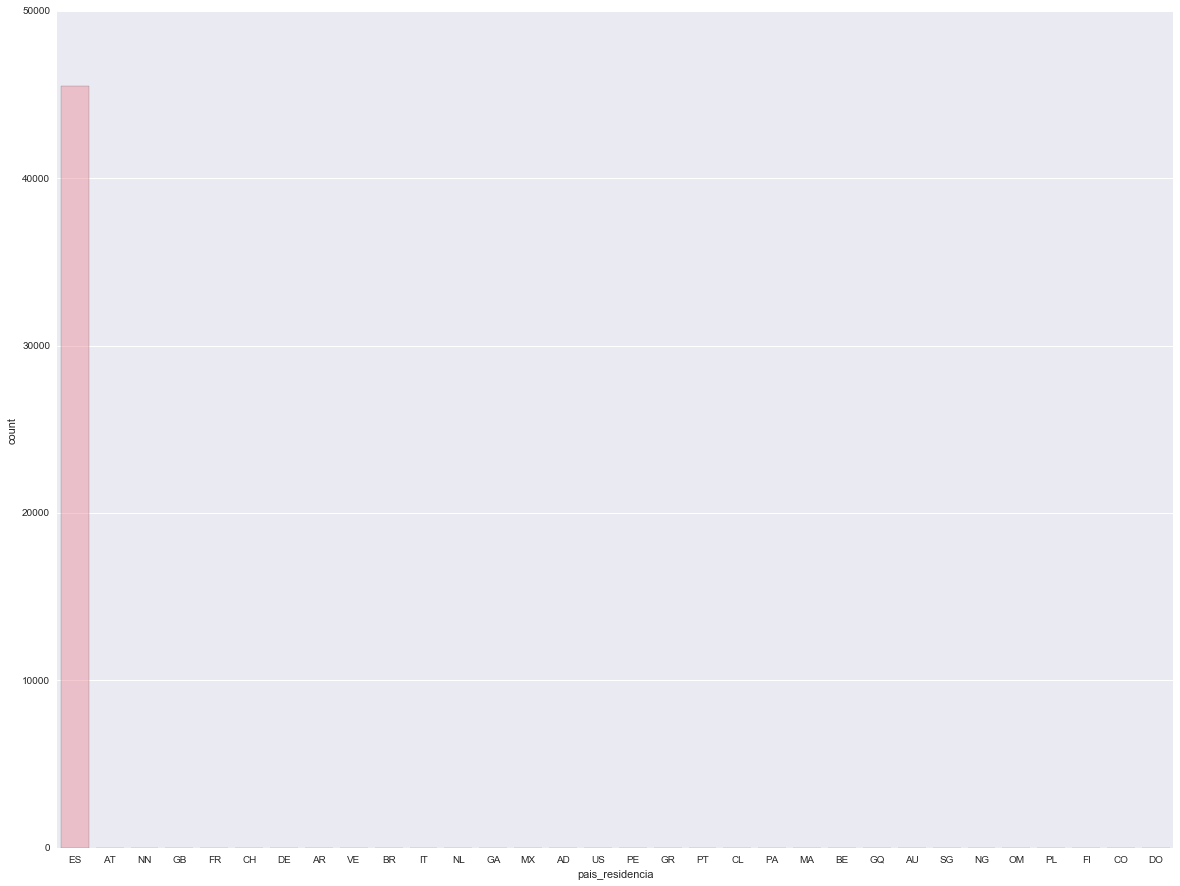

col :  sexo


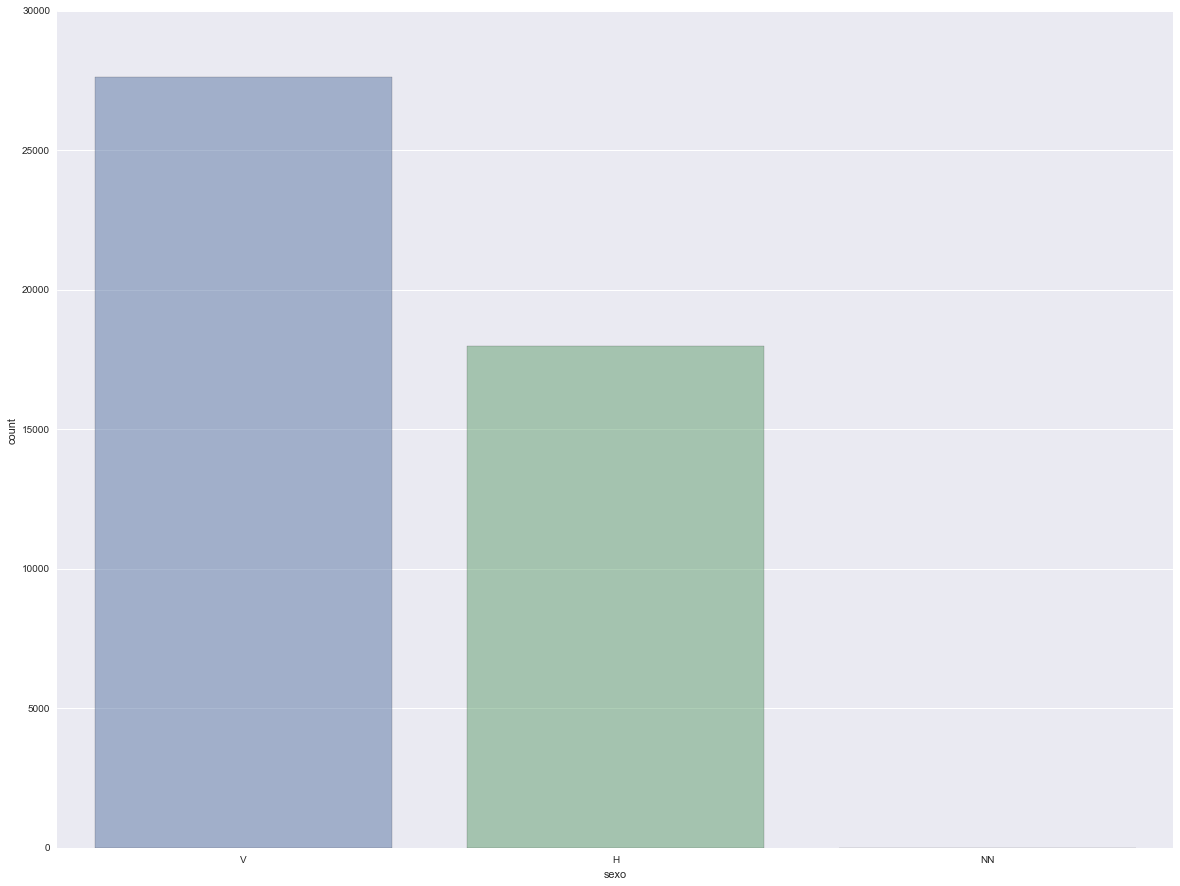

col :  age


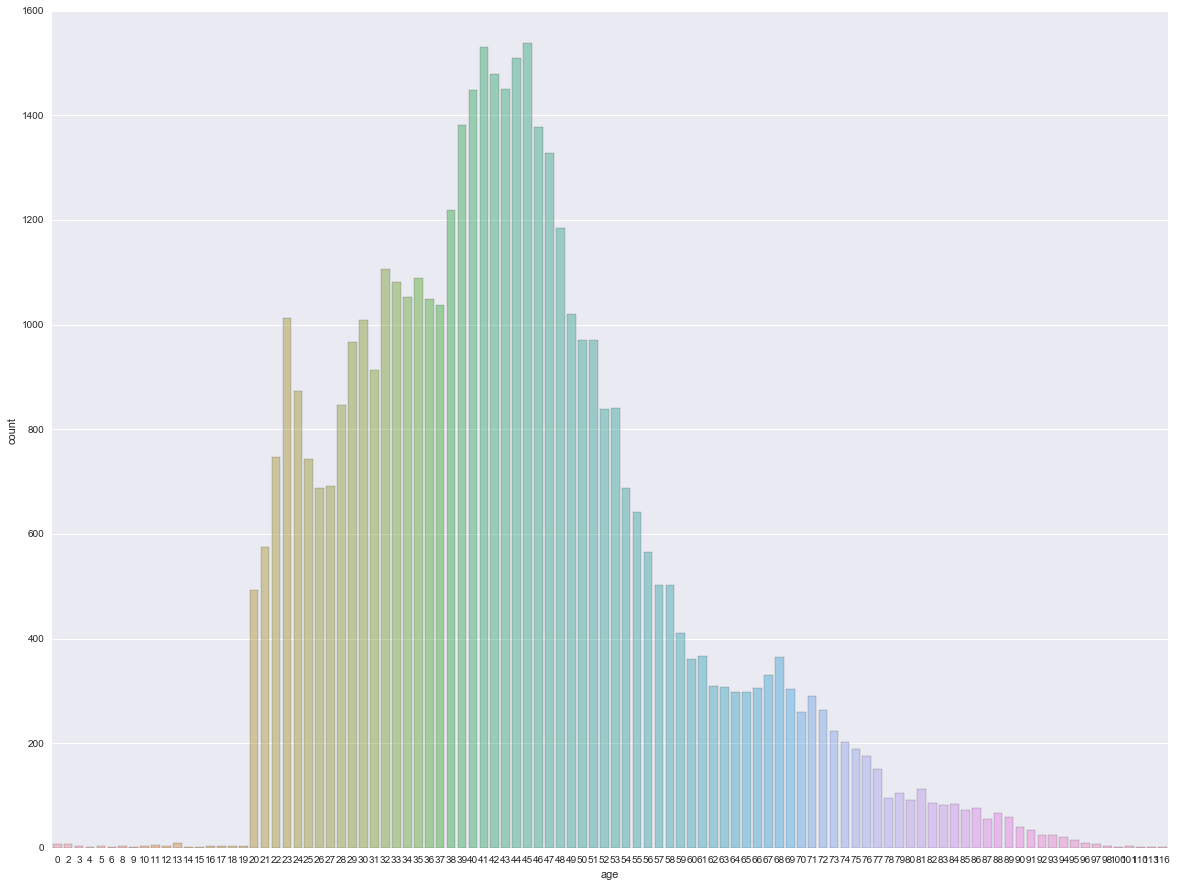

col :  fecha_alta


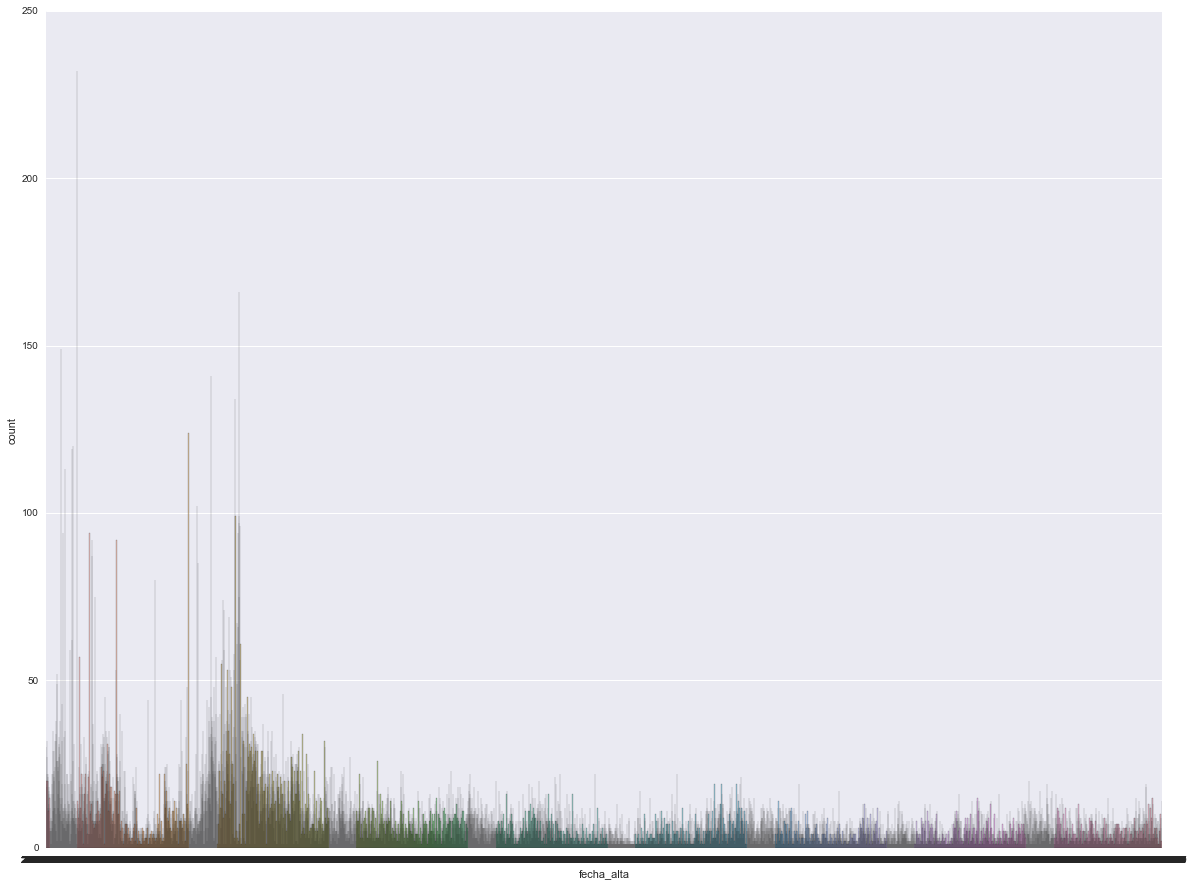

col :  ind_nuevo


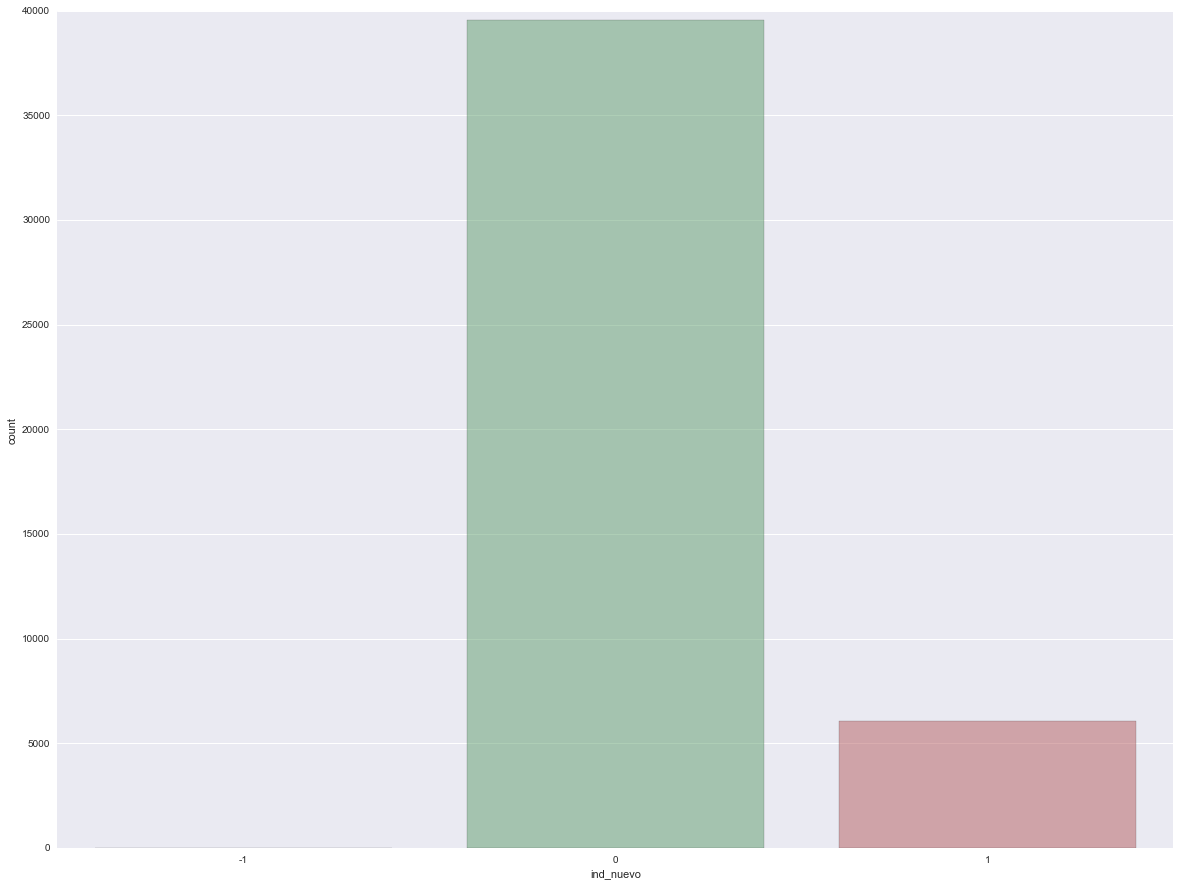

col :  antiguedad


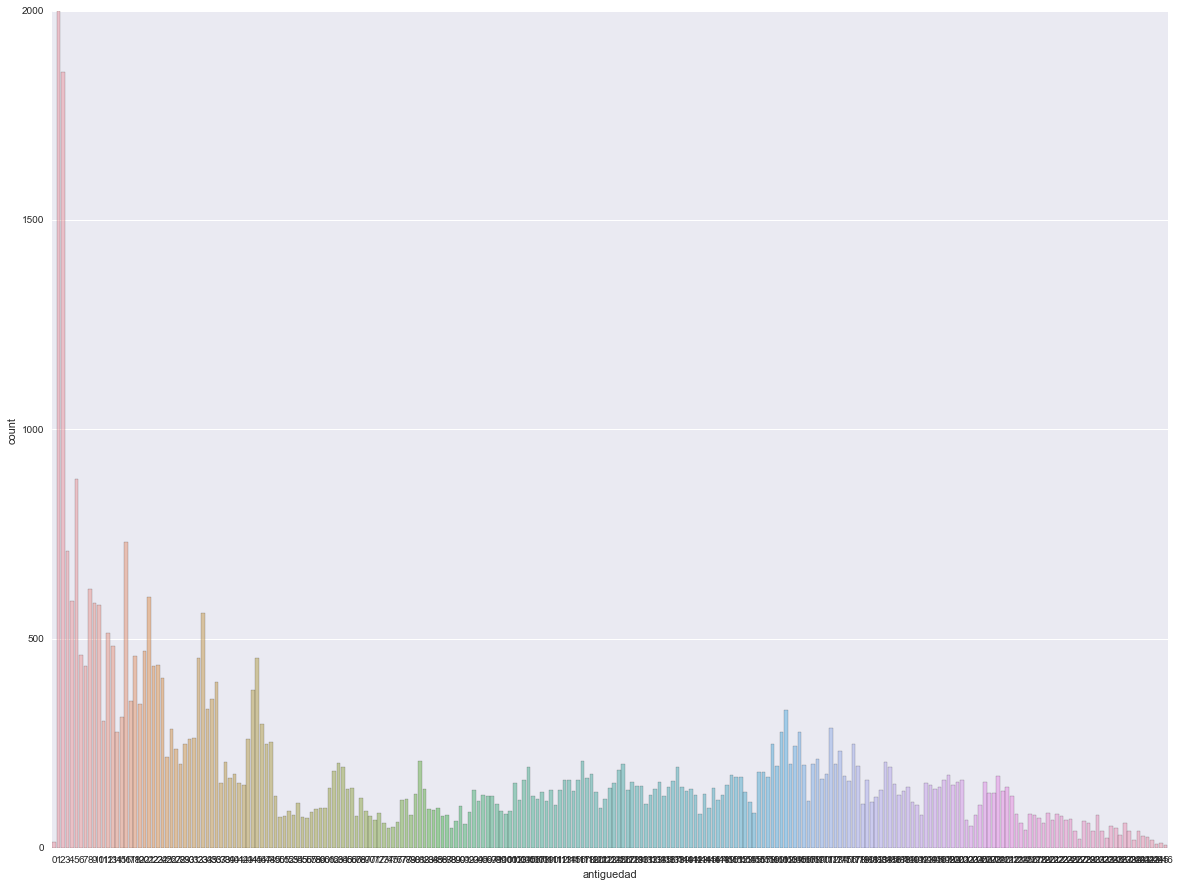

col :  indrel


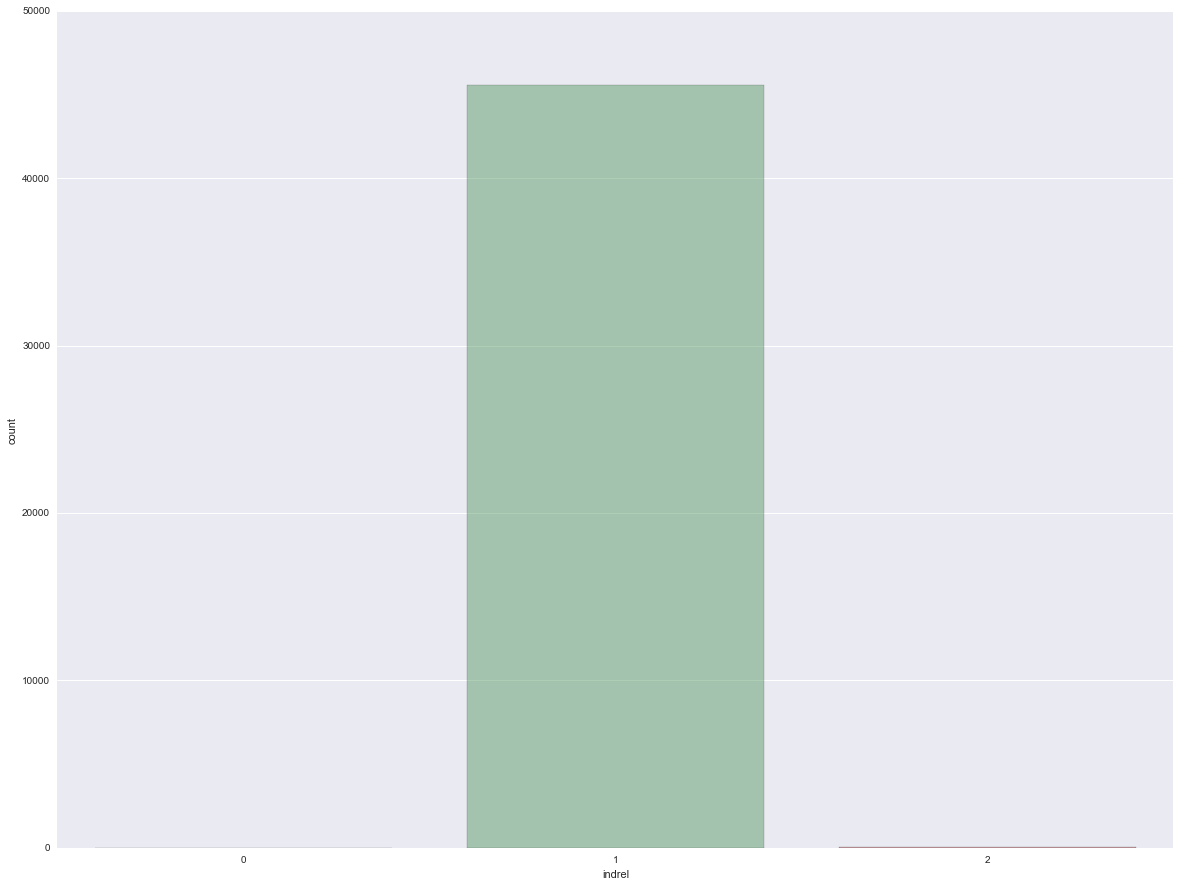

col :  ult_fec_cli_1t


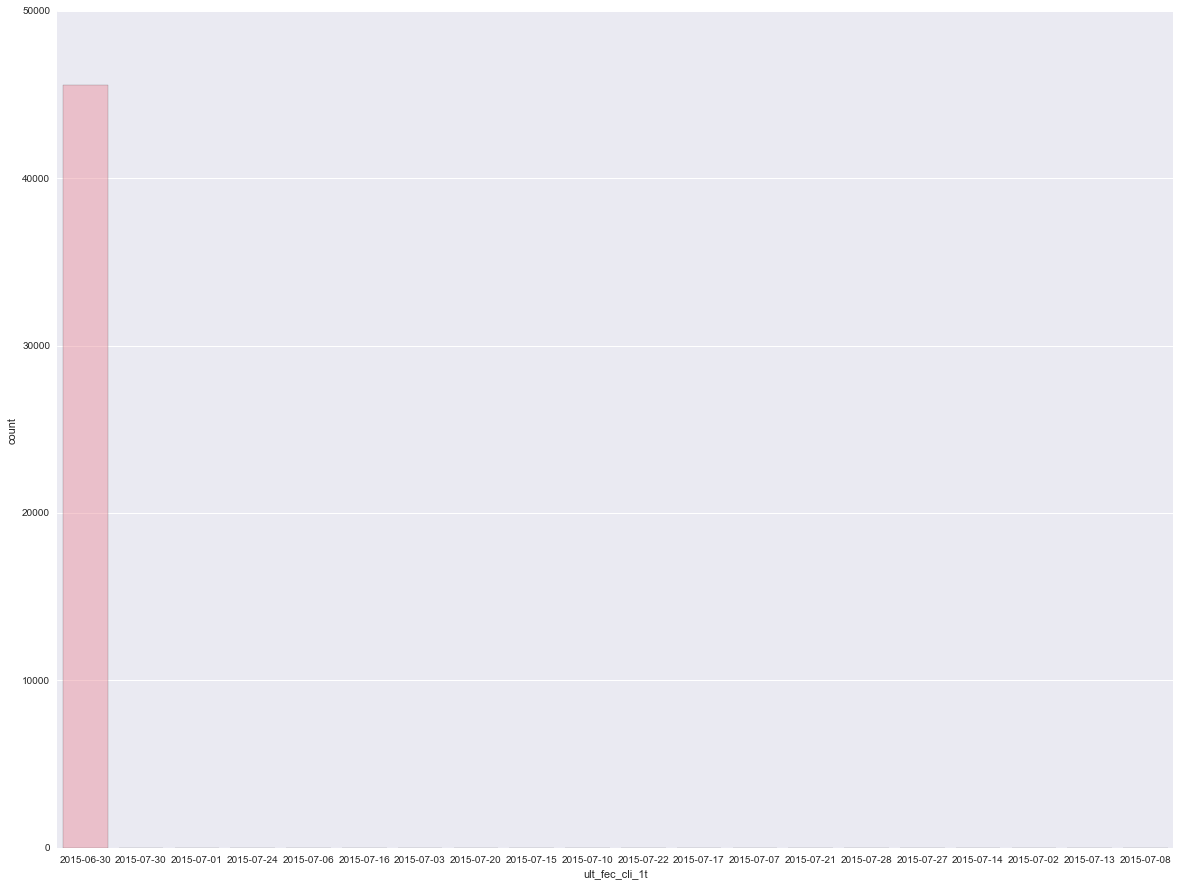

col :  indrel_1mes


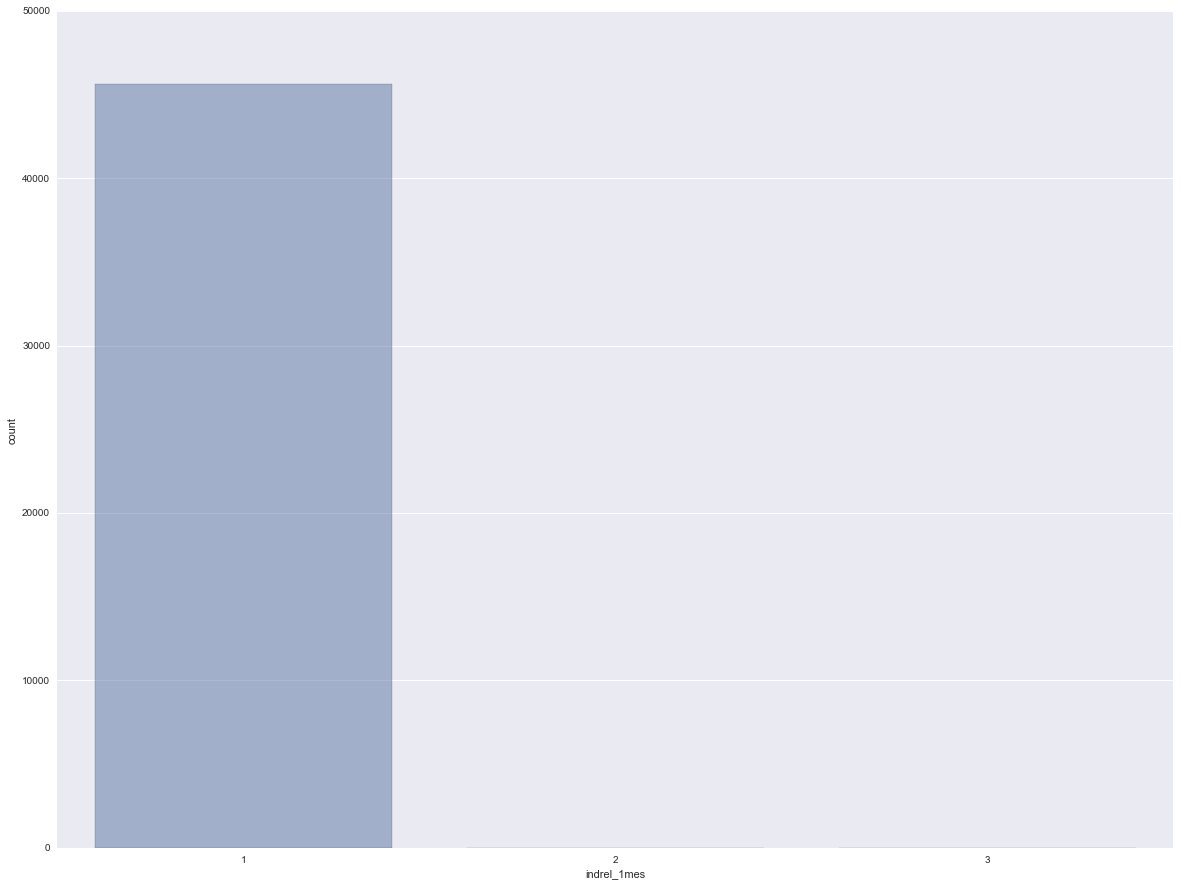

col :  tiprel_1mes


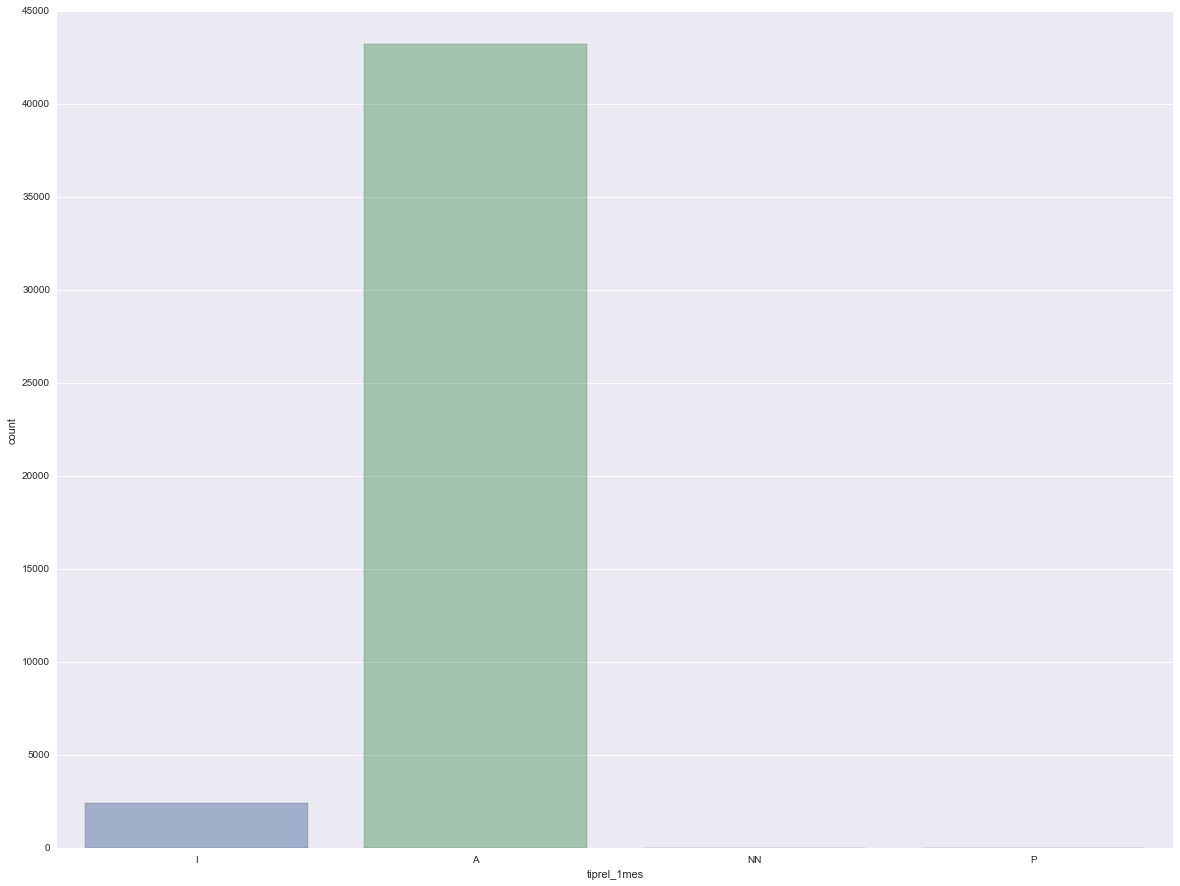

col :  indresi


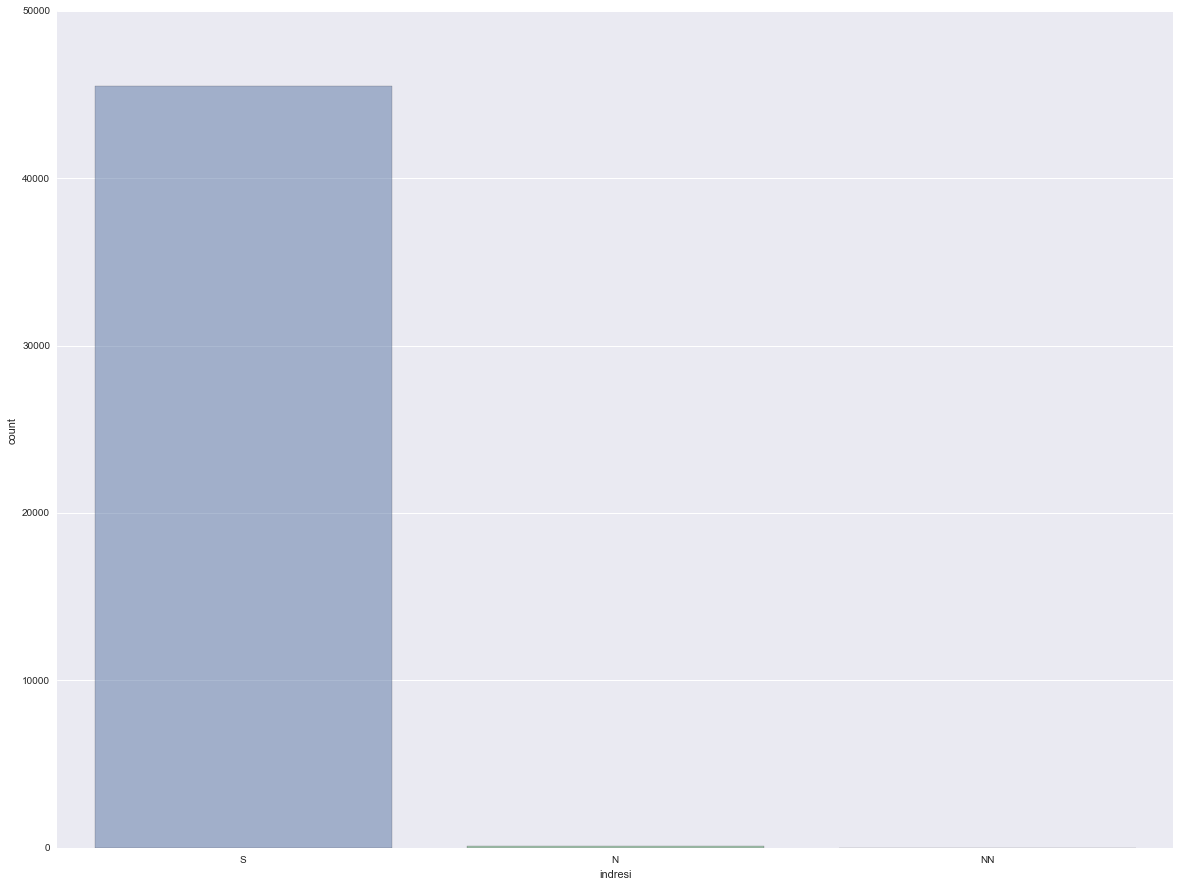

col :  indext


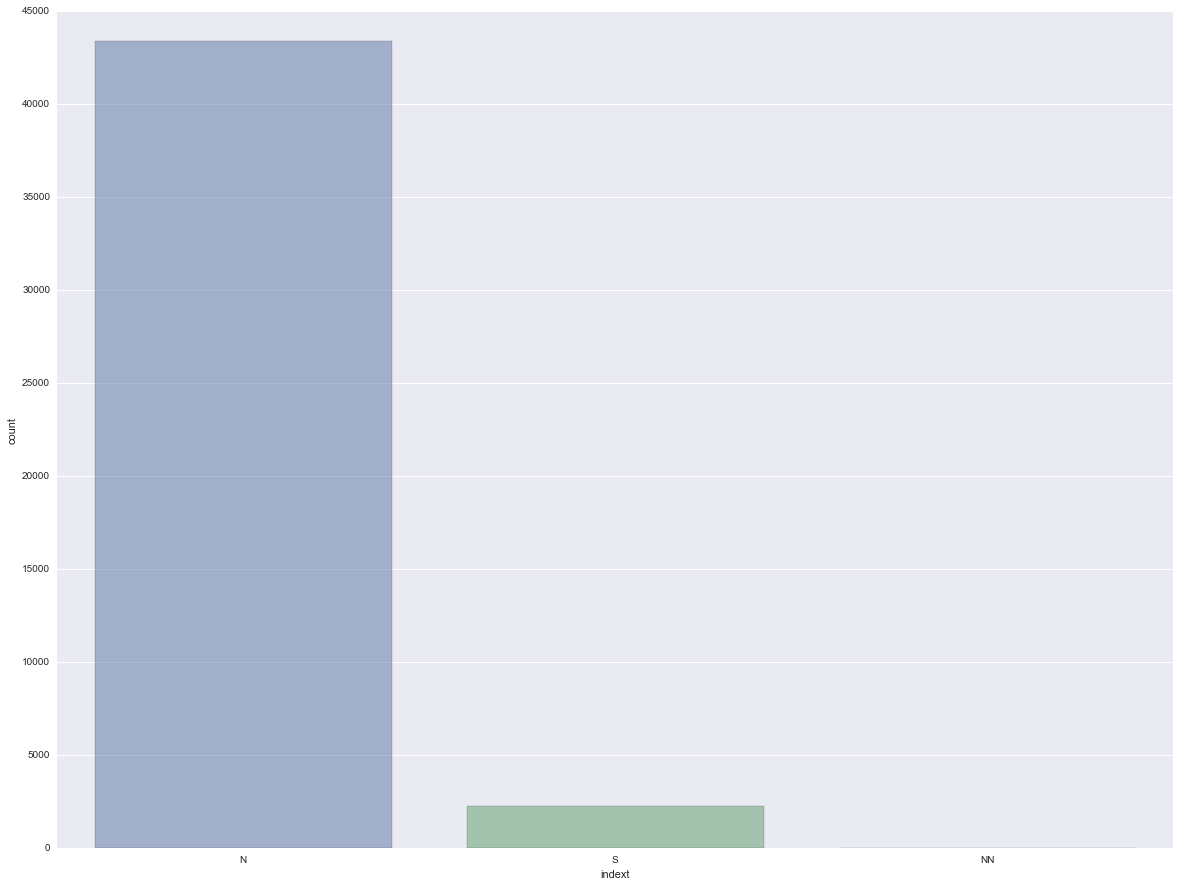

col :  conyuemp


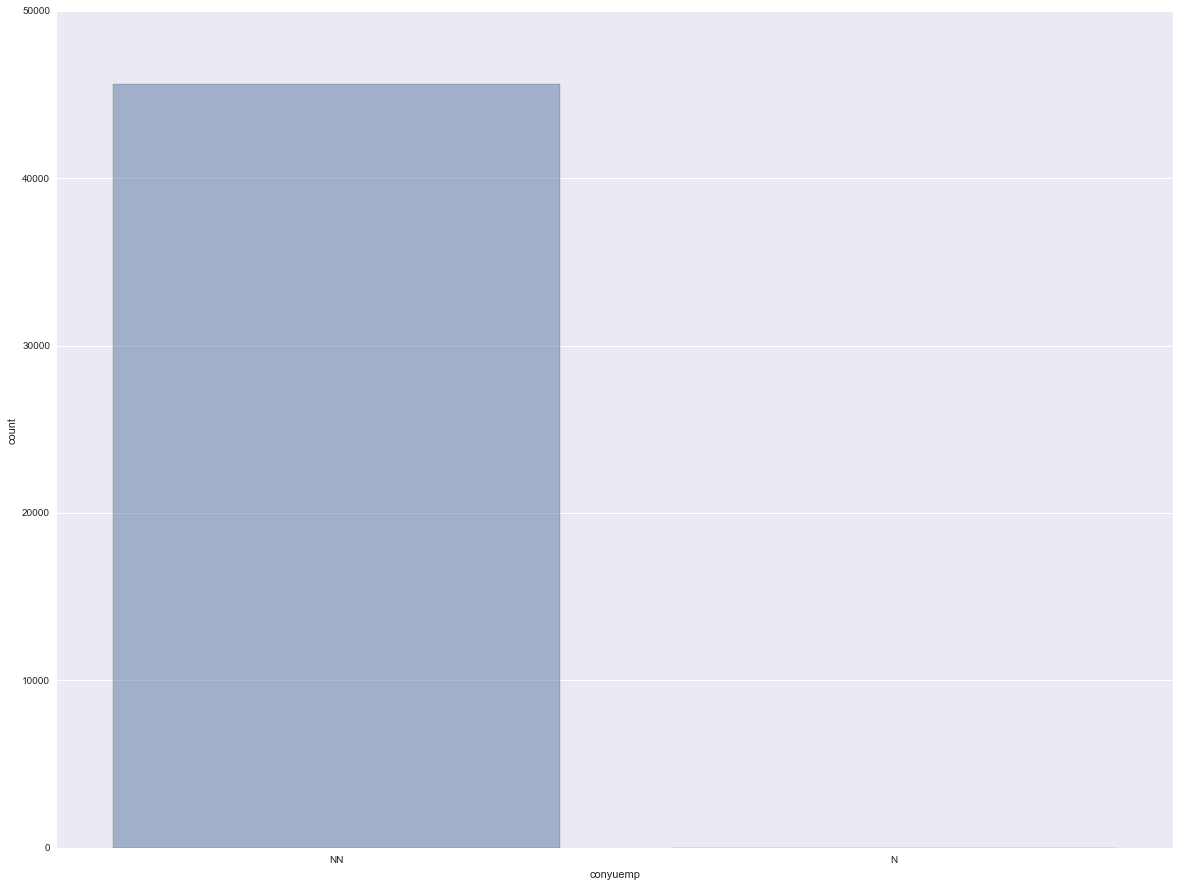

col :  canal_entrada


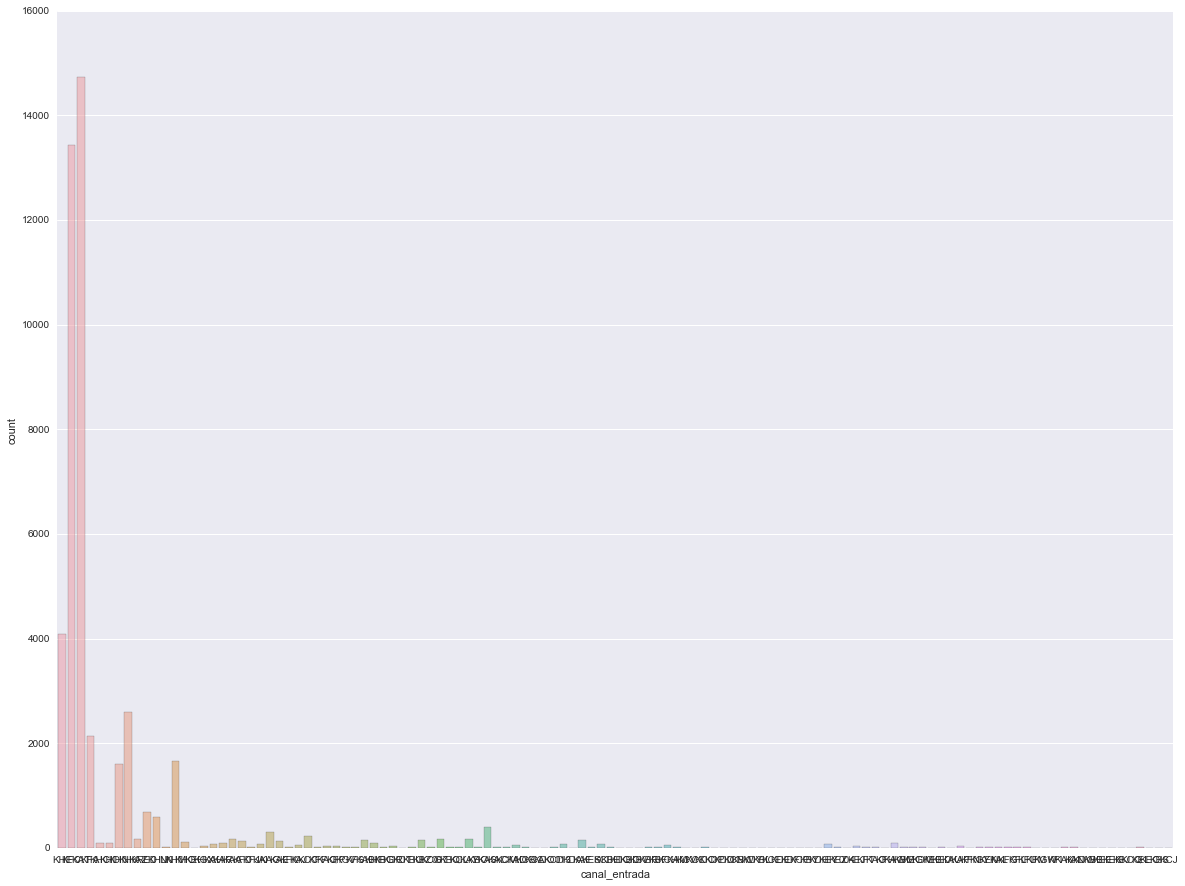

col :  indfall


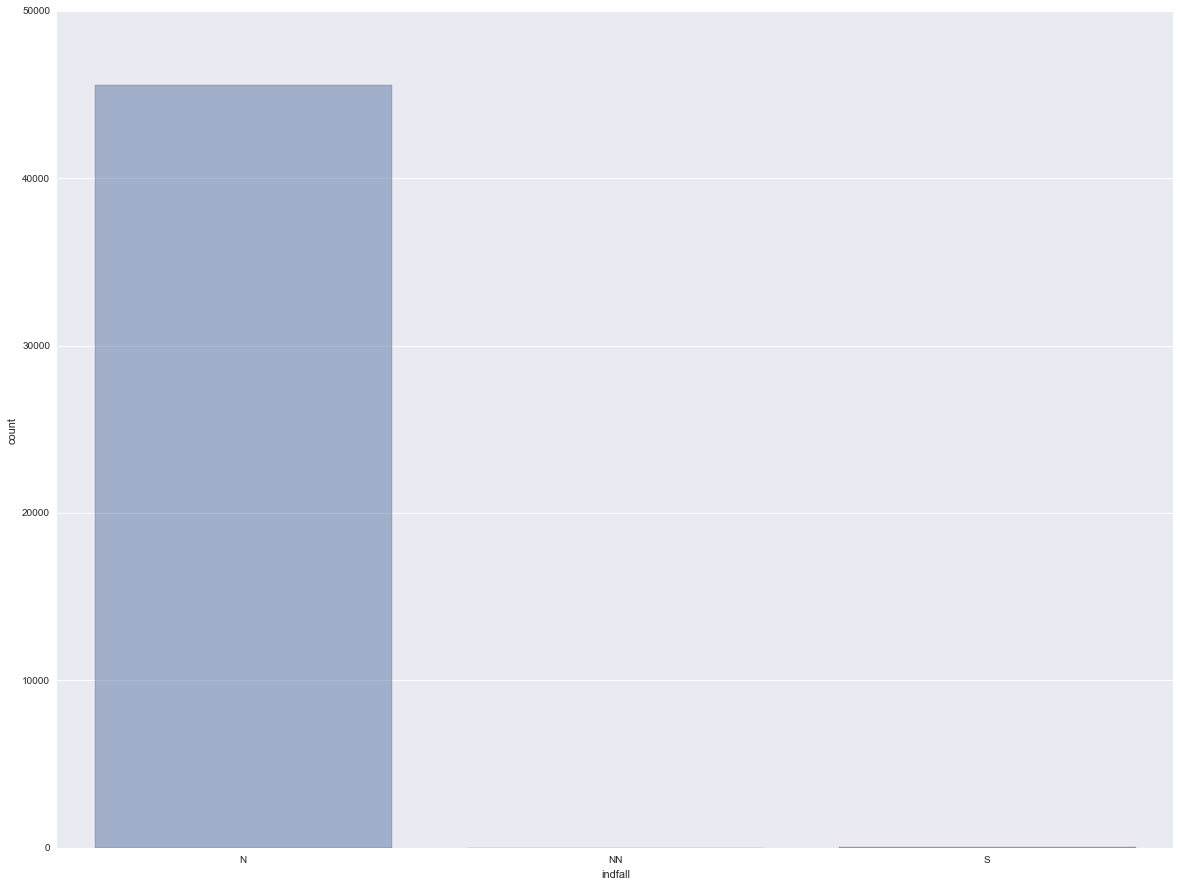

col :  cod_prov


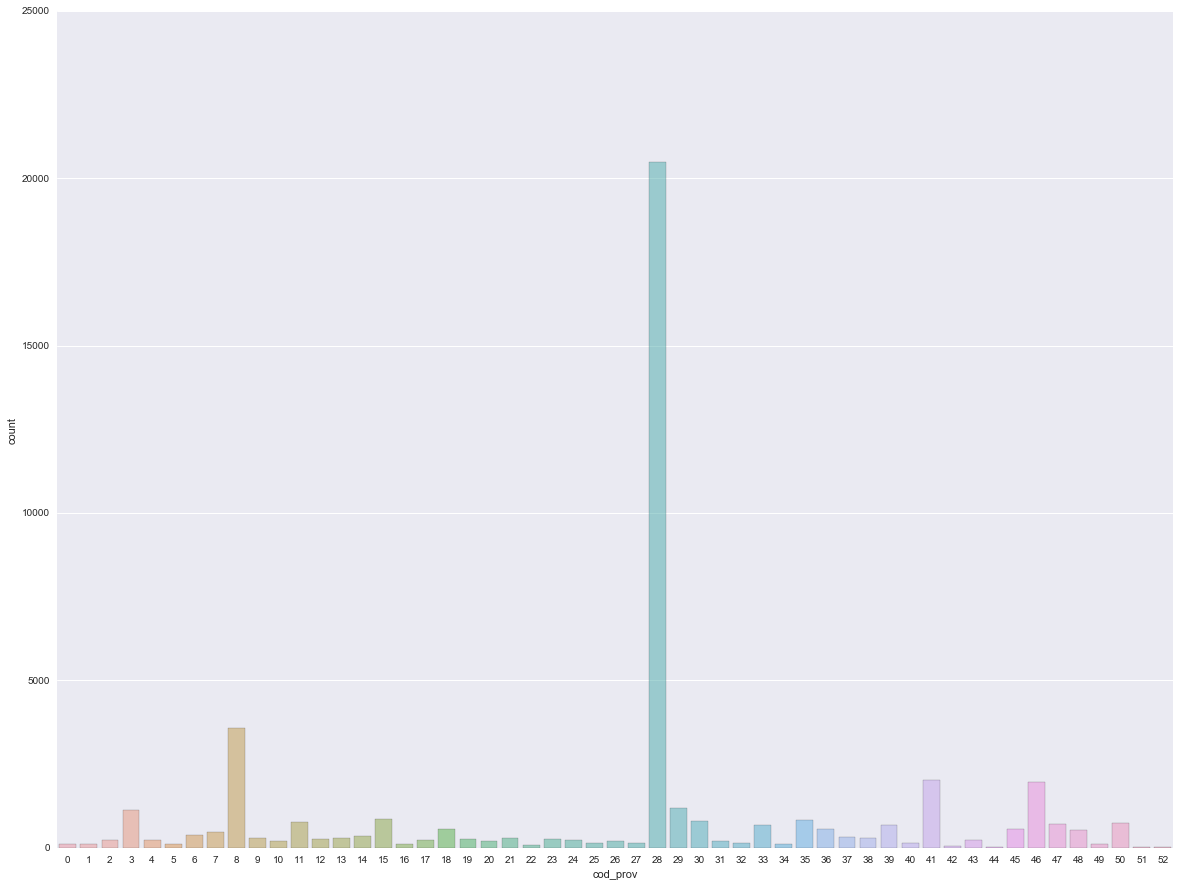

col :  nomprov


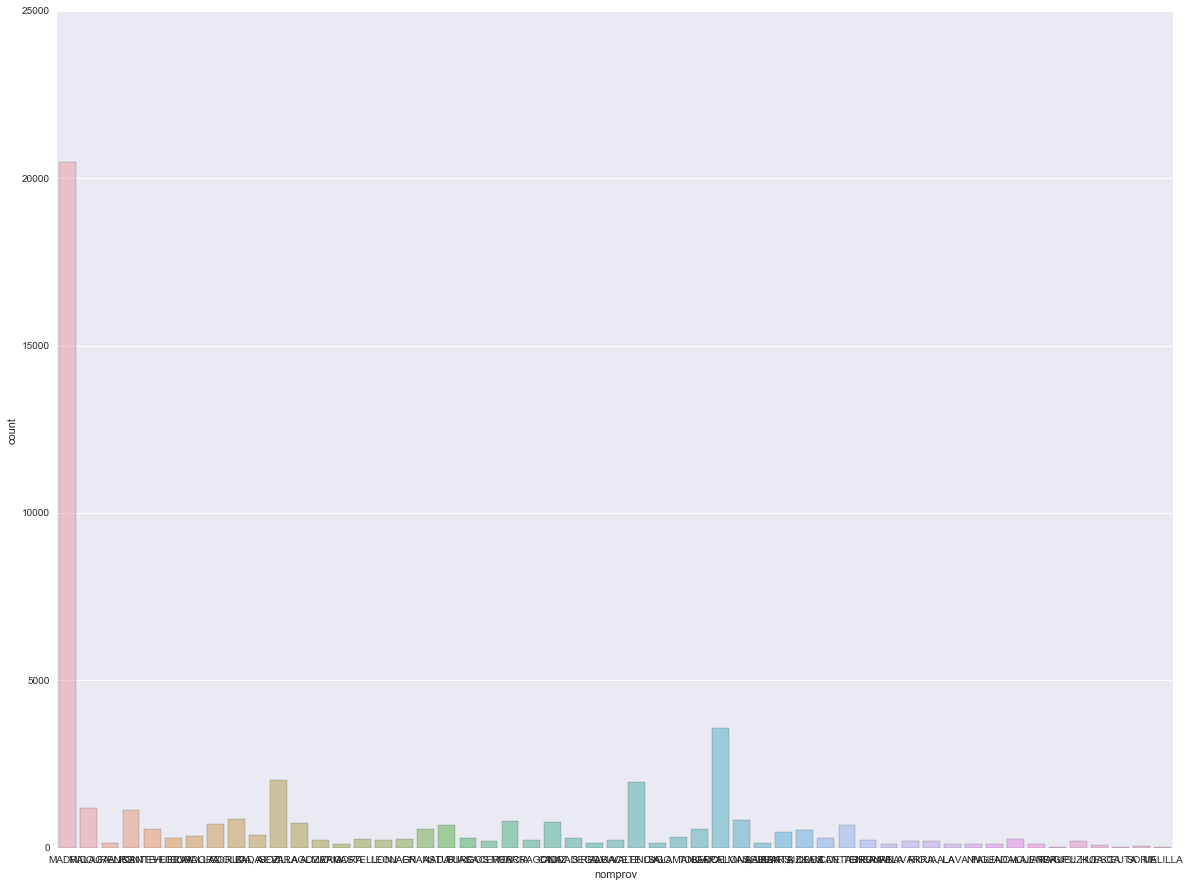

col :  ind_actividad_cliente


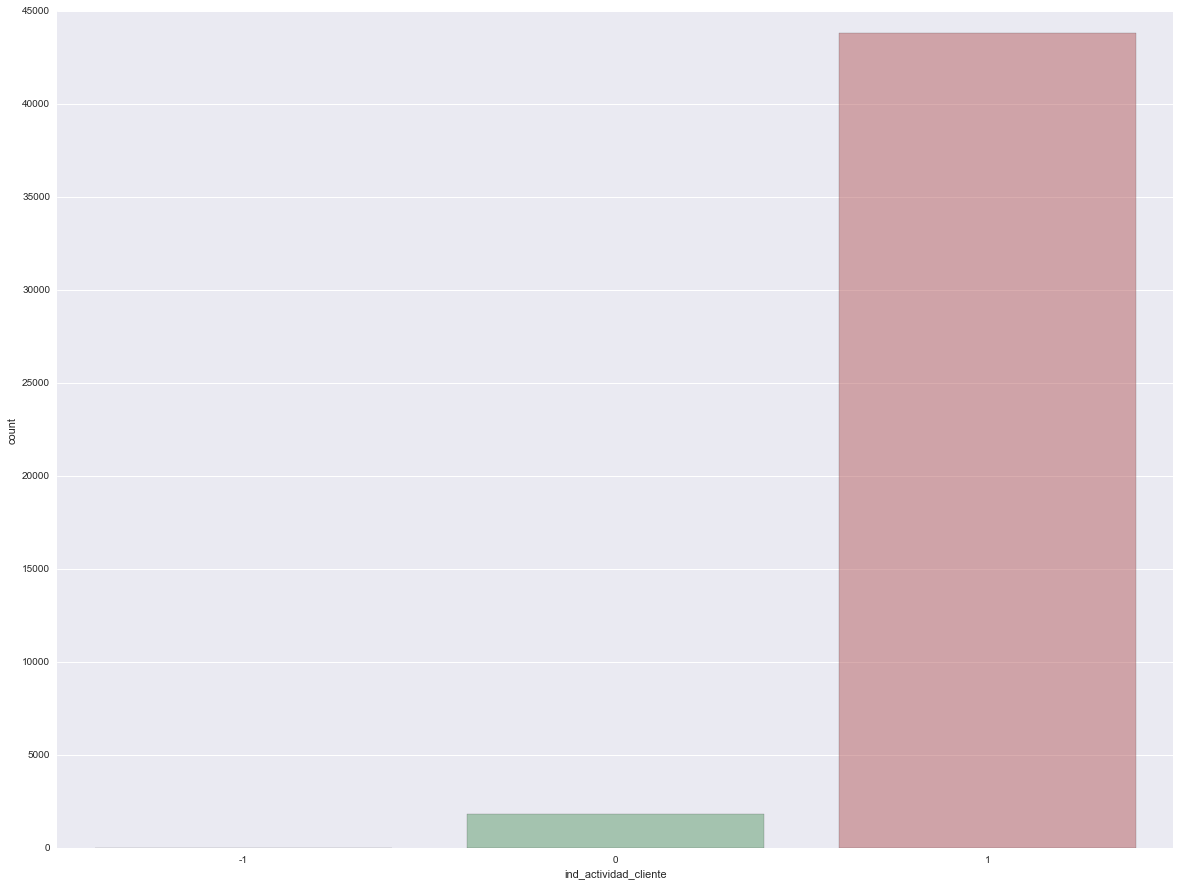

col :  renta


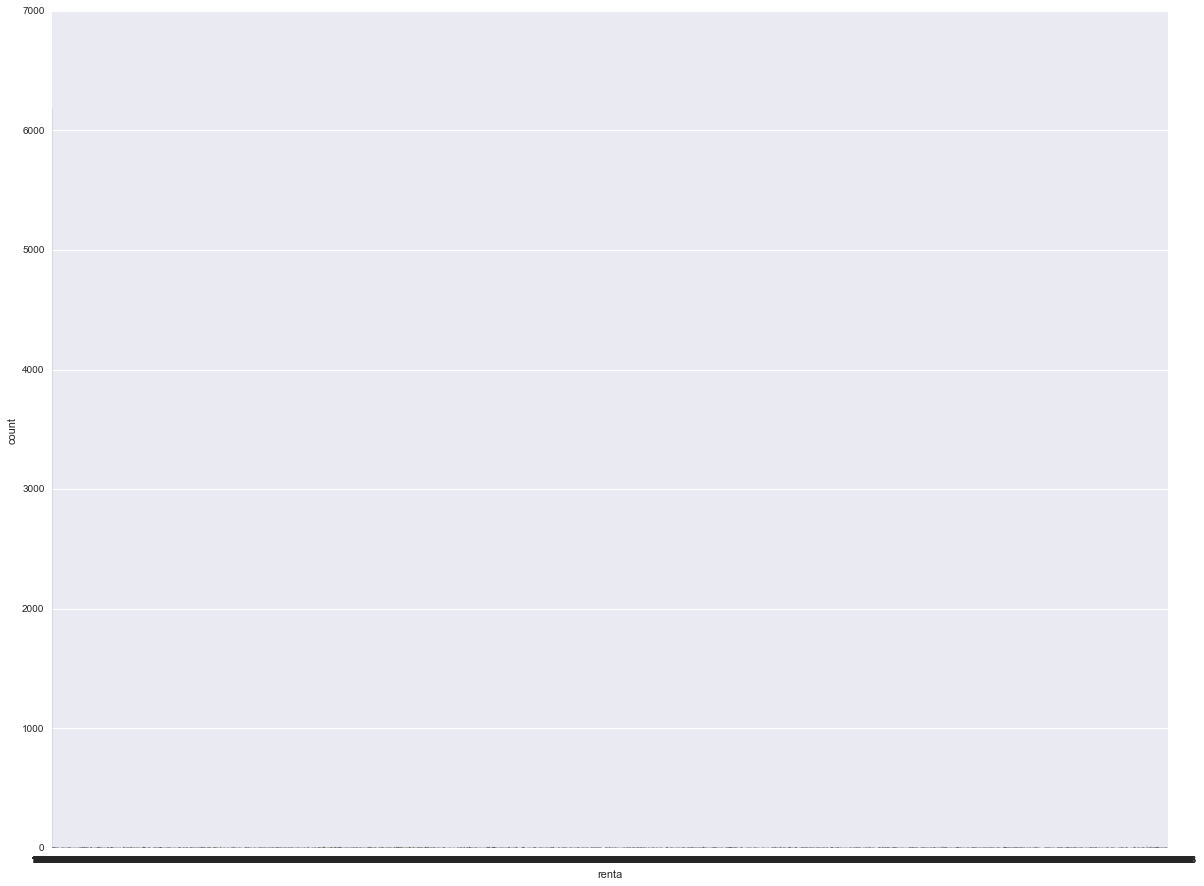

col :  segmento


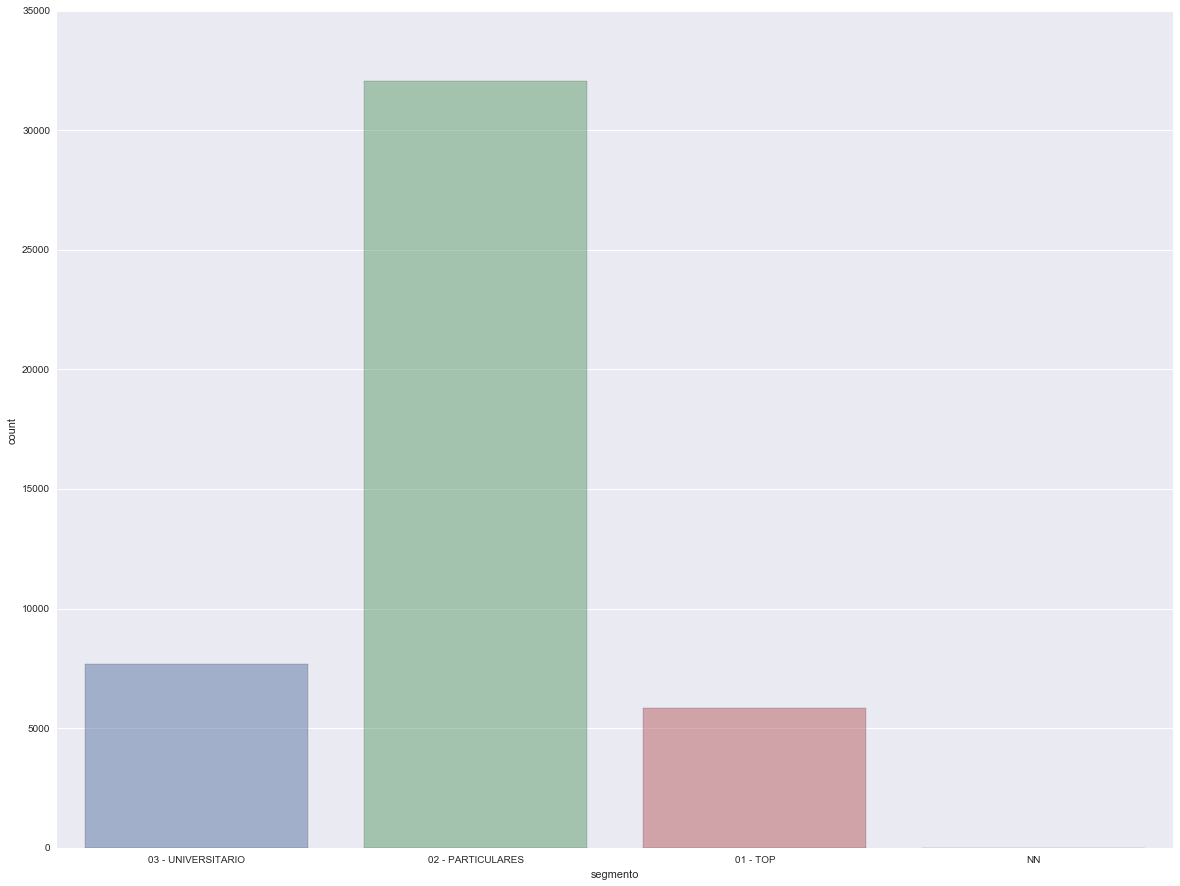

In [67]:
# histogram
skip_cols = ['ncodpers']
# histogram of features
for col in trn.columns:
    if col in skip_cols:
        continue
    print('='*50)
    print('col : ', col)
    f, ax = plt.subplots(figsize=(20, 15))
    sns.countplot(x=col, data=trn, alpha=0.5)
    plt.show()
    


In [68]:
%%time
# scatterplot
trn = pd.read_csv('../input/train_clean.csv')
tst = pd.read_csv('../input/test_clean.csv')
target = pd.read_csv('../input/train.csv', usecols=['target'])
trn['target'] = target


Wall time: 3.36 s


Wall time: 7.89 s


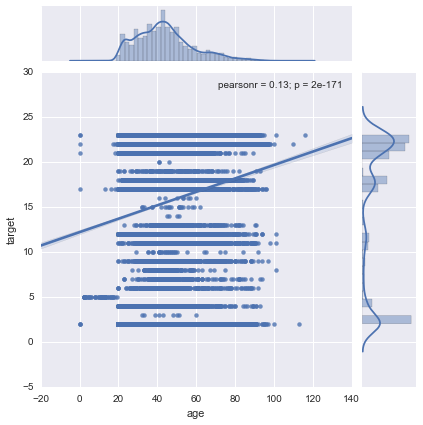

In [69]:
%%time
# three types of scatterplot
sns.jointplot('age', "target", data=trn, kind="reg")

Wall time: 492 ms


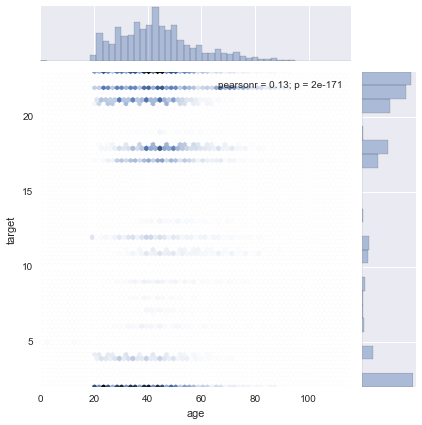

In [70]:
%%time
sns.jointplot('age', "target", data=trn, kind="hex")

Wall time: 1min 7s


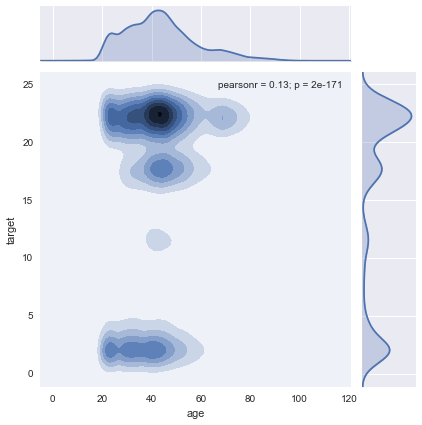

In [71]:
%%time
sns.jointplot('age', "target", data=trn, kind="kde")

In [72]:
category_cols = ['fecha_dato','ind_empleado','pais_residencia','sexo','fecha_alta','ult_fec_cli_1t',\
                 'tiprel_1mes','indresi','indext','conyuemp','canal_entrada','indfall','nomprov','segmento']

col :  ind_empleado


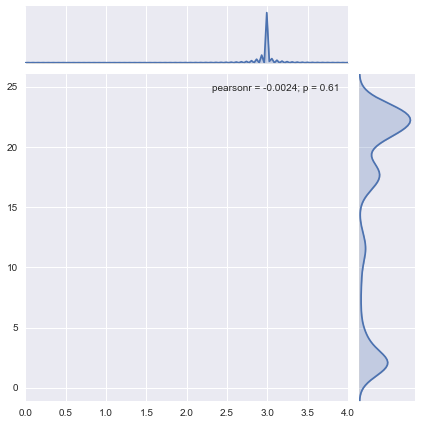

col :  pais_residencia


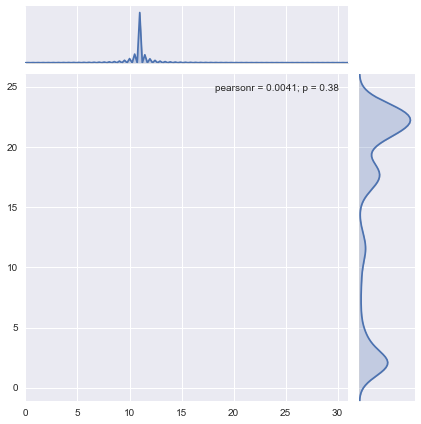

col :  sexo


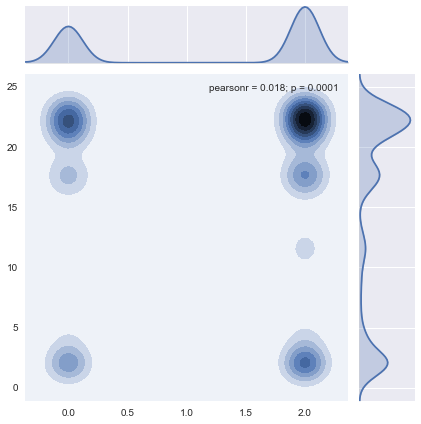

col :  age


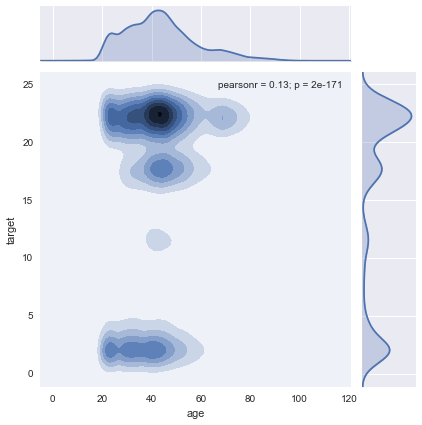

col :  fecha_alta


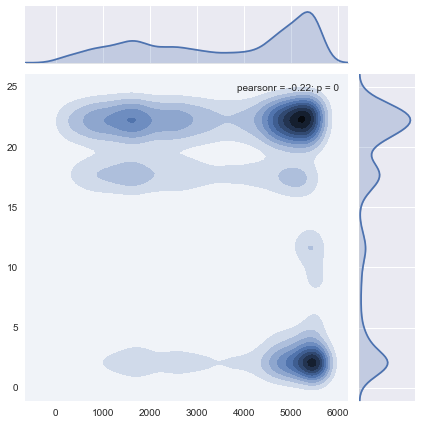

col :  ind_nuevo


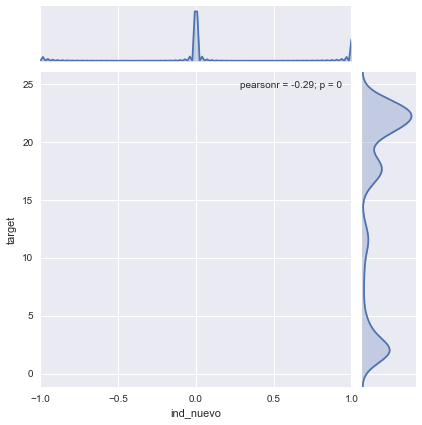

col :  antiguedad


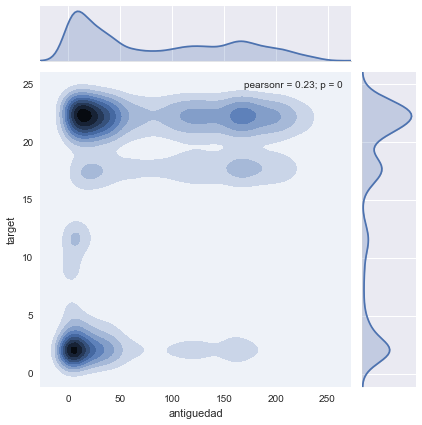

col :  indrel


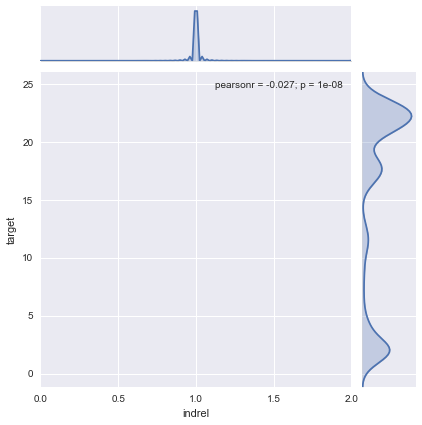

col :  ult_fec_cli_1t


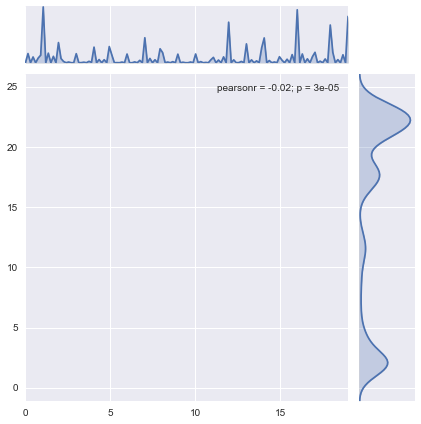

col :  indrel_1mes


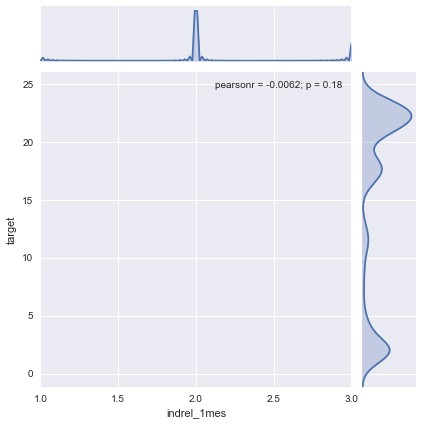

col :  tiprel_1mes


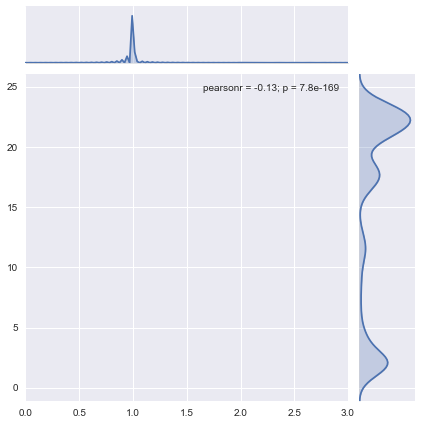

col :  indresi


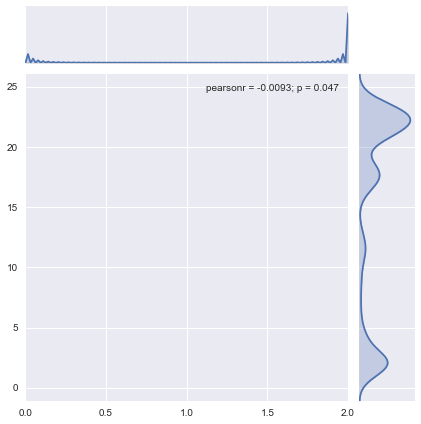

col :  indext


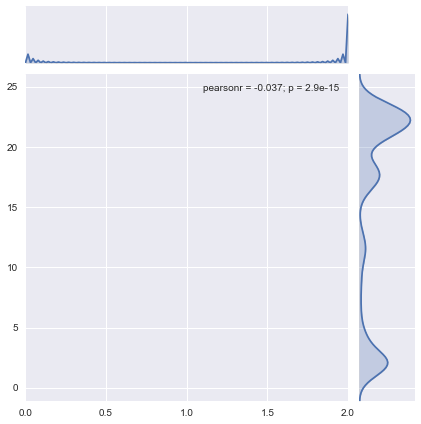

col :  conyuemp


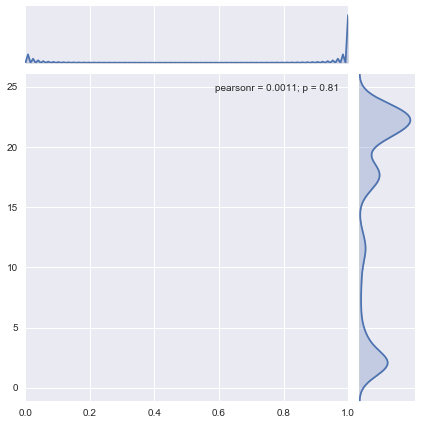

col :  canal_entrada


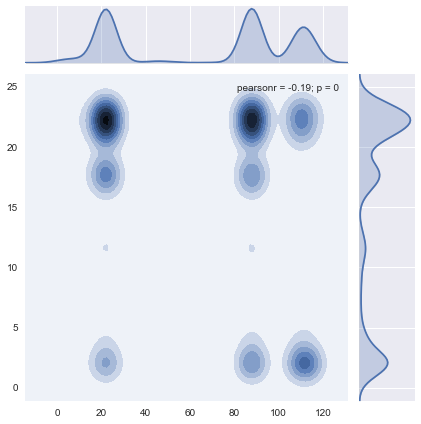

col :  indfall


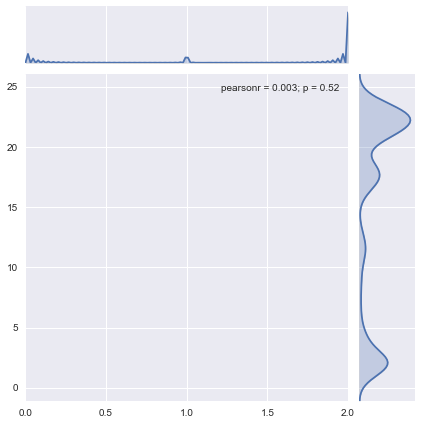

col :  cod_prov


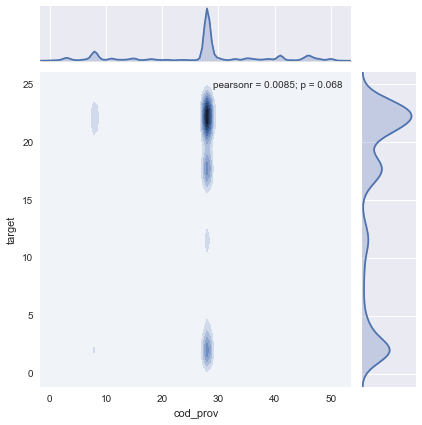

col :  nomprov


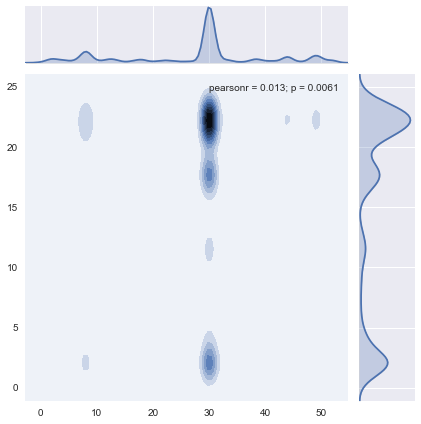

col :  ind_actividad_cliente


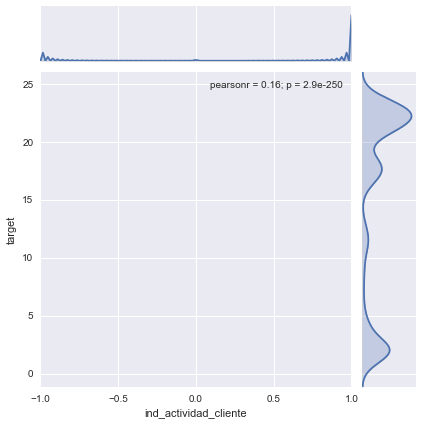

col :  renta


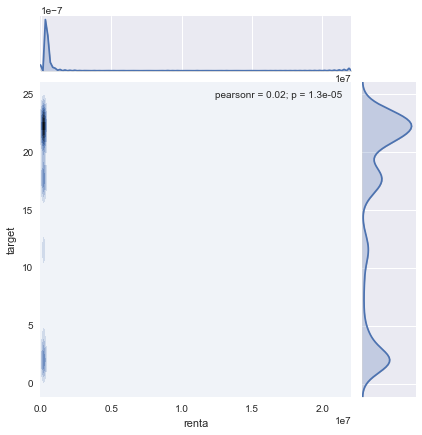

col :  segmento


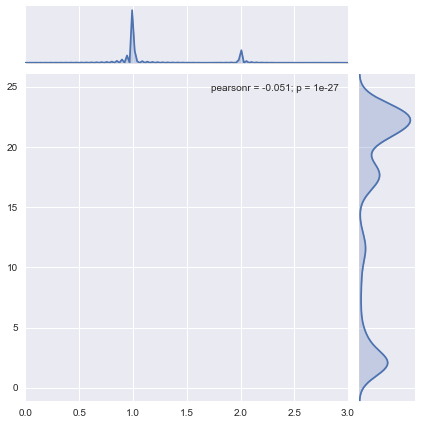

Wall time: 22min


In [75]:
%%time
lb = LabelEncoder()
skip_cols = ['fecha_dato','ncodpers','target']
# histogram of features
for col in trn.columns:
    if col in skip_cols:
        continue
    print('='*50)
    print('col : ', col)

    # check category or number
    if col in category_cols:
        x = lb.fit_transform(trn[col])
        sns.jointplot(x,np.asarray(trn['target'])*1.0, kind="kde")
    else:
        x = trn[col]
        sns.jointplot(x,trn['target'], kind="kde")
    plt.show()
